# Analyse

Nous allons maintenant créer des clusters parmis les pays. 

Nous procéderons d'abord à une classification hiérarchique, puis nous formerons des clusters à l'aide de la méthode du Kmeans et nous ferons une ACP afin de visualiser les pays sur 2 et 3 dimensions.

In [771]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings

In [772]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [773]:
from factor_analyzer import calculate_kmo
from factor_analyzer import calculate_bartlett_sphericity

In [774]:
import plotly.express as px

In [775]:
folder = 'D:/Data_Analyst_Projet/Projet 9/Donnees/fichier analyse/'

In [776]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_row', 150)
sns.set()

## Import fichiers

In [777]:
df_knn = pd.read_csv(folder+'pays_knn.csv')
df_knn.head()

pays  exportation_volaille  importation_volaille  production  \
0  Afrique du Sud                 63.00            514,000.00    1,667.00   
1         Albanie                  0.00             38,000.00       13.00   
2         Algérie                  0.00              2,000.00      275.00   
3       Allemagne                646.00            842,000.00    1,514.00   
4          Angola                  0.00            277,000.00       42.00   

   volaille_consommée  taux_dependance  taux_autosuffisance  \
0        2,035,000.00             0.24                 0.79   
1           47,000.00             0.81                 0.28   
2          264,000.00             0.01                 0.99   
3        1,609,000.00             0.48                 0.87   
4          315,000.00             0.87                 0.13   

   proportion_volaille_nourriture  proportion_animaux_nourriture  \
0                            0.06                           0.12   
1                            0.01                           0.05   
2                            0.01                           0.03   
3                            0.02                           0.10   
4                            0.02                           0.07   

     population  accroissement_population_moyen_par_annee  \
0 57,009,756.00                                674,990.00   
1  2,884,169.00                                -12,973.84   
2 41,389,189.00                                588,745.95   
3 82,658,409.00                                 90,712.42   
4 29,816,766.00                                758,648.11   

   taux_accroissement_population_moyen  lpi                  pib  \
0                                 0.01 3.57   381,448,814,653.46   
1                                -0.00 2.56    13,019,689,336.69   
2                                 0.01 2.52   170,097,014,589.13   
3                                 0.00 4.13 3,690,849,152,517.65   
4                                 0.03 2.24    68,972,769,395.63   

   taux_droit_douane  quantite_conteneurs_par_annee  cout_production_volaille  \
0               4.44                   4,563,618.00                  2,016.60   
1               1.43                     118,270.00                  2,072.14   
2               9.28                   1,725,238.00                  2,180.70   
3               1.81                  15,169,595.00                  1,459.50   
4               8.52                     570,200.00                  2,176.24   

   taux_population_urbaine  stabilite_politique  pib_par_habitant  
0                     0.66                -0.28          6,690.94  
1                     0.60                 0.38          4,514.19  
2                     0.72                -0.92          4,109.70  
3                     0.77                 0.59         44,651.83  
4                     0.65                -0.33          2,313.22

In [778]:
df_sans_knn = pd.read_csv(folder+'pays.csv')
df_sans_knn.head()

pays  exportation_volaille  importation_volaille  production  \
0  Afrique du Sud                 63.00            514,000.00    1,667.00   
1         Albanie                  0.00             38,000.00       13.00   
2         Algérie                  0.00              2,000.00      275.00   
3       Allemagne                646.00            842,000.00    1,514.00   
4          Angola                  0.00            277,000.00       42.00   

   volaille_consommée  taux_dependance  taux_autosuffisance  \
0        2,035,000.00             0.24                 0.79   
1           47,000.00             0.81                 0.28   
2          264,000.00             0.01                 0.99   
3        1,609,000.00             0.48                 0.87   
4          315,000.00             0.87                 0.13   

   proportion_volaille_nourriture  proportion_animaux_nourriture  \
0                            0.06                           0.12   
1                            0.01                           0.05   
2                            0.01                           0.03   
3                            0.02                           0.10   
4                            0.02                           0.07   

     population  accroissement_population_moyen_par_annee  \
0 57,009,756.00                                674,990.00   
1  2,884,169.00                                -12,973.84   
2 41,389,189.00                                588,745.95   
3 82,658,409.00                                 90,712.42   
4 29,816,766.00                                758,648.11   

   taux_accroissement_population_moyen  lpi                  pib  \
0                                 0.01 3.57   381,448,814,653.46   
1                                -0.00 2.56    13,019,689,336.69   
2                                 0.01 2.52   170,097,014,589.13   
3                                 0.00 4.13 3,690,849,152,517.65   
4                                 0.03 2.24    68,972,769,395.63   

   taux_droit_douane  taux_population_urbaine  stabilite_politique  \
0               4.44                     0.66                -0.28   
1               1.43                     0.60                 0.38   
2               9.28                     0.72                -0.92   
3               1.81                     0.77                 0.59   
4               8.52                     0.65                -0.33   

   pib_par_habitant  
0          6,690.94  
1          4,514.19  
2          4,109.70  
3         44,651.83  
4          2,313.22

In [779]:
# pour cette itération df = df_knn
df = df_knn

In [780]:
# on enlève les outliers
outliers = df[df['pays'].isin(['Chine, continentale', 'Brésil', 'Inde', "États-Unis d'Amérique"])]
df = df.drop(outliers.index).reset_index(drop=True)

In [781]:
# on garde uniquement les données numériques pour l'analyse 
X = df.drop(columns='pays')

In [782]:
# pays dans une variable array
pays = df['pays'].values

In [783]:
# indicateur dans une variable array
variables = X.columns.values

In [784]:
X.shape[0]

128

# 1ère Itération

## Classification hiérarchique

Les différences entre les individus peut se calculer avec la distance euclidienne :
la racine de la somme des différences au carré.

Lors d'une classification hiérarchique, au départ il y a autant de clusters que d'individus.

Ensuite, on regroupe 2 à 2 les individus qui ont la plus petite distance euclidienne, jusqu'à qu'il y est un seul cluster.

In [785]:
# On centre et on réduit l'échantillon pour s'assurer que chaque variable aura la même incidence sur la classification
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

La méthode de classification hiérarchique s'effectue avec peu de données (50 ou moins).

Nous allons donc prendre un échantillon aléatoire et effectuer le mélange plusieurs fois.

In [786]:
# df standardisé
df_X_scaled = pd.DataFrame(X_scaled, columns=variables, index=pays)
df_X_scaled.head()

exportation_volaille  importation_volaille  production  \
Afrique du Sud                 -0.05                  1.97        1.54   
Albanie                        -0.36                 -0.34       -0.61   
Algérie                        -0.36                 -0.52       -0.27   
Allemagne                       2.83                  3.57        1.34   
Angola                         -0.36                  0.82       -0.57   

                volaille_consommée  taux_dependance  taux_autosuffisance  \
Afrique du Sud                2.08            -0.37                -0.08   
Albanie                      -0.56             0.78                -1.10   
Algérie                      -0.27            -0.84                 0.33   
Allemagne                     1.51             0.12                 0.08   
Angola                       -0.21             0.90                -1.39   

                proportion_volaille_nourriture  proportion_animaux_nourriture  \
Afrique du Sud                            1.42                           0.51   
Albanie                                  -0.84                          -1.18   
Algérie                                  -1.06                          -1.54   
Allemagne                                -0.50                           0.09   
Angola                                   -0.60                          -0.66   

                population  accroissement_population_moyen_par_annee  \
Afrique du Sud        0.74                                      0.66   
Albanie              -0.55                                     -0.50   
Algérie               0.37                                      0.52   
Allemagne             1.35                                     -0.32   
Angola                0.09                                      0.80   

                taux_accroissement_population_moyen   lpi   pib  \
Afrique du Sud                                 0.23  1.15  0.08   
Albanie                                       -1.52 -0.80 -0.45   
Algérie                                        0.48 -0.87 -0.23   
Allemagne                                     -0.92  2.23  4.83   
Angola                                         1.69 -1.41 -0.37   

                taux_droit_douane  quantite_conteneurs_par_annee  \
Afrique du Sud              -0.16                           0.25   
Albanie                     -0.89                          -0.60   
Algérie                      1.02                          -0.29   
Allemagne                   -0.79                           2.28   
Angola                       0.83                          -0.51   

                cout_production_volaille  taux_population_urbaine  \
Afrique du Sud                     -0.27                     0.12   
Albanie                            -0.18                    -0.13   
Algérie                            -0.00                     0.43   
Allemagne                          -1.20                     0.66   
Angola                             -0.01                     0.08   

                stabilite_politique  pib_par_habitant  
Afrique du Sud                -0.32             -0.49  
Albanie                        0.42             -0.60  
Algérie                       -1.04             -0.62  
Allemagne                      0.65              1.35  
Angola                        -0.38             -0.71

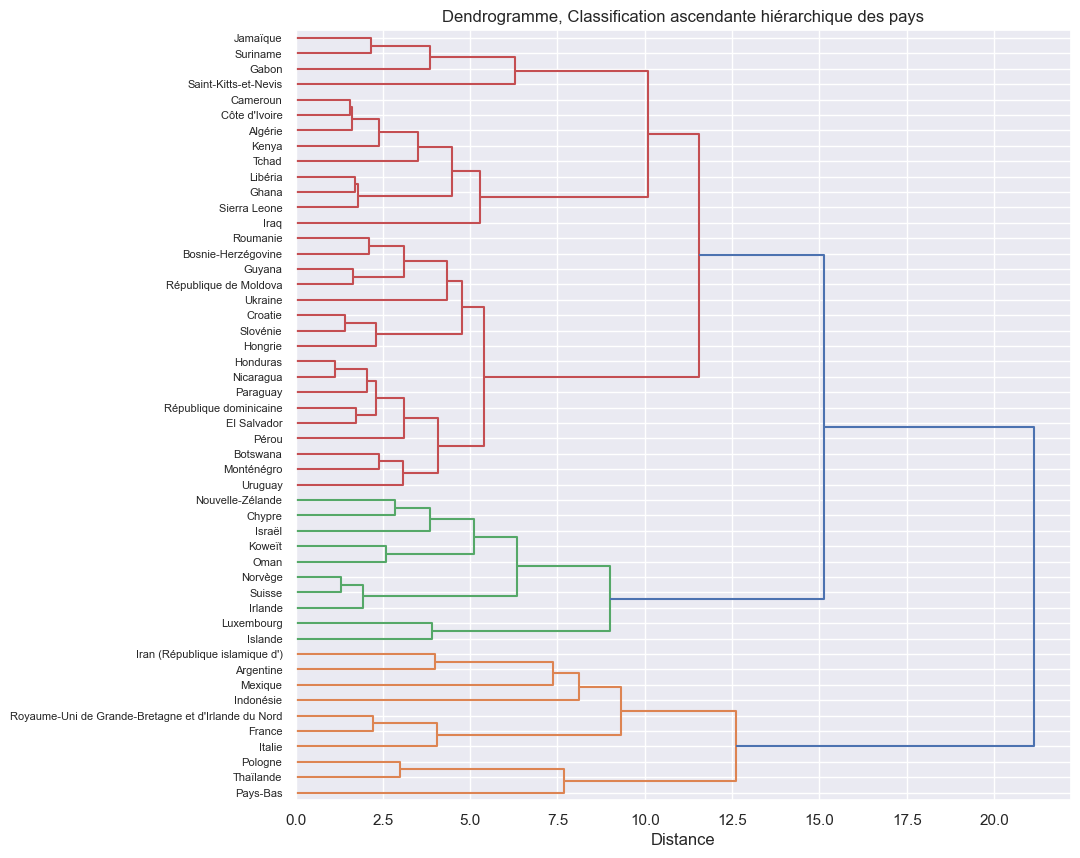

In [787]:
# faire random sample echantillon de 30 pays
# faire plusieurs itération pour valider les clusters
echantillon = df_X_scaled.sample(50)


# mesure les liens entre les clusters avec la méthode de ward
# chaque fois que 2 clusters sont regroupés, cherche à minimiser l'inertie intraclasse

Z = linkage(echantillon, 'ward')


# création du dendogramme
plt.figure(figsize=(10,10))
dendrogram(Z, p=echantillon.shape[0], truncate_mode='lastp', distance_sort='ascending',
           orientation='right', labels=echantillon.index)
plt.title("Dendrogramme, Classification ascendante hiérarchique des pays")
plt.xlabel('Distance')
plt.show();

In [788]:
Z

array([[23.        , 47.        ,  1.13931795,  2.        ],
       [29.        , 37.        ,  1.31319607,  2.        ],
       [31.        , 34.        ,  1.41190105,  2.        ],
       [35.        , 42.        ,  1.56829604,  2.        ],
       [41.        , 53.        ,  1.61001664,  3.        ],
       [ 7.        , 17.        ,  1.63918568,  2.        ],
       [ 1.        , 30.        ,  1.7080518 ,  2.        ],
       [20.        , 38.        ,  1.74170961,  2.        ],
       [14.        , 56.        ,  1.79871942,  3.        ],
       [36.        , 51.        ,  1.9447024 ,  3.        ],
       [21.        , 50.        ,  2.03351876,  3.        ],
       [15.        , 16.        ,  2.11578512,  2.        ],
       [43.        , 44.        ,  2.15555558,  2.        ],
       [ 8.        , 10.        ,  2.20343942,  2.        ],
       [57.        , 60.        ,  2.29757078,  5.        ],
       [19.        , 52.        ,  2.30000272,  3.        ],
       [40.        , 54.

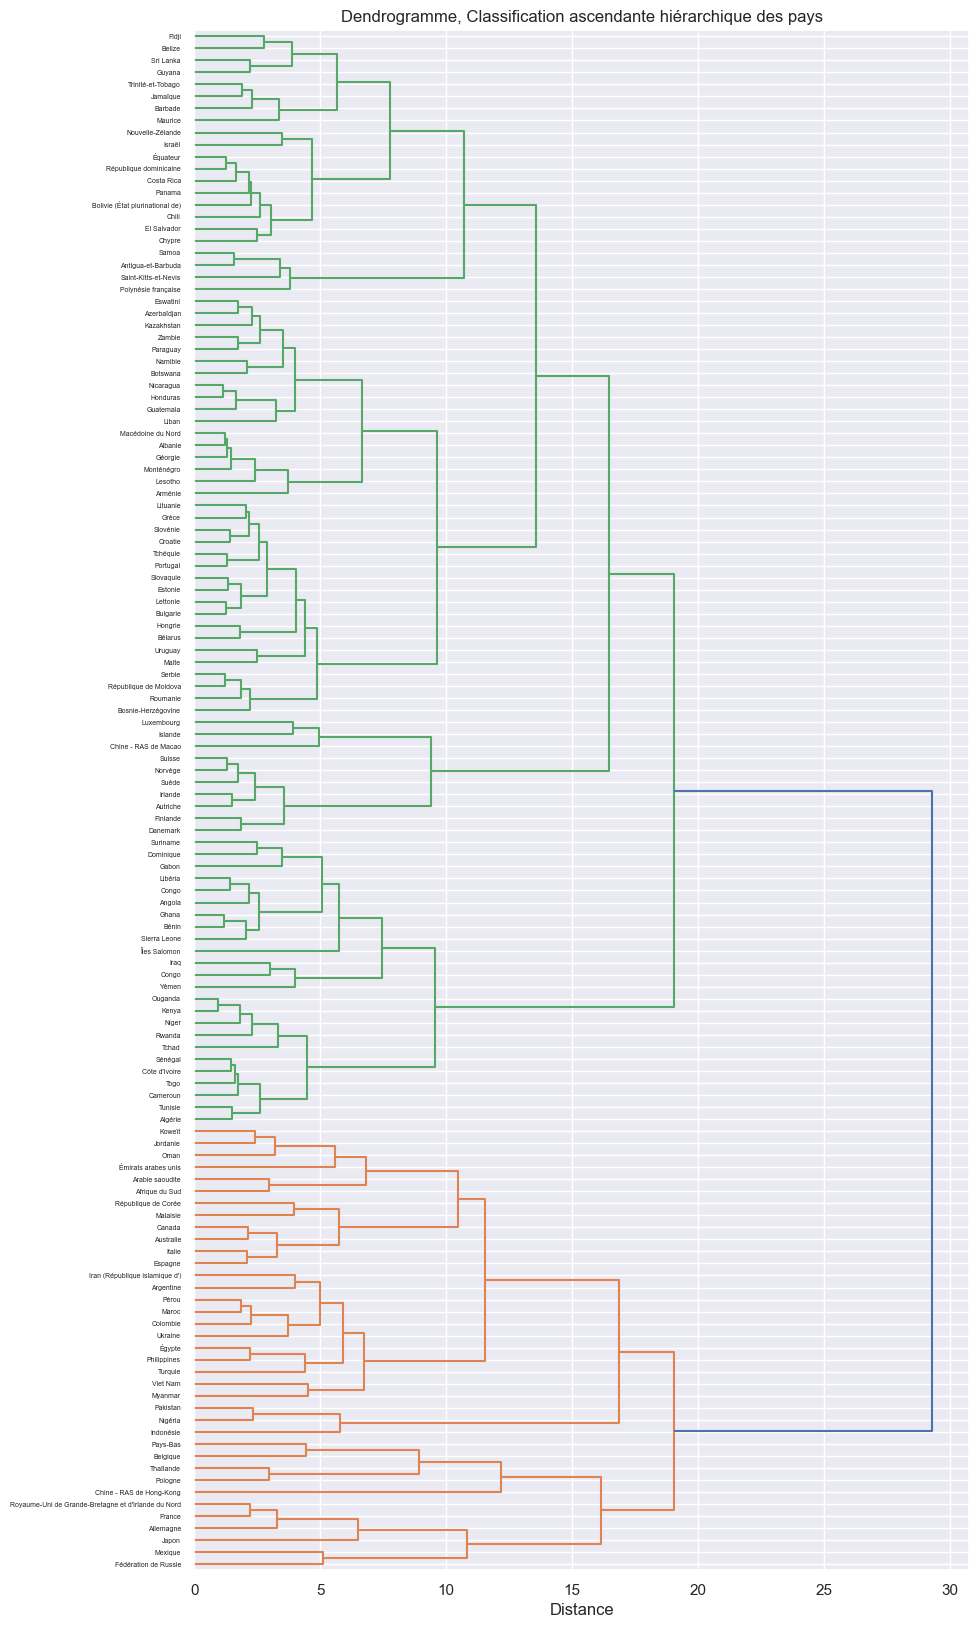

In [789]:
# Dendogramme global

Z = linkage(X_scaled, 'ward')


# création du dendogramme
plt.figure(figsize=(10,20))
dendrogram(Z, p=X_scaled.shape[0], truncate_mode='lastp', distance_sort='ascending',
           orientation='right', labels=pays)
plt.title("Dendrogramme, Classification ascendante hiérarchique des pays")
plt.xlabel('Distance')
plt.show();

In [790]:
Z

array([[ 62.        ,  85.        ,   0.93962588,   2.        ],
       [ 49.        ,  79.        ,   1.13931795,   2.        ],
       [ 20.        ,  44.        ,   1.19819907,   2.        ],
       [ 99.        , 103.        ,   1.23241663,   2.        ],
       [  1.        ,  70.        ,   1.24057073,   2.        ],
       [100.        , 126.        ,   1.26709057,   2.        ],
       [ 18.        ,  65.        ,   1.27644838,   2.        ],
       [ 93.        , 113.        ,   1.28540472,   2.        ],
       [ 48.        , 132.        ,   1.30464599,   3.        ],
       [ 82.        , 108.        ,   1.31319607,   2.        ],
       [ 37.        , 105.        ,   1.32498623,   2.        ],
       [ 28.        ,  67.        ,   1.41124781,   2.        ],
       [ 31.        , 106.        ,   1.41190105,   2.        ],
       [ 76.        , 136.        ,   1.46148356,   4.        ],
       [ 32.        , 111.        ,   1.47212621,   2.        ],
       [  2.        , 117

In [791]:
# création de la classification
cah = AgglomerativeClustering(n_clusters=4, linkage='ward')

cah = cah.fit(X_scaled)

In [792]:
colonne = ['taux_dependance', 'lpi', 'pib_par_habitant', 'population', 'stabilite_politique', 'clusters_cah']

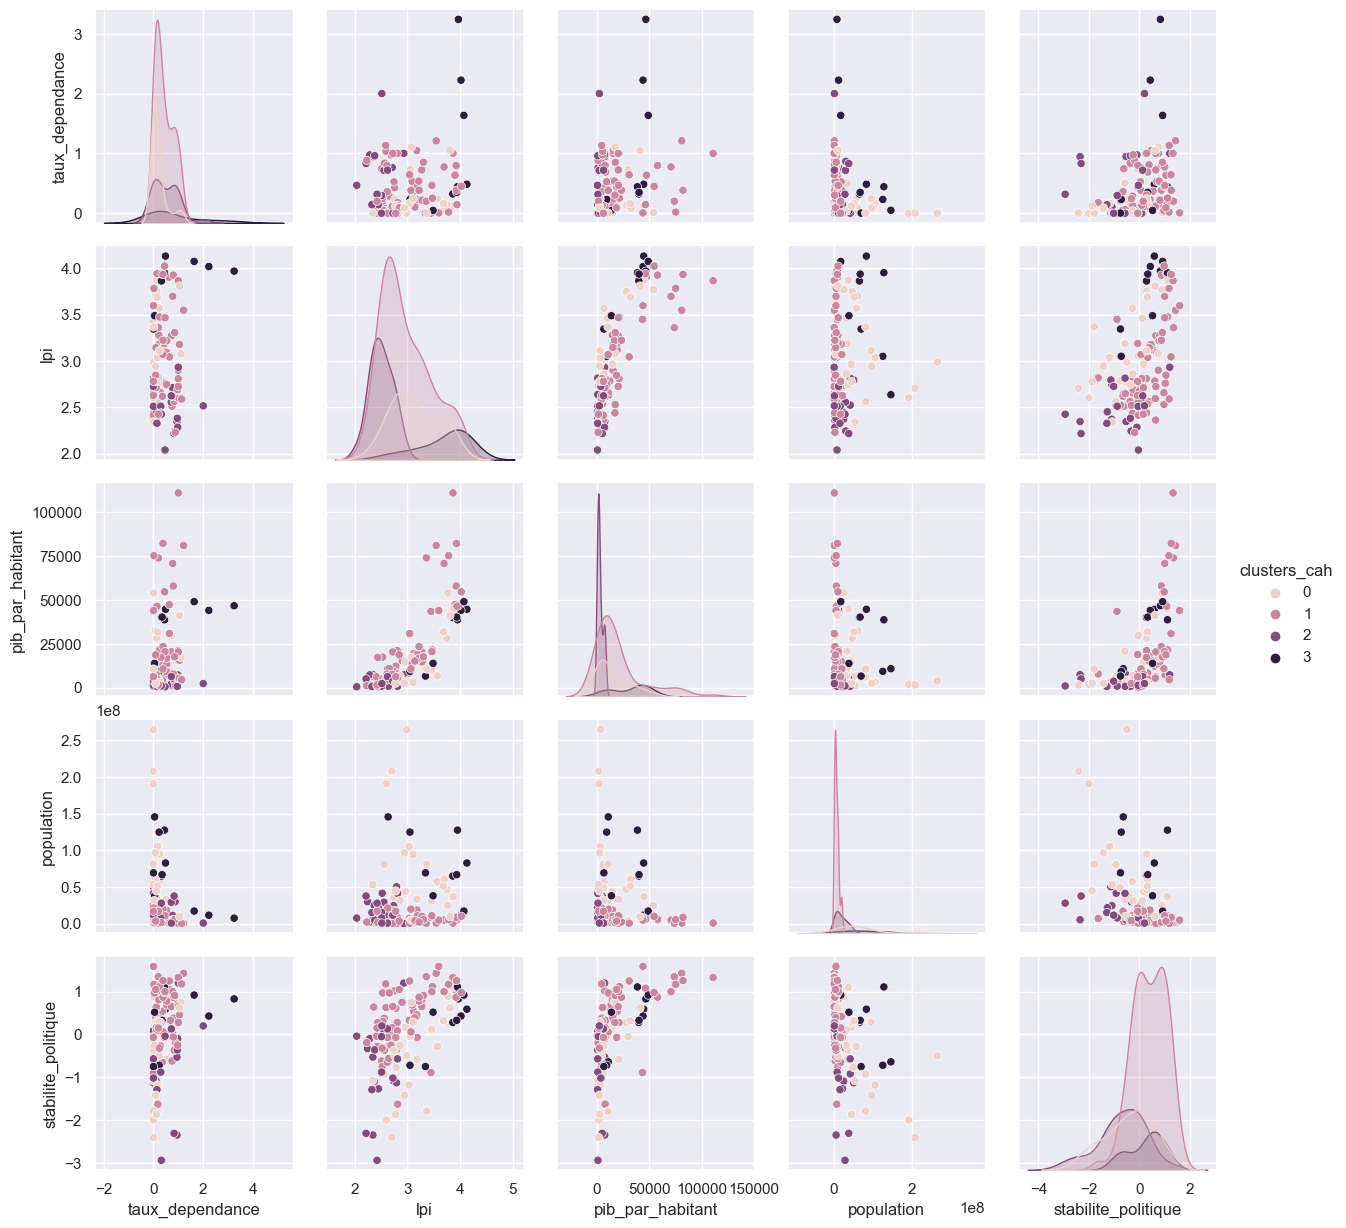

In [793]:
# création des clusters
clusters_cah = cah.labels_

df['clusters_cah'] = clusters_cah
sns.pairplot(df[colonne], hue='clusters_cah')
plt.show()

La classification hiérarchique fait ressortir 3 à 4 clusters. On divisera l'échantillon en 4 clusters pour cette itération.

## Kmeans

#### Méthode du coude avec standardisation

Text(0.5, 0, 'Nombre de clusters')

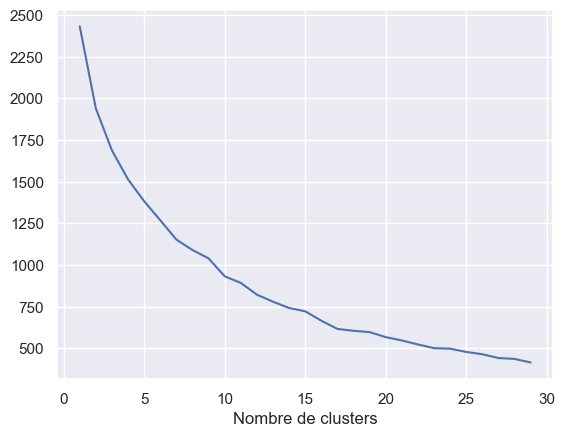

In [794]:
# méthode du coude pour déterminer le nombre de clusters le plus pertinents
warnings.simplefilter('ignore')

liste_clusters = []

for n in range(1,30):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X_scaled)
    liste_clusters.append(kmeans.inertia_)

plt.plot(range(1,30), liste_clusters)
plt.xlabel('Nombre de clusters')

Avec standardisation pas de coude visible.

#### Méthode du coude sans standardisation

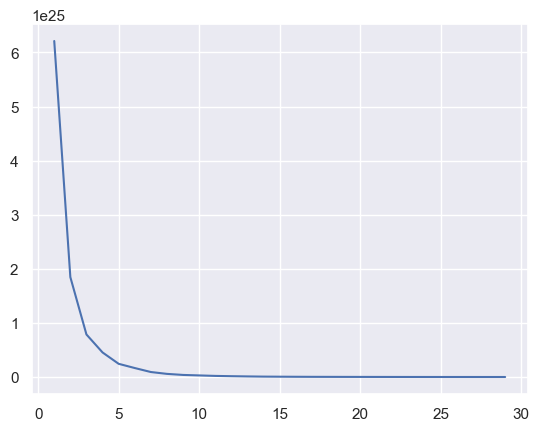

In [795]:
# méthode du coude pour déterminer le nombre de clusters le plus pertinents
warnings.simplefilter('ignore')

liste_clusters = []

for n in range(1,30):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    liste_clusters.append(kmeans.inertia_)

plt.plot(range(1,30), liste_clusters)

Sans standardisation, on peut voir un coude pour 2, 3, 4 et 5 clusters.

Pour la première itération on prendra 4 clusters.

In [796]:
# création de l'estimateur

kmeans = KMeans(n_clusters=4)

kmeans = kmeans.fit(X_scaled)

In [797]:
# coordonnées des centroides

centroides = kmeans.cluster_centers_

In [798]:
# clusters de l'echantillon

clusters_kmeans = kmeans.labels_
df['clusters_kmeans']=clusters_kmeans

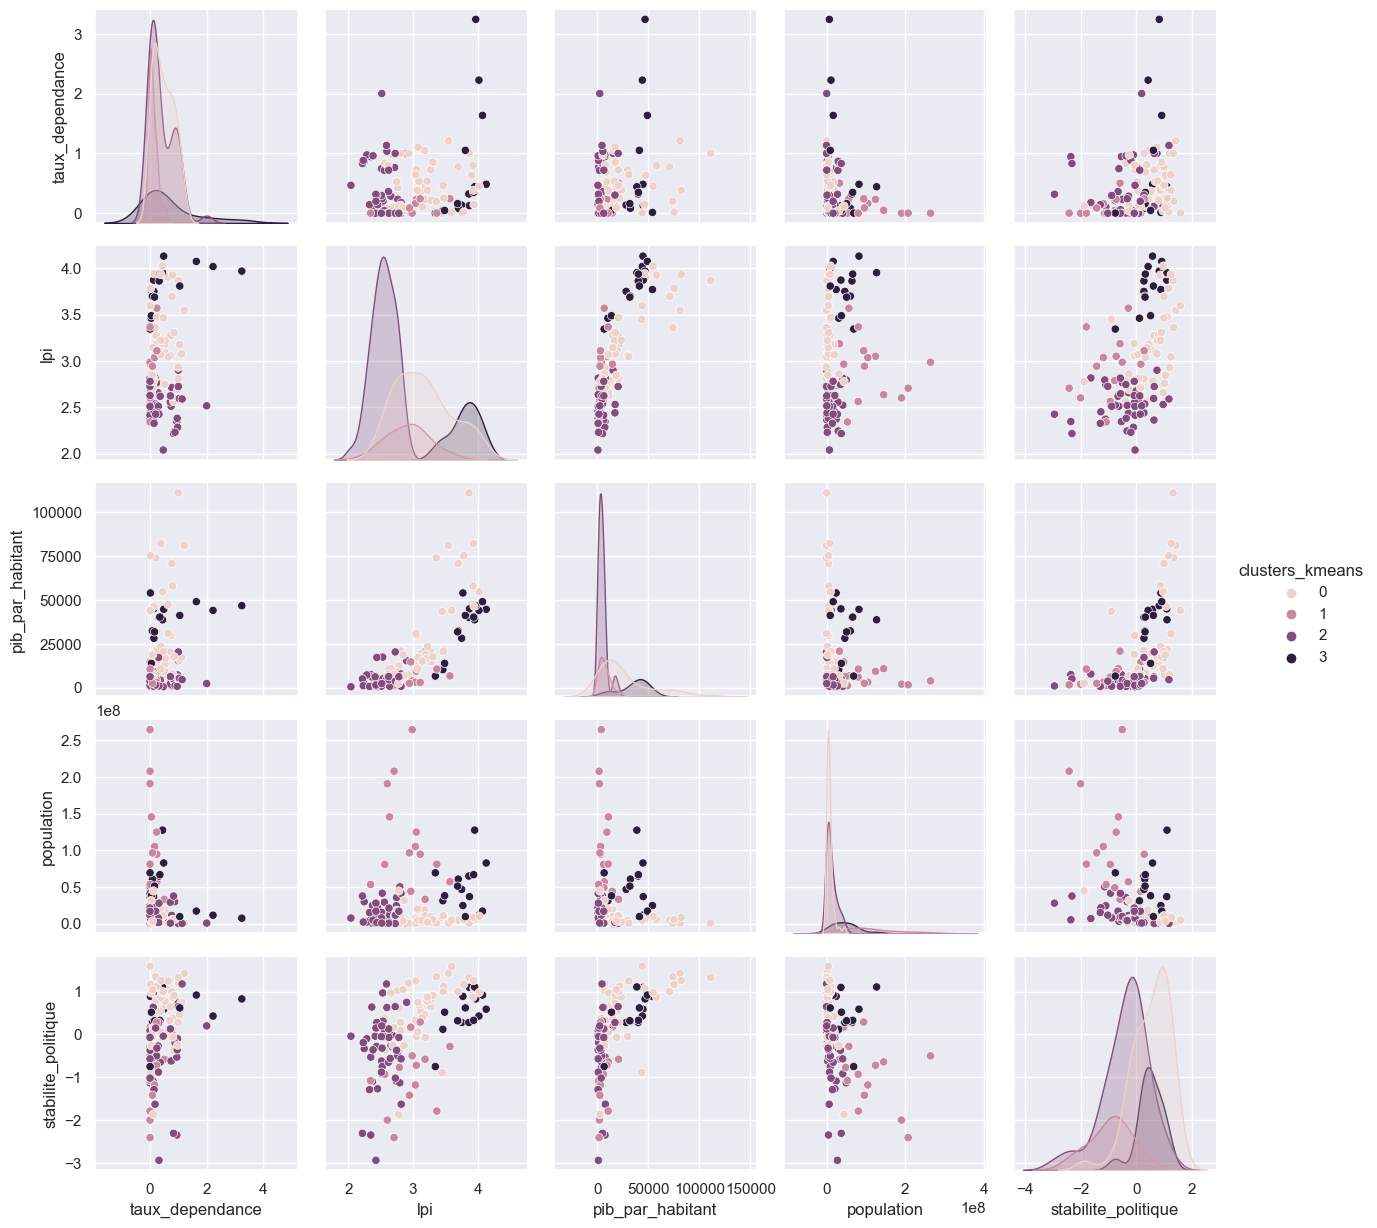

In [799]:
# visualisation des clusters pour quelques variables

colonne = ['taux_dependance', 'lpi', 'pib_par_habitant', 'population', 'stabilite_politique', 'clusters_kmeans']
sns.pairplot(df[colonne], hue='clusters_kmeans')
plt.show()

## PCA, Analyse en composantes principales

### Evaluation de la qualité de la PCA

On va mesurer l'utilité et la qualité de l'analyse en composantes principales grâce au KMO.

Le KMO indique si les variables sont assez corrélées pour faire une ACP. Un score élevé (proche de 1) indique qu'une analyse factorielle peut être utile.

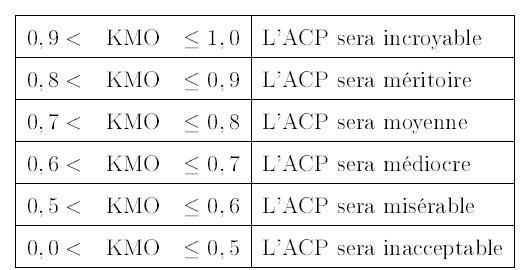

In [800]:
X

exportation_volaille  importation_volaille  production  \
0                   63.00            514,000.00    1,667.00   
1                    0.00             38,000.00       13.00   
2                    0.00              2,000.00      275.00   
3                  646.00            842,000.00    1,514.00   
4                    0.00            277,000.00       42.00   
5                    0.00              7,000.00        0.00   
6                   10.00            722,000.00      616.00   
7                  207.00              8,000.00    2,161.00   
8                    0.00             35,000.00       11.00   
9                   42.00             16,000.00    1,269.00   
10                  78.00            110,000.00      148.00   
11                   0.00             27,000.00      104.00   
12                   0.00              2,000.00       15.00   
13                 656.00            338,000.00      463.00   
14                   0.00                  0.00       20.00   
15                   1.00              1,000.00      533.00   
16                   8.00             10,000.00       61.00   
17                   0.00              3,000.00        5.00   
18                  45.00            108,000.00      107.00   
19                 152.00             21,000.00      463.00   
20                   0.00            123,000.00       18.00   
21                   0.00                  0.00       81.00   
22                 163.00            182,000.00    1,417.00   
23                 115.00            155,000.00      712.00   
24                 663.00            907,000.00       24.00   
25                   0.00             23,000.00        3.00   
26                   1.00             14,000.00       25.00   
27                   2.00             78,000.00    1,564.00   
28                   0.00            104,000.00        7.00   
29                   0.00            104,000.00        7.00   
30                   3.00             17,000.00      133.00   
31                  17.00             24,000.00       61.00   
32                   0.00              7,000.00       58.00   
33                 139.00            133,000.00      173.00   
34                   0.00              4,000.00        0.00   
35                   2.00             16,000.00      136.00   
36                 212.00            205,000.00    1,515.00   
37                  11.00             21,000.00       20.00   
38                   0.00              2,000.00        6.00   
39                   0.00              3,000.00       23.00   
40                  12.00             16,000.00      129.00   
41                 501.00            506,000.00    1,750.00   
42                 115.00            226,000.00    4,444.00   
43                   0.00             76,000.00        4.00   
44                   0.00            151,000.00       60.00   
45                  29.00             79,000.00      246.00   
46                   7.00            129,000.00      235.00   
47                   0.00                  0.00       31.00   
48                   5.00             51,000.00       22.00   
49                   1.00             12,000.00      193.00   
50                 210.00             58,000.00      493.00   
51                   0.00              1,000.00    2,301.00   
52                  45.00              6,000.00    2,174.00   
53                   0.00            470,000.00       96.00   
54                  93.00             99,000.00      110.00   
55                   0.00              2,000.00       10.00   
56                   3.00                  0.00      629.00   
57                 183.00             97,000.00    1,315.00   
58                   1.00             31,000.00      128.00   
59                  10.00          1,069,000.00    2,215.00   
60                  10.00             64,000.00      210.00   
61                   6.00            174,000.00      171.00   
62                   0.00           

In [801]:
calculate_kmo(X)

(array([0.51786374, 0.54327233, 0.58965198, 0.58129299, 0.48146479,
        0.61219152, 0.49755409, 0.62265172, 0.63374981, 0.52065592,
        0.56115656, 0.77370253, 0.66351693, 0.7378907 , 0.78620563,
        0.6458863 , 0.81462797, 0.88315522, 0.62940366]),
 0.6339454032726262)

Dans cette situation, la PCA est indiquée "misérable". 

On va améliorer le KMO en enlevant des variables.

#### Test de sphéricité de Bartlett
Teste l'hypothèse selon laquelle votre matrice de corrélation est une matrice d'identité, ce qui indiquerait que les variables ne sont pas liées et donc ne conviennent pas pour la détection de structure. Des valeurs faibles (inférieures à 0,05) du niveau de signification indiquent qu'une analyse factorielle peut être utile avec vos données.

In [802]:
from factor_analyzer import calculate_bartlett_sphericity

In [803]:
calculate_bartlett_sphericity(X)

(2078.1377793679762, 0.0)

La p-value est inférieur à 0.05, les test est significatif, l'analyse factorielle peut être utile aux données.

### Tentative d'amélioration de la PCA

Plusieurs possibilités pour améliorer la PCA :
- Analyser le KMO par variable et rejeter les variables qui ont un KMO faible (inférieur ou égale à 0.5)
- Analyser les 'communalities' de chaque variables et enlever les variables qui ont une communalitie faible (inférieur ou égale à 0.3)
- Enlever les variables les moins corrélées avec les autres variables 
- Normaliser

Pour rappel, les communalities sont les pourcentage de variation expliquée par chaque facteur, on va enlever les variables qui expliquent le moins de variation.

Les propositions pour améliorer le KMO global proviennent de 2 sources :
- https://spss.espaceweb.usherbrooke.ca/procedure-spss-5/
- Le livre Consis_Statistique consultable ci-dessous à partir de la page 651 chapitre sur l'ACP.

In [639]:
from IPython.display import IFrame
IFrame("Consis_Statistique.pdf", width=600, height=300)

#### KMO par variables

In [804]:
kmo_variable = pd.DataFrame(data=calculate_kmo(X)[0], index=X.columns.values, columns=['KMO'])
kmo_variable.sort_values('KMO', ascending = False)

KMO
stabilite_politique                      0.88
taux_population_urbaine                  0.81
quantite_conteneurs_par_annee            0.79
lpi                                      0.77
taux_droit_douane                        0.74
pib                                      0.66
cout_production_volaille                 0.65
population                               0.63
pib_par_habitant                         0.63
proportion_animaux_nourriture            0.62
taux_autosuffisance                      0.61
production                               0.59
volaille_consommée                       0.58
taux_accroissement_population_moyen      0.56
importation_volaille                     0.54
accroissement_population_moyen_par_annee 0.52
exportation_volaille                     0.52
proportion_volaille_nourriture           0.50
taux_dependance                          0.48

On pourra par exemple conserver les variables dont le KMO est supérieur ou égale à 0,5.

##### On enlève les variables qui ont un KMO faible

In [812]:
# test kmo > 0.5
# on garde les variables dont le kmo est > 0.5
kmo_col = kmo_variable[kmo_variable['KMO'] > 0.55].index.values
kmo_col

array(['production', 'volaille_consommée', 'taux_autosuffisance',
       'proportion_animaux_nourriture', 'population',
       'taux_accroissement_population_moyen', 'lpi', 'pib',
       'taux_droit_douane', 'quantite_conteneurs_par_annee',
       'cout_production_volaille', 'taux_population_urbaine',
       'stabilite_politique', 'pib_par_habitant'], dtype=object)

In [813]:
# variables enlevées par la condition ci-dessus
kmo_variable[~(kmo_variable['KMO'] > 0.55)].index.values

array(['exportation_volaille', 'importation_volaille', 'taux_dependance',
       'proportion_volaille_nourriture',
       'accroissement_population_moyen_par_annee'], dtype=object)

In [814]:
calculate_kmo(X[kmo_col])

(array([0.67984718, 0.6750595 , 0.50596123, 0.62310976, 0.8815285 ,
        0.59867211, 0.74151447, 0.83941071, 0.80690288, 0.69322004,
        0.62288737, 0.83292812, 0.81486965, 0.63357546]),
 0.7181206516108423)

Le KMO est de 0.71, ce qui est 'moyen' mais acceptable, on va voir si on peut encore l'améliorer.
D'autres sources affirment qu'un KMO est acceptable à partir de 0,6.

In [644]:
X[kmo_col].shape

(128, 14)

##### Calcul des communalities

In [815]:
from factor_analyzer import FactorAnalyzer

In [816]:
fa = FactorAnalyzer(rotation=None, n_factors=3)

fa.fit(X)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [817]:
df_communalities = pd.DataFrame(fa.get_communalities(), index=X.columns, columns=['communalities'])
df_communalities

communalities
exportation_volaille                               0.35
importation_volaille                               0.51
production                                         0.77
volaille_consommée                                 0.79
taux_dependance                                    0.24
taux_autosuffisance                                0.50
proportion_volaille_nourriture                     0.39
proportion_animaux_nourriture                      0.64
population                                         0.83
accroissement_population_moyen_par_annee           0.49
taux_accroissement_population_moyen                0.25
lpi                                                0.80
pib                                                0.63
taux_droit_douane                                  0.43
quantite_conteneurs_par_annee                      0.53
cout_production_volaille                           0.18
taux_population_urbaine                            0.40
stabilite_politique                                0.59
pib_par_habitant                                   0.53

In [827]:
# on garde les variables dont les communalities sont supérieurs à 0,3
variables_communalities = df_communalities[df_communalities['communalities']>0.4].index.values
variables_communalities

array(['importation_volaille', 'production', 'volaille_consommée',
       'taux_autosuffisance', 'proportion_animaux_nourriture',
       'population', 'accroissement_population_moyen_par_annee', 'lpi',
       'pib', 'taux_droit_douane', 'quantite_conteneurs_par_annee',
       'taux_population_urbaine', 'stabilite_politique',
       'pib_par_habitant'], dtype=object)

In [826]:
df_communalities[~(df_communalities['communalities']>0.4)].index.values

array(['exportation_volaille', 'taux_dependance',
       'proportion_volaille_nourriture',
       'taux_accroissement_population_moyen', 'cout_production_volaille'],
      dtype=object)

In [828]:
calculate_kmo(X[variables_communalities])

(array([0.67399576, 0.62856018, 0.66187206, 0.46517813, 0.64899527,
        0.64394504, 0.50272032, 0.7195621 , 0.74185594, 0.7552361 ,
        0.79505974, 0.85376758, 0.82019646, 0.68747007]),
 0.6852392232676975)

In [652]:
df_communalities.shape

(16, 1)

##### On enlève les variables qui sont corrélées à aucune autre variable

<AxesSubplot:>

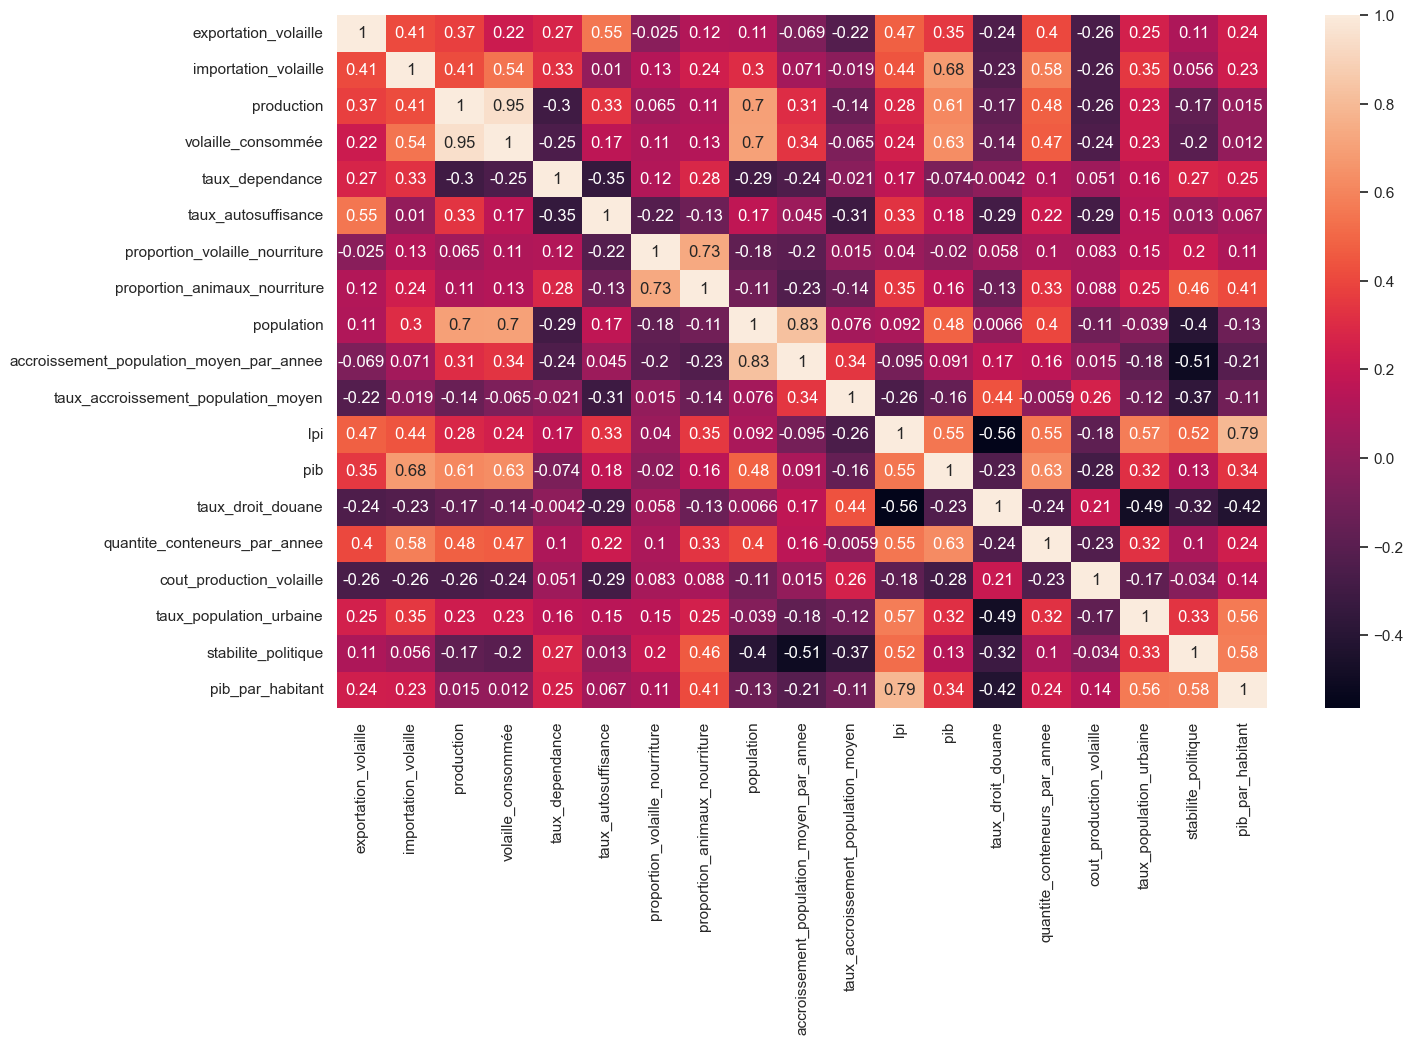

In [653]:
plt.figure(figsize=(15,9))
sns.heatmap(X.corr(), annot=True)

In [829]:
cor = X.corr()

In [846]:
# j'identifie les variables qui sont peu corrélées avec les autres
cor_count = (cor[(cor > 0.5)|(cor < -0.5)].count())
cor_count

exportation_volaille                        2
importation_volaille                        4
production                                  4
volaille_consommée                          5
taux_dependance                             1
taux_autosuffisance                         2
proportion_volaille_nourriture              2
proportion_animaux_nourriture               2
population                                  4
accroissement_population_moyen_par_annee    3
taux_accroissement_population_moyen         1
lpi                                         7
pib                                         6
taux_droit_douane                           2
quantite_conteneurs_par_annee               4
cout_production_volaille                    1
taux_population_urbaine                     3
stabilite_politique                         4
pib_par_habitant                            4
dtype: int64

In [847]:
cor_count_cond = cor_count > 2
cor_count_cond

exportation_volaille                        False
importation_volaille                         True
production                                   True
volaille_consommée                           True
taux_dependance                             False
taux_autosuffisance                         False
proportion_volaille_nourriture              False
proportion_animaux_nourriture               False
population                                   True
accroissement_population_moyen_par_annee     True
taux_accroissement_population_moyen         False
lpi                                          True
pib                                          True
taux_droit_douane                           False
quantite_conteneurs_par_annee                True
cout_production_volaille                    False
taux_population_urbaine                      True
stabilite_politique                          True
pib_par_habitant                             True
dtype: bool

In [848]:
col_garder = cor[cor_count_cond].index.values
col_garder

array(['importation_volaille', 'production', 'volaille_consommée',
       'population', 'accroissement_population_moyen_par_annee', 'lpi',
       'pib', 'quantite_conteneurs_par_annee', 'taux_population_urbaine',
       'stabilite_politique', 'pib_par_habitant'], dtype=object)

In [849]:
col_enlevées = cor[~cor_count_cond].index.values
col_enlevées

array(['exportation_volaille', 'taux_dependance', 'taux_autosuffisance',
       'proportion_volaille_nourriture', 'proportion_animaux_nourriture',
       'taux_accroissement_population_moyen', 'taux_droit_douane',
       'cout_production_volaille'], dtype=object)

In [850]:
len(col_garder)

11

In [660]:
X[col_garder].corr()

importation_volaille  production  \
importation_volaille                                      1.00        0.41   
production                                                0.41        1.00   
volaille_consommée                                        0.54        0.95   
population                                                0.30        0.70   
accroissement_population_moyen_par_annee                  0.07        0.31   
lpi                                                       0.44        0.28   
pib                                                       0.68        0.61   
quantite_conteneurs_par_annee                             0.58        0.48   
taux_population_urbaine                                   0.35        0.23   
stabilite_politique                                       0.06       -0.17   
pib_par_habitant                                          0.23        0.01   

                                          volaille_consommée  population  \
importation_volaille                                    0.54        0.30   
production                                              0.95        0.70   
volaille_consommée                                      1.00        0.70   
population                                              0.70        1.00   
accroissement_population_moyen_par_annee                0.34        0.83   
lpi                                                     0.24        0.09   
pib                                                     0.63        0.48   
quantite_conteneurs_par_annee                           0.47        0.40   
taux_population_urbaine                                 0.23       -0.04   
stabilite_politique                                    -0.20       -0.40   
pib_par_habitant                                        0.01       -0.13   

                                          accroissement_population_moyen_par_annee  \
importation_volaille                                                          0.07   
production                                                                    0.31   
volaille_consommée                                                            0.34   
population                                                                    0.83   
accroissement_population_moyen_par_annee                                      1.00   
lpi                                                                          -0.10   
pib                                                                           0.09   
quantite_conteneurs_par_annee                                                 0.16   
taux_population_urbaine                                                      -0.18   
stabilite_politique                                                          -0.51   
pib_par_habitant                                                             -0.21   

                                           lpi  pib  \
importation_volaille                      0.44 0.68   
production                                0.28 0.61   
volaille_consommée                        0.24 0.63   
population                                0.09 0.48   
accroissement_population_moyen_par_annee -0.10 0.09   
lpi                                       1.00 0.55   
pib                                       0.55 1.00   
quantite_conteneurs_par_annee             0.55 0.63   
taux_population_urbaine                   0.57 0.32   
stabilite_politique                       0.52 0.13   
pib_par_habitant                          0.79 0.34   

                                          quantite_conteneurs_par_annee  \
importation_volaille                                               0.58   
production                                                         0.48   
volaille_consommée                                                 0.47   
population                                                         0.40   
accroissement_population_moyen_par_annee                           0.16   
lpi                                             

In [851]:
calculate_kmo(X[col_garder])

(array([0.64331565, 0.62626345, 0.6683195 , 0.65563699, 0.50283776,
        0.70207844, 0.77552356, 0.86326187, 0.89897455, 0.84629117,
        0.67765511]),
 0.6934016626510552)

On atteint 0.73 pour le KMO mais 10 variables ont été enlevées.

##### On teste en normalisant

In [662]:
df_X_scaled = pd.DataFrame(X_scaled, columns=variables)
df_X_scaled

exportation_volaille  importation_volaille  production  \
0                   -0.05                  1.97        1.54   
1                   -0.36                 -0.34       -0.61   
2                   -0.36                 -0.52       -0.27   
3                    2.83                  3.57        1.34   
4                   -0.36                  0.82       -0.57   
5                   -0.36                 -0.49       -0.62   
6                   -0.31                  2.99        0.18   
7                    0.66                 -0.49        2.18   
8                   -0.36                 -0.35       -0.61   
9                   -0.15                 -0.45        1.02   
10                   0.02                  0.01       -0.43   
11                  -0.36                 -0.39       -0.49   
12                  -0.36                 -0.52       -0.60   
13                   2.88                  1.12       -0.02   
14                  -0.36                 -0.52       -0.60   
15                  -0.36                 -0.52        0.07   
16                  -0.32                 -0.48       -0.55   
17                  -0.36                 -0.51       -0.62   
18                  -0.14                  0.00       -0.49   
19                   0.39                 -0.42       -0.02   
20                  -0.36                  0.07       -0.60   
21                  -0.36                 -0.52       -0.52   
22                   0.44                  0.36        1.22   
23                   0.21                  0.23        0.30   
24                   2.91                  3.89       -0.59   
25                  -0.36                 -0.41       -0.62   
26                  -0.36                 -0.46       -0.59   
27                  -0.35                 -0.15        1.41   
28                  -0.36                 -0.02       -0.62   
29                  -0.36                 -0.02       -0.62   
30                  -0.35                 -0.44       -0.45   
31                  -0.28                 -0.41       -0.55   
32                  -0.36                 -0.49       -0.55   
33                   0.33                  0.12       -0.40   
34                  -0.36                 -0.51       -0.62   
35                  -0.35                 -0.45       -0.45   
36                   0.69                  0.47        1.34   
37                  -0.31                 -0.42       -0.60   
38                  -0.36                 -0.52       -0.62   
39                  -0.36                 -0.51       -0.59   
40                  -0.30                 -0.45       -0.46   
41                   2.11                  1.94        1.65   
42                   0.21                  0.57        5.15   
43                  -0.36                 -0.16       -0.62   
44                  -0.36                  0.21       -0.55   
45                  -0.22                 -0.14       -0.30   
46                  -0.33                  0.10       -0.32   
47                  -0.36                 -0.52       -0.58   
48                  -0.34                 -0.28       -0.60   
49                  -0.36                 -0.47       -0.37   
50                   0.68                 -0.24        0.02   
51                  -0.36                 -0.52        2.37   
52                  -0.14                 -0.50        2.20   
53                  -0.36                  1.76       -0.50   
54                   0.10                 -0.04       -0.48   
55                  -0.36                 -0.52       -0.61   
56                  -0.35                 -0.52        0.19   
57                   0.54                 -0.05        1.08   
58                  -0.36                 -0.37       -0.46   
59                  -0.31                  4.67        2.25   
60                  -0.31                 -0.21       -0.35   
61                  -0.33                  0.32       -0.40   
62                  -0.36           

In [663]:
calculate_kmo(df_X_scaled)

(array([0.51786374, 0.54327233, 0.58965198, 0.58129299, 0.48146479,
        0.61219152, 0.49755409, 0.62265172, 0.63374981, 0.52065592,
        0.56115656, 0.77370253, 0.66351693, 0.7378907 , 0.78620563,
        0.6458863 , 0.81462797, 0.88315522, 0.62940366]),
 0.633945403272636)

La standardisation n'a pas d'incidence sur le KMO.

### 2e KMeans sur les 14 variables gardées

In [664]:
X_scaled.shape

(128, 19)

In [852]:
# on garde uniquement les colonnes dont le kmo > 0.5, soit 14 variables
X_scaled = df_X_scaled[kmo_col].values

In [853]:
# création de l'estimateur

kmeans = KMeans(n_clusters=4)

kmeans = kmeans.fit(X_scaled)

# coordonnées des centroides

centroides = kmeans.cluster_centers_

# clusters de l'echantillon

clusters_kmeans = kmeans.labels_
df['clusters_kmeans']=clusters_kmeans

In [854]:
centroides.shape

(4, 14)

### PCA

Pour la suite, je décide de garder les variables dont le KMO est supérieur à 0.5.

Je fais ce choix car c'est celui qui m'a donné les meilleurs résultats sans enlever trop de variables.

In [855]:
# création de l'estimateur
pca = PCA(n_components=3)

pca.fit(X_scaled)

PCA(n_components=3)

#### Eboulis des valeurs propres, singular value

Variance absolue

Pour déterminer combien de composantes seront nécessaires

In [856]:
# création de l'estimateur
pca2 = PCA(svd_solver='full')

pca2.fit(X_scaled)

pca2.n_components_

14

In [857]:
# ici on mesure la variance absolue de chaque composante
eigval = pca2.singular_values_**2/X_scaled.shape[1]
eigval

array([41.81711846, 27.52052709, 14.31003062,  8.77215018,  7.5149489 ,
        6.67679994,  5.53251416,  4.75601258,  3.27212846,  2.56877839,
        2.4109076 ,  1.77635383,  0.77688734,  0.29484244])

In [858]:
# on retombe sur explained.variance.ratio_
(eigval/eigval.sum())

array([0.32669624, 0.21500412, 0.11179711, 0.06853242, 0.05871054,
       0.0521625 , 0.04322277, 0.03715635, 0.0255635 , 0.02006858,
       0.01883522, 0.01387776, 0.00606943, 0.00230346])

Les valeurs singulières et le taux de variance expliqué par chaque composantes sont 2 mesures complémentaires. La première exprime la variance absolue alors que la deuxième exprime la variance relative.

#### Graphique éboulie des valeurs propres, variance expliquée par chaque composante

Variance relative

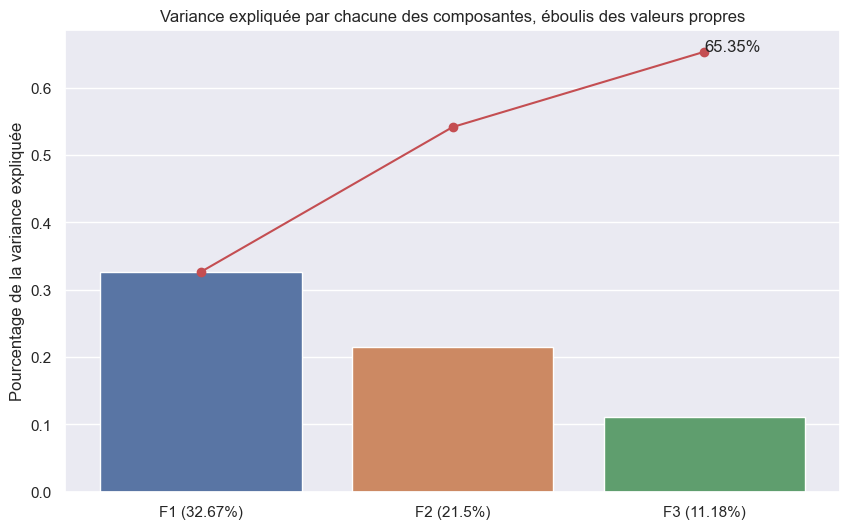

In [859]:
# explication de la variance dans chacune des composantes, éboulis des valeurs propres

cumsum_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize = (10,6))

sns.barplot(x=[n for n in range(pca.components_.shape[0])],
            y=pca.explained_variance_ratio_)

plt.plot([n for n in range(pca.components_.shape[0])], cumsum_variance, c='r', marker='o')


listF = []
for x in range(pca.components_.shape[0]):
    a = f"F{x+1} ({round(100*pca.explained_variance_ratio_[x],2)}%)"
    listF.append(a)
    
plt.text(max([n for n in range(pca.components_.shape[0])]), cumsum_variance.max(), '{:.2%}'.format(round(cumsum_variance.max(),4)))  
plt.title("Variance expliquée par chacune des composantes, éboulis des valeurs propres")
plt.ylabel("Pourcentage de la variance expliquée")
plt.xticks([n for n in range(pca.components_.shape[0])], listF);

68% de la variance est expliquée par les 3 composantes principales, l'ACP est acceptable.

#### Représentation des composantes dans les variables

On cherche à voir ce que représente chaque composante en regardant pour chaque variable par quelle composante est le plus représentée. Ensuite on groupera les variables et on dégagera une idée globale du groupe de variable pour nommer la composante principale.

In [860]:
df_composante = pd.DataFrame(data=pca.components_, index=['F1', 'F2', 'F3'], columns=kmo_col).T
df_composante

F1    F2    F3
production                           0.32  0.35  0.02
volaille_consommée                   0.31  0.36  0.11
taux_autosuffisance                  0.19  0.06 -0.47
proportion_animaux_nourriture        0.18 -0.22  0.36
population                           0.19  0.43  0.11
taux_accroissement_population_moyen -0.16  0.14  0.49
lpi                                  0.38 -0.22  0.04
pib                                  0.36  0.14  0.12
taux_droit_douane                   -0.27  0.20  0.29
quantite_conteneurs_par_annee        0.33  0.10  0.19
cout_production_volaille            -0.17 -0.10  0.44
taux_population_urbaine              0.29 -0.20  0.04
stabilite_politique                  0.16 -0.44  0.01
pib_par_habitant                     0.26 -0.36  0.23

#### On identifie par quelle composante chaque variable est le plus représentée

In [861]:
# on copie df_composante et on sort les variables
df_composante2 = df_composante.reset_index()
df_composante2.rename(columns={'index':'variable'}, inplace=True)

In [862]:
# on pivote les 3 composantes sur une colonne
melt = pd.melt(df_composante2, id_vars='variable', value_vars=['F1','F2','F3'], var_name = 'composantes',
        value_name='correlation')

In [863]:
# valeur absolu correlation
melt['correlation_abs'] = melt['correlation'].abs()

# window function pour avoir le rang de chaque composante
melt['rank'] = melt.groupby(['variable'])['correlation_abs'].rank(ascending=False)

In [864]:
V = melt[melt['rank']==1][['variable', 'composantes', 'correlation']]
V

variable composantes  correlation
6                                   lpi          F1         0.38
7                                   pib          F1         0.36
9         quantite_conteneurs_par_annee          F1         0.33
11              taux_population_urbaine          F1         0.29
14                           production          F2         0.35
15                   volaille_consommée          F2         0.36
18                           population          F2         0.43
26                  stabilite_politique          F2        -0.44
27                     pib_par_habitant          F2        -0.36
30                  taux_autosuffisance          F3        -0.47
31        proportion_animaux_nourriture          F3         0.36
33  taux_accroissement_population_moyen          F3         0.49
36                    taux_droit_douane          F3         0.29
38             cout_production_volaille          F3         0.44

#### Analyse du sens des composantes principales

2eme itération : analyse sans les outliers

F1 : 
- Associé à la taille du pays, à la richesse globale et au flux économique global.
- On l'associe globalement à la **Puissance commerciale et logistique**.


F2 : 
- Associé à la pauvreté, au non développement urbain et logistique du pays et à la non stabilité politique.
- On l'associe globalement à la **Taille et qualité de vie**.


F3 : 
- Associé à la présence viande dans la nourriture, à la non auto-suffisance et cout de production assez élevé de la volaille
- On l'associe globalement à **Condition de marché**.

1ère itération : analyse avec les outliers

F1 : 
- Associé à la taille du pays, à la richesse globale et au flux économique global.
- On l'associe globalement à la **Puissance économique**.


F2 : 
- Associé à la pauvreté, au non développement urbain et logistique du pays et à la non stabilité politique.
- On l'associe globalement à la **Qualité de vie des individus**.


F3 : 
- Associé à la présence viande dans la nourriture, à la non auto-suffisance et cout de production assez élevé de la volaille
- On l'associe globalement à **Condition de marché et demande en volaille**.

#### Cercle de corrélation et Représentation des individus sur le plan factoriel

In [678]:
# représenation des individus sur le plan factoriel
X_projected = pca.transform(X_scaled)

df_projection = pd.DataFrame(data=X_projected, columns=['F1', 'F2', 'F3'], index=pays)
df_projection

F1    F2    F3
Afrique du Sud                                      1.82  1.60  0.49
Albanie                                            -1.18 -0.72 -1.44
Algérie                                            -1.38  1.32 -0.42
Allemagne                                           5.78  0.93  0.55
Angola                                             -2.17  0.85  1.10
Antigua-et-Barbuda                                 -1.91 -1.11  2.18
Arabie saoudite                                     1.29  0.75  1.19
Argentine                                           2.28  1.33 -0.06
Arménie                                            -1.93 -0.48  0.12
Australie                                           3.51 -1.06  1.12
Autriche                                            0.99 -2.20 -0.10
Azerbaïdjan                                        -1.53  0.62 -1.00
Barbade                                            -1.55 -1.00  0.58
Belgique                                            3.22 -1.40 -2.32
Belize                                             -2.07  0.02  0.52
Bolivie (État plurinational de)                    -0.60  0.25 -0.23
Bosnie-Herzégovine                                 -0.68  0.05 -2.98
Botswana                                           -0.78 -1.01 -0.76
Bulgarie                                           -0.09 -1.16 -1.41
Bélarus                                             0.22 -0.29 -2.24
Bénin                                              -2.43  0.58  0.82
Cameroun                                           -2.51  1.52  0.02
Canada                                              3.69 -0.36  0.17
Chili                                               1.17 -0.63 -0.12
Chine - RAS de Hong-Kong                            3.68 -3.08  2.29
Chine - RAS de Macao                                1.56 -4.10  2.84
Chypre                                             -0.45 -1.67  0.58
Colombie                                            0.86  1.84 -0.05
Congo                                              -2.22  0.24  1.30
Congo                                              -2.99  1.29  1.54
Costa Rica                                         -0.18 -0.99 -0.73
Croatie                                            -0.03 -1.21 -1.99
Côte d'Ivoire                                      -1.87  1.02 -0.23
Danemark                                            1.88 -2.36 -1.08
Dominique                                          -1.21 -1.30  0.19
El Salvador                                        -1.01 -0.38 -0.84
Espagne                                             3.98  0.52  0.18
Estonie                                             0.01 -1.51 -1.53
Eswatini                                           -1.51  0.14 -1.57
Fidji                                              -2.35 -0.46  1.04
Finlande                                            1.71 -2.35 -1.15
France                                              4.27  0.68  0.12
Fédération de Russie                                4.70  5.65  0.12
Gabon                                              -2.26 -0.09  2.09
Ghana                                              -2.06  0.68  0.57
Grèce                                               0.82 -0.92 -1.54
Guatemala                                          -1.22  0.44 -0.04
Guyana                                             -1.87  0.07 -1.15
Géorgie                                            -1.08 -0.38 -1.68
Honduras                                           -1.35  0.45 -0.48
Hongrie                                             1.05 -1.12 -2.13
Indonésie                                           3.16  4.76  0.84
Iran (République islamique d')                      0.58  3.53  0.72
Iraq                                               -2.09  1.85  0.89
Irlande                                             1.00 -2.48  0.42
Islande                                             0.77 -3.78  2.15
Israël                                              1.33 -0.76  0.38
Italie                                              

Tous les individus ont été transformés sur le plan factoriel. C'est à dire qu'ils ont été réduit selon leurs composantes principales.

In [935]:
df_projection2.sort_values('F2')

F1    F2    F3  \
Luxembourg                                          0.63 -4.49  4.16   
Chine - RAS de Macao                                1.56 -4.10  2.84   
Islande                                             0.77 -3.78  2.15   
Chine - RAS de Hong-Kong                            3.68 -3.08  2.29   
Suisse                                              1.61 -2.94  0.60   
Norvège                                             1.47 -2.84  0.34   
Nouvelle-Zélande                                    1.55 -2.66  0.25   
Suède                                               1.71 -2.55  0.19   
Irlande                                             1.00 -2.48  0.42   
Danemark                                            1.88 -2.36 -1.08   
Finlande                                            1.71 -2.35 -1.15   
Malte                                               0.61 -2.21 -0.31   
Autriche                                            0.99 -2.20 -0.10   
Chypre                                             -0.45 -1.67  0.58   
Polynésie française                                -0.70 -1.66  1.18   
Tchéquie                                            0.65 -1.61 -0.72   
Lituanie                                            0.67 -1.60 -2.59   
Lettonie                                            0.14 -1.55 -1.85   
Slovénie                                            0.03 -1.52 -1.19   
Portugal                                            1.02 -1.51 -0.97   
Estonie                                             0.01 -1.51 -1.53   
Slovaquie                                           0.05 -1.44 -1.18   
Uruguay                                             0.20 -1.43 -1.49   
Belgique                                            3.22 -1.40 -2.32   
Dominique                                          -1.21 -1.30  0.19   
Saint-Kitts-et-Nevis                               -1.69 -1.30  2.45   
Émirats arabes unis                                 1.57 -1.29  3.13   
Croatie                                            -0.03 -1.21 -1.99   
Pays-Bas                                            4.17 -1.17 -2.13   
Bulgarie                                           -0.09 -1.16 -1.41   
Maurice                                            -0.52 -1.16 -1.05   
Koweït                                             -0.24 -1.16  1.40   
Oman                                               -0.47 -1.13  1.39   
Hongrie                                             1.05 -1.12 -2.13   
Antigua-et-Barbuda                                 -1.91 -1.11  2.18   
Australie                                           3.51 -1.06  1.12   
Samoa                                              -2.27 -1.04  1.65   
Botswana                                           -0.78 -1.01 -0.76   
Barbade                                            -1.55 -1.00  0.58   
Costa Rica                                         -0.18 -0.99 -0.73   
Grèce                                               0.82 -0.92 -1.54   
Trinité-et-Tobago                                  -1.21 -0.87  0.43   
Panama                                             -0.08 -0.79  0.50   
Israël                                              1.33 -0.76  0.38   
Namibie                                            -1.50 -0.74 -0.05   
Albanie                                            -1.18 -0.72 -1.44   
Monténégro                                         -1.26 -0.67 -0.68   
Chili                                               1.17 -0.63 -0.12   
Suriname                                           -1.91 -0.58  0.93   
Serbie                                             -0.62 -0.50 -1.77   
Arménie                                            -1.93 -0.48  0.12   
Fidji                                              -2.35 -0.46  1.04   
Jamaïque                                           -1.38 -0.40  0.14   
El Salvador                                        -1.01 -0.38 -0.84   
Géorgie                                            -1.08 -0.38 -1.68   
Macédoine du Nord     

In [936]:
V

variable composantes  correlation
6                                   lpi          F1         0.38
7                                   pib          F1         0.36
9         quantite_conteneurs_par_annee          F1         0.33
11              taux_population_urbaine          F1         0.29
14                           production          F2         0.35
15                   volaille_consommée          F2         0.36
18                           population          F2         0.43
26                  stabilite_politique          F2        -0.44
27                     pib_par_habitant          F2        -0.36
30                  taux_autosuffisance          F3        -0.47
31        proportion_animaux_nourriture          F3         0.36
33  taux_accroissement_population_moyen          F3         0.49
36                    taux_droit_douane          F3         0.29
38             cout_production_volaille          F3         0.44

In [679]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(20, 18))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # # Affichage du titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [680]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None,
                                centroides=None,
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')
    
    # On vérifie s'il y a des centroides ou non
    if centroides is None : 
        centroides = []
    if len(centroides) :   
    # visualisation des centroides sous forme de croix rouge
        plt.scatter(centroides[:,x], centroides[:,y], c='r', marker='x', s=100)

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

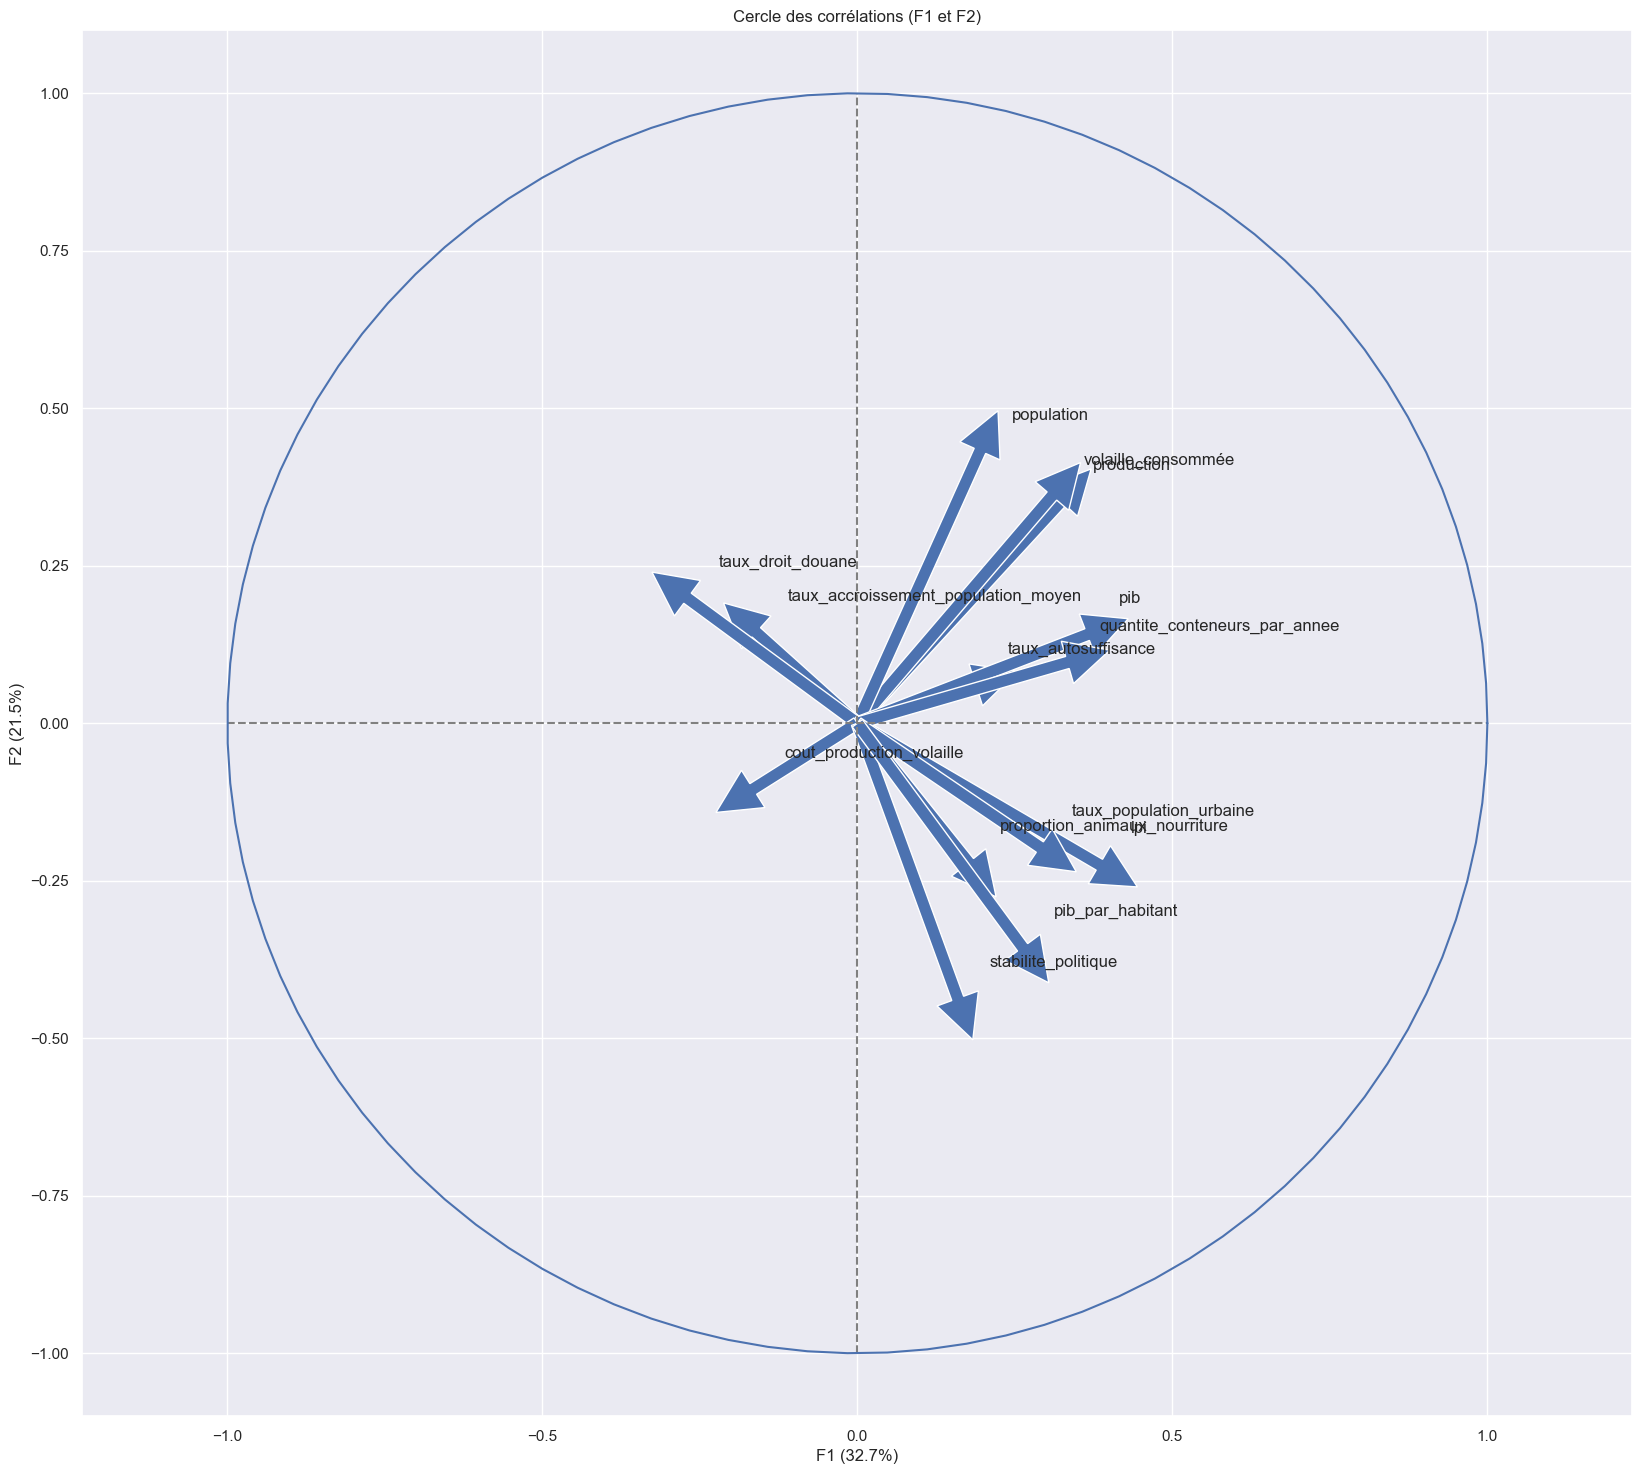

In [681]:
# Plan factoriel composé de F1 et F2
# affichage des variables sur ce plan factoriel
# affichage du cercle des corrélations

x_y = (0,1)
features = kmo_col
correlation_graph(pca, x_y, features)

Itération 2 :
2 groupes de variables 

idéalement on veut des pays entre les 2 groupes :
F1>0
-0.3<F2<0.3

on veut surtout éviter la partie gauche de cercle

Itération 1 :

On peut confirmer les groupes de variables indiqués ci-dessus. 

On a bien un groupe de variables pointant vers le quart supérieur droit qu'on peut représenter par la **Puissance économique** avec une dimension marché étant donné que "volaille consommé" pointe aussi dans cette direction.

Puis un autre groupe de variable pointant le quart inférieur droit qu'on peut représenter par la **Qualité de vie des individus**.

Sur ce plan factoriel, on cherchera plutôt des pays positionnés entre les 2 groupes de variables, avec une assez forte puissance économique et une bonne qualité de vie. C'est à dire avec un F1 positif fort et un F2 négatif fort (idéalement).

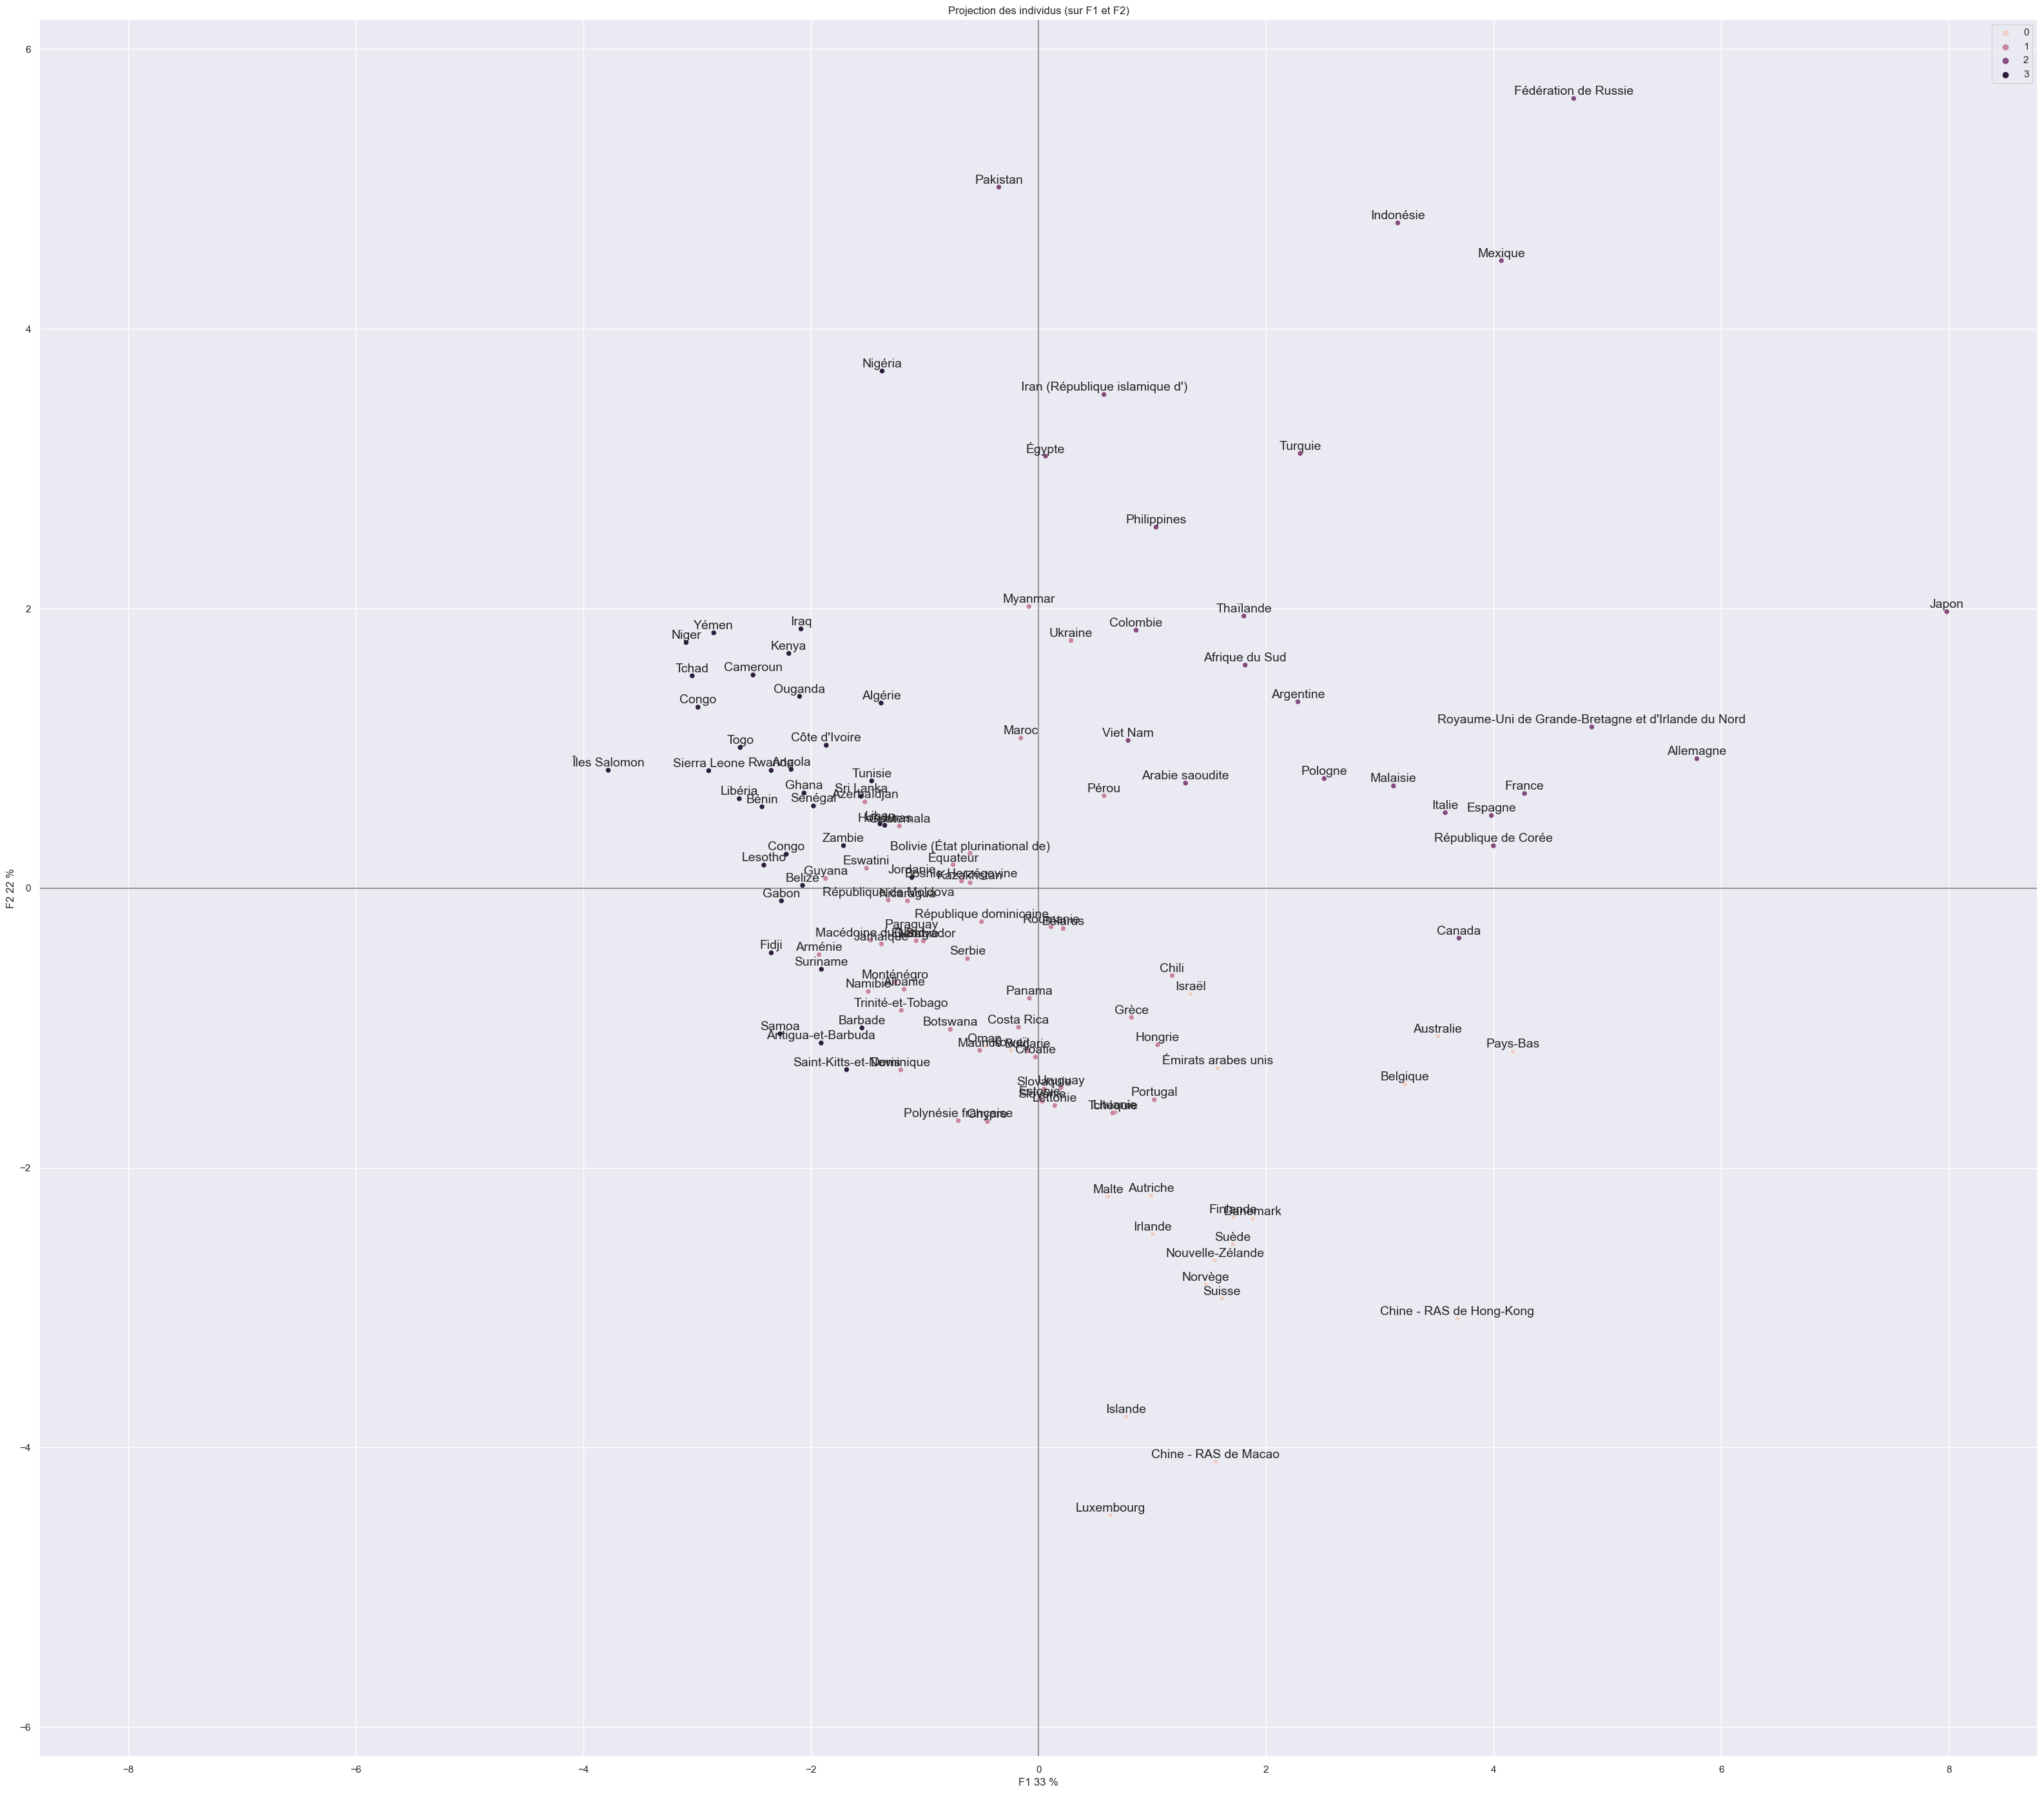

In [682]:
x_y = (0,1)

display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=pca, 
                                labels = pays,
                                clusters=clusters_kmeans,
                                centroides=None,
                                alpha=1,
                                figsize=[40,35],
                                marker="." )

Les pays adaptés pour implanter une nouvelle usine de poulets sont plutôt ceux qui appartiennent aux clusters en bas à droite. 
On y retrouve par exemple, l'Irlande du Nord, l'Allemagne ou le Japon.

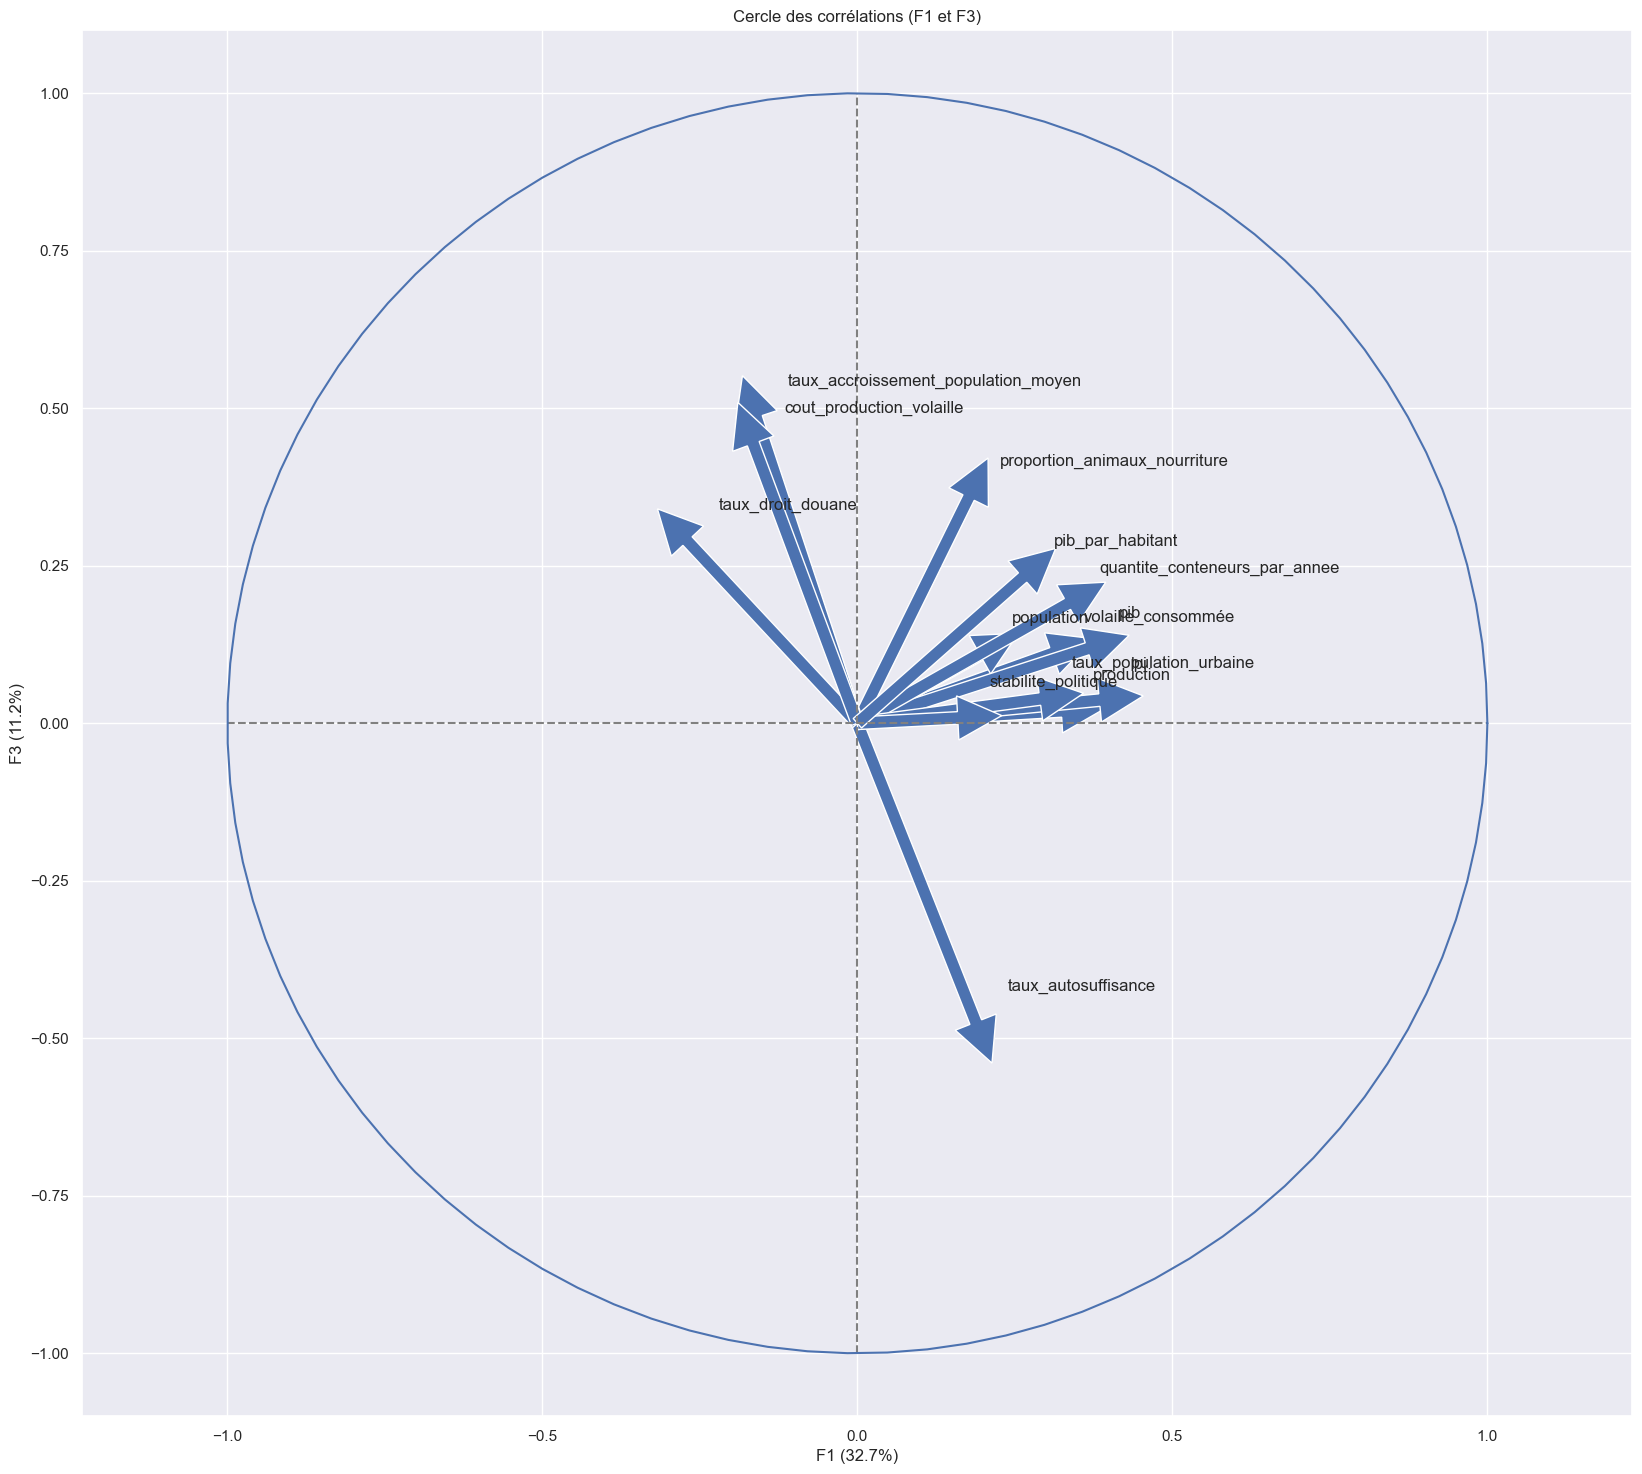

In [683]:
# Cercle des corrélation sur F1 et F3

x_y = (0,2)
correlation_graph(pca, x_y, features)

2e itération : 

100% partie droite supérieur du cercle

éviter les autres parties --> variables défavorables pour l'étude de marché

F1>0
F3>0

On retrouve bien des groupes de variables, avec notamment sur F3 le "taux d'autosuffisance" (avec F3 négative) et "proportion volaille dans la nourriture" (avec F3 positive) qu'on peut repésenter la "Condition de marché et demande en volaille".

Selon F3, on cherchera ici des pays appartenant à la moitié supérieur du cercle, idéalement pointant plutôt vers la droite pour éviter les coûts de douane et de production trop élévés.

Selon F1, on a toujours les variables associées à la puissance économique du pays, avec certaines variables associées à la qualité de vie des individus qui se sont ajoutées au groupes en pointant vers le côté droit supérieur du cercle.

Sur ce plan factoriel, on cherchera donc des pays appartenant à la partie supérieur droite du cercle.

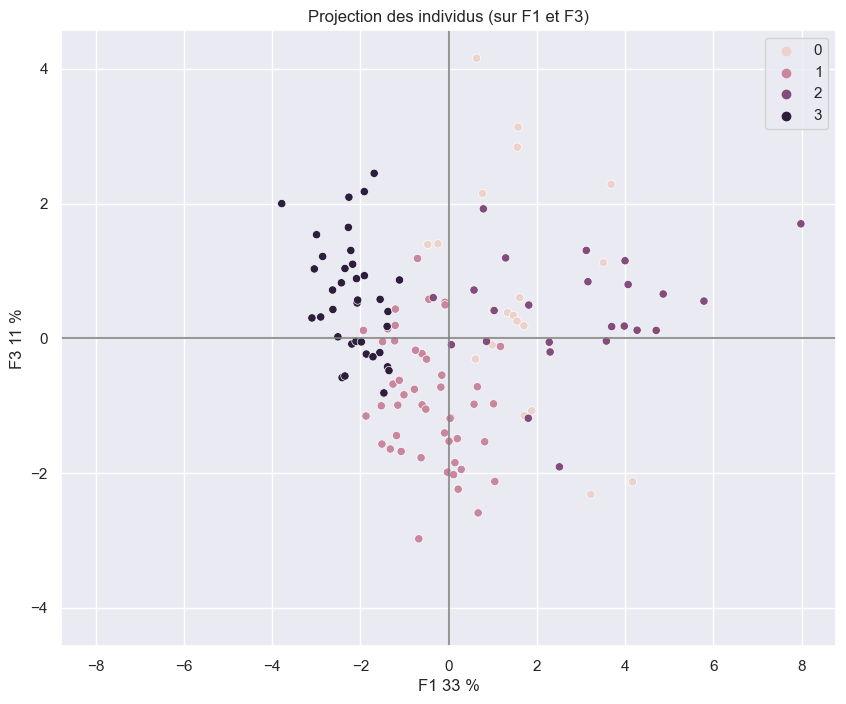

In [684]:
x_y = (0,2)

display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=pca, 
                                labels = None,#pays,
                                clusters=clusters_kmeans, 
                                centroides=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." )

Ici il semblerait que se soit plutôt le Brésil, Hong Kong ou Macao qui soit intéressant.

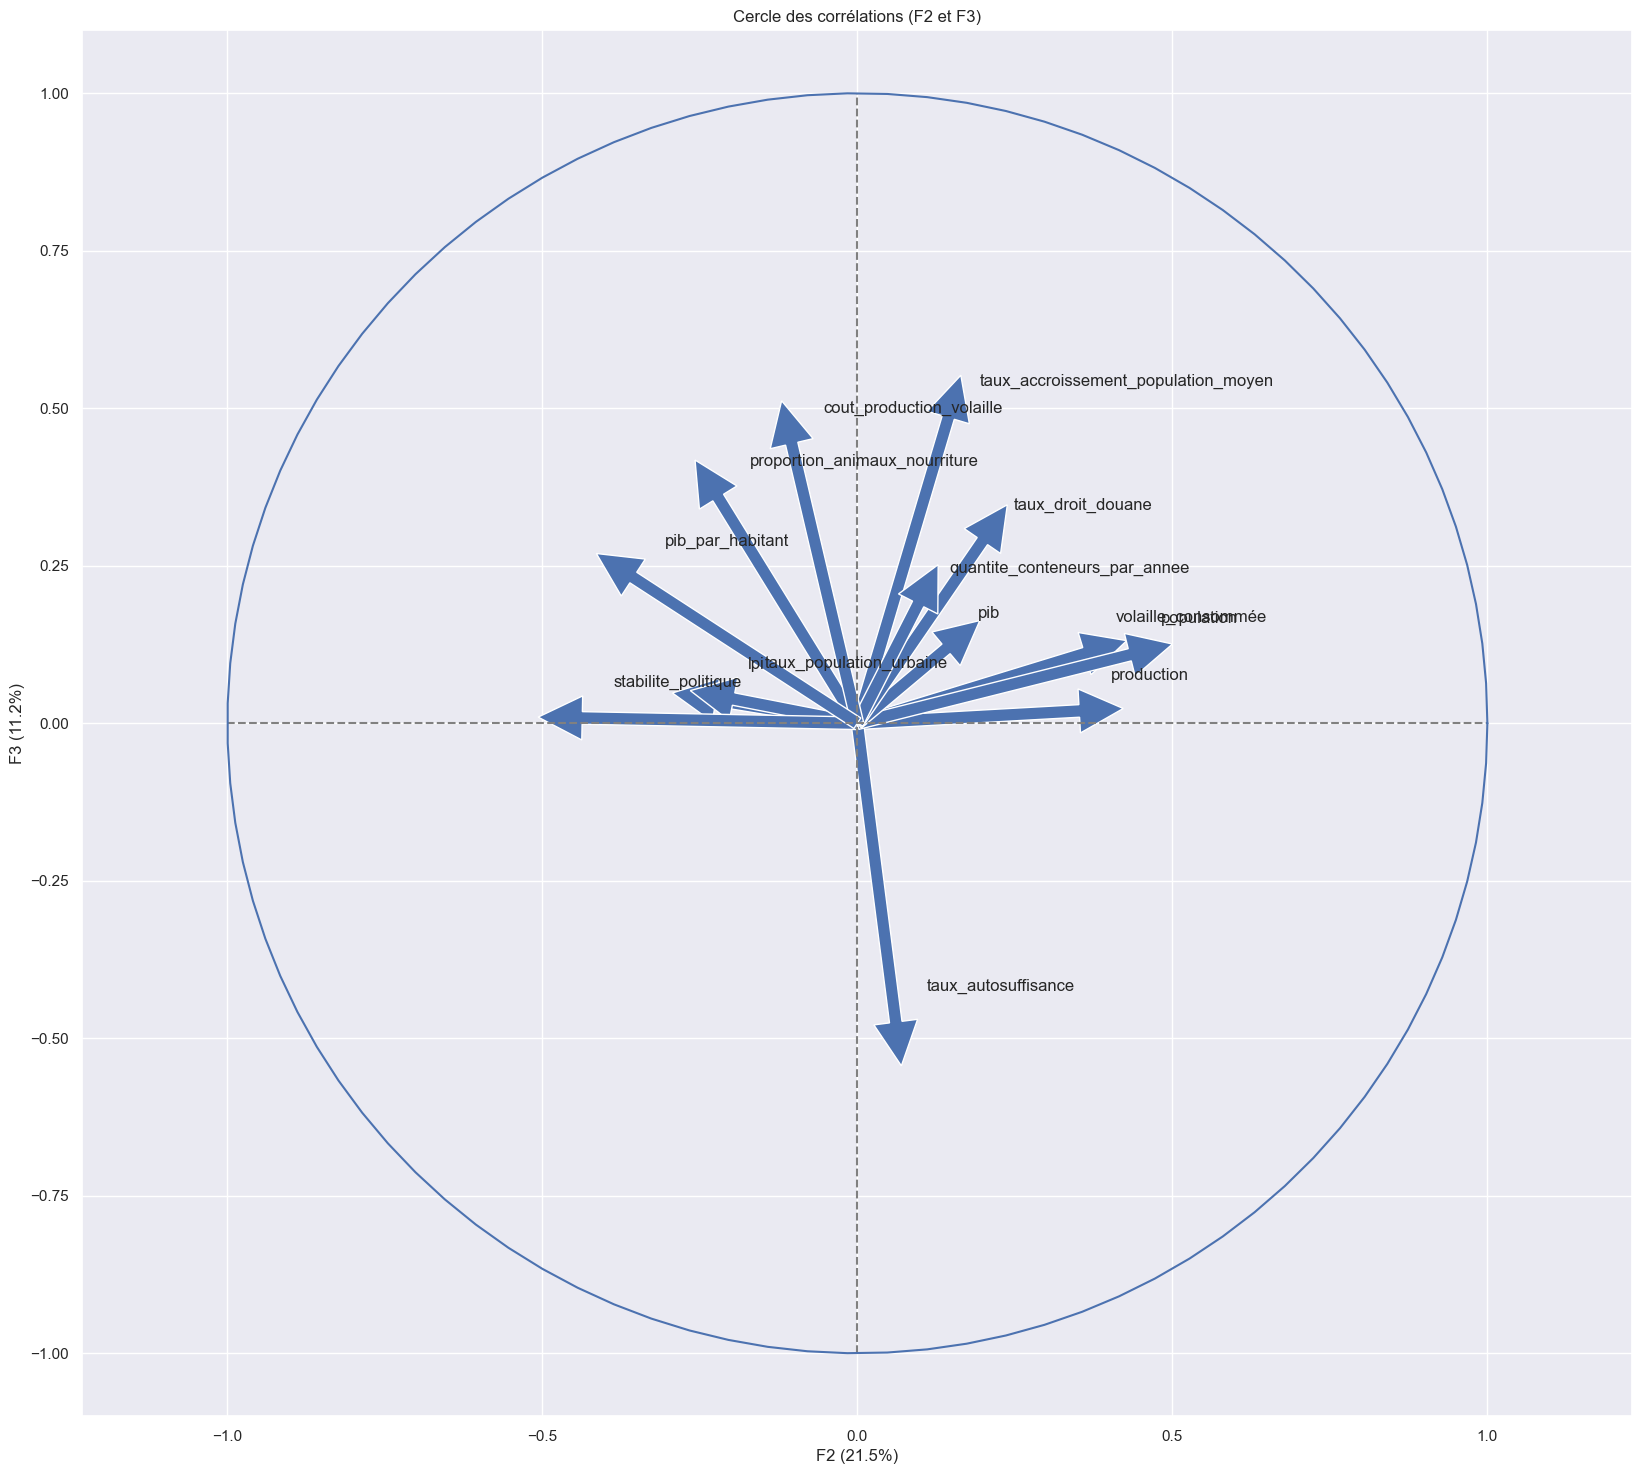

In [685]:
# Cercle des corrélation sur F2 et F3

x_y = (1,2)
correlation_graph(pca, x_y, features)

2e itération : 

Partie supérieur

éviter la partie inférieur

F3>0


Ici, plusieurs de groupes de variables.

On privilégiera les variables bien représentées sur ce plan factoriel, on a le groupe "stabilité, pib/habitant, taux population urbaine et lpi" plutôt associé à la qualité de vie des individus qui ppinte vers la partie gauche de cercle.

Puis le taux d'autosuffisance (négatif) et la proportion de volaille dans la nourriture associée aux conditions de marché qui indique plutôt la partie supérieur gauche du cercle.

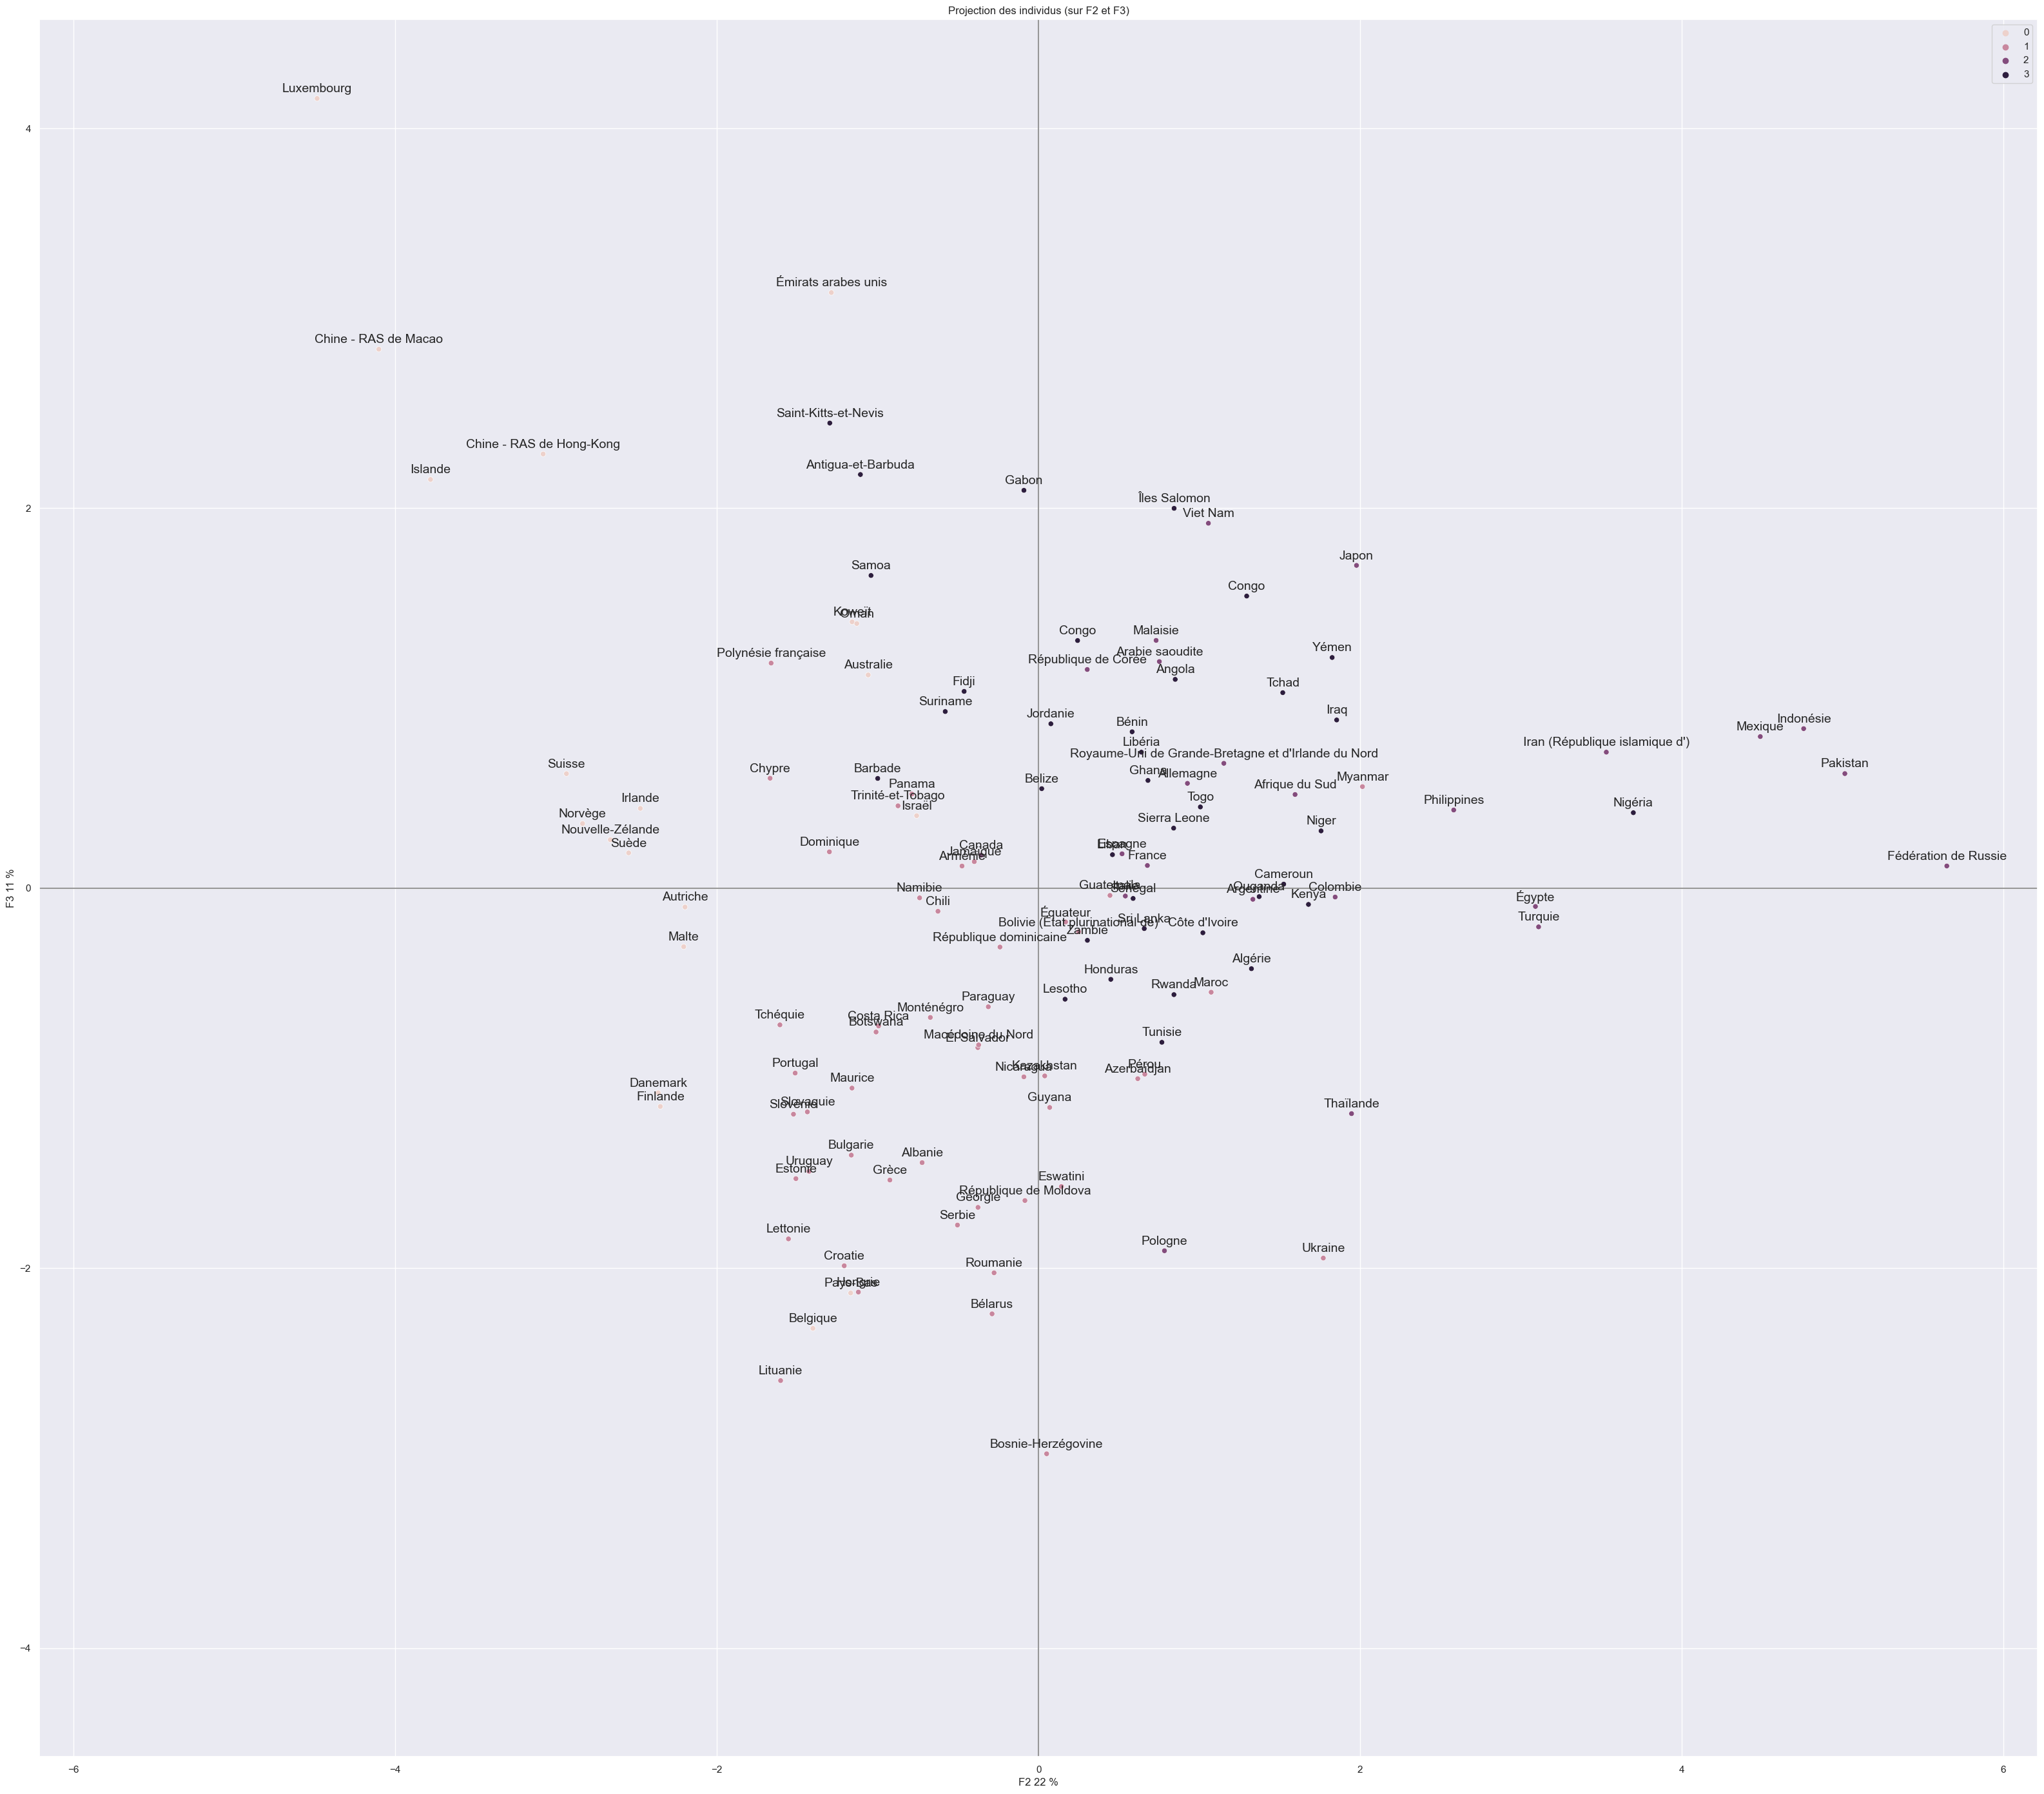

In [686]:
x_y = (1,2)

display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=pca, 
                                labels = pays,
                                clusters=clusters_kmeans, 
                                centroides=None, 
                                alpha=1,
                                figsize=[40,35], 
                                marker="." )

On retrouve encore Macao et Honk Kong.

Polynésie, Luxembourg, Islande et Emirats Arabe Unis aussi éventuellement.

### Qualité de représentation des individus

Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale.

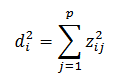

In [687]:
di2 = np.sum(X_scaled**2,axis=1)

df_di2 = pd.DataFrame({'di2':di2}, index=pays)
df_di2.sort_values('di2', ascending=False)

di2
Japon                                              86.94
Fédération de Russie                               70.13
Luxembourg                                         60.94
Indonésie                                          46.63
Chine - RAS de Hong-Kong                           46.16
Mexique                                            45.77
Allemagne                                          45.03
Pays-Bas                                           35.52
Pakistan                                           34.39
Belgique                                           32.33
Islande                                            31.29
Chine - RAS de Macao                               30.84
République de Corée                                30.84
Royaume-Uni de Grande-Bretagne et d'Irlande du ... 29.29
Îles Salomon                                       28.19
Nigéria                                            28.12
Émirats arabes unis                                25.80
Saint-Kitts-et-Nevis                               25.03
Yémen                                              24.91
Malaisie                                           24.32
France                                             23.07
Iran (République islamique d')                     20.02
Turquie                                            19.07
Espagne                                            18.61
Viet Nam                                           18.43
Samoa                                              18.38
Tchad                                              17.87
Suisse                                             17.77
Antigua-et-Barbuda                                 17.42
Niger                                              16.90
Congo                                              16.85
Myanmar                                            16.56
Fidji                                              16.33
Pologne                                            16.19
Canada                                             16.06
Gabon                                              15.77
Australie                                          15.64
Italie                                             14.83
Argentine                                          14.58
Danemark                                           14.34
Norvège                                            14.34
Iraq                                               14.31
Arménie                                            14.19
Barbade                                            13.65
Thaïlande                                          12.58
Finlande                                           11.94
Irlande                                            11.67
Cameroun                                           11.67
Suède                                              11.62
Nouvelle-Zélande                                   11.56
Égypte                                             11.54
Sierra Leone                                       11.42
Ukraine                                            11.35
Bosnie-Herzégovine                                 11.35
Rwanda                                             11.33
Lituanie                                           11.23
Kenya                                              10.89
Philippines                                        10.88
Ouganda                                            10.38
Lesotho                                            10.29
Bénin                                              10.25
Malte                                              10.15
Polynésie française                                10.12
Oman                                               10.02
Koweït                                              9.77
Liban                                               9.43
Afrique du Sud                                      9.41
Togo                                                9.35
Angola                                              9.34
Libéria                                             9.27
Congo 

<AxesSubplot:xlabel='di2'>

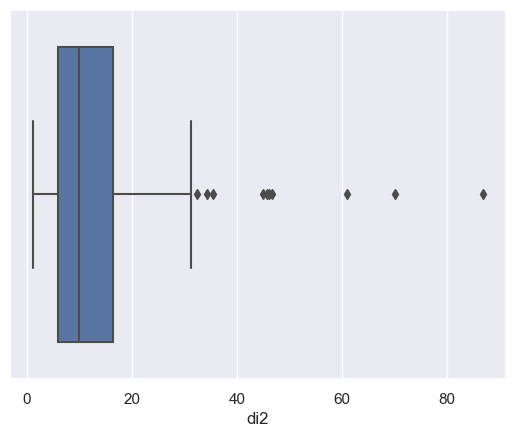

In [865]:
sns.boxplot(df_di2['di2'])

Ensuite nous devons calculer le cos² de chaque individu pour chaque composante qui représente la qualité de représentation par rapport à cette composante.

Ensuite on ajoutera les cos² des 2 composantes principales pour chaque plan factoriel.
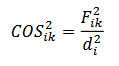

In [689]:
df_projection.shape

(128, 3)

In [690]:
# multiplication de tous les termes par eux même
cos2 = df_projection**2

# application de la formule ci-dessus
for j in range(cos2.columns.shape[0]):    
    cos2.iloc[:,j] = cos2.iloc[:,j]/di2
    
cos2.columns = ['cos2_1', 'cos2_2', 'cos2_3']

cos2

cos2_1  cos2_2  cos2_3
Afrique du Sud                                        0.35    0.27    0.03
Albanie                                               0.16    0.06    0.25
Algérie                                               0.29    0.27    0.03
Allemagne                                             0.74    0.02    0.01
Angola                                                0.51    0.08    0.13
Antigua-et-Barbuda                                    0.21    0.07    0.27
Arabie saoudite                                       0.23    0.08    0.20
Argentine                                             0.36    0.12    0.00
Arménie                                               0.26    0.02    0.00
Australie                                             0.79    0.07    0.08
Autriche                                              0.11    0.55    0.00
Azerbaïdjan                                           0.51    0.08    0.22
Barbade                                               0.18    0.07    0.02
Belgique                                              0.32    0.06    0.17
Belize                                                0.61    0.00    0.04
Bolivie (État plurinational de)                       0.10    0.02    0.02
Bosnie-Herzégovine                                    0.04    0.00    0.78
Botswana                                              0.11    0.18    0.10
Bulgarie                                              0.00    0.24    0.35
Bélarus                                               0.01    0.01    0.64
Bénin                                                 0.58    0.03    0.07
Cameroun                                              0.54    0.20    0.00
Canada                                                0.85    0.01    0.00
Chili                                                 0.42    0.12    0.00
Chine - RAS de Hong-Kong                              0.29    0.21    0.11
Chine - RAS de Macao                                  0.08    0.55    0.26
Chypre                                                0.04    0.57    0.07
Colombie                                              0.11    0.53    0.00
Congo                                                 0.54    0.01    0.19
Congo                                                 0.53    0.10    0.14
Costa Rica                                            0.01    0.33    0.17
Croatie                                               0.00    0.24    0.65
Côte d'Ivoire                                         0.58    0.17    0.01
Danemark                                              0.25    0.39    0.08
Dominique                                             0.17    0.20    0.00
El Salvador                                           0.21    0.03    0.15
Espagne                                               0.85    0.01    0.00
Estonie                                               0.00    0.38    0.39
Eswatini                                              0.33    0.00    0.35
Fidji                                                 0.34    0.01    0.07
Finlande                                              0.25    0.46    0.11
France                                                0.79    0.02    0.00
Fédération de Russie                                  0.32    0.45    0.00
Gabon                                                 0.32    0.00    0.28
Ghana                                                 0.59    0.06    0.04
Grèce                                                 0.13    0.16    0.44
Guatemala                                             0.41    0.05    0.00
Guyana                                                0.49    0.00    0.19
Géorgie                                               0.14    0.02    0.34
Honduras                                              0.57    0.06    0.07
Hongrie                                               0.13    0.15    0.52
Indonésie                                             0.21    0.49    0.02
Iran (République islamique d')                        0.02    0.62    0.03
Ir

In [691]:
cos2['total'] = cos2.sum(axis=1)
cos2

cos2_1  cos2_2  cos2_3  \
Afrique du Sud                                        0.35    0.27    0.03   
Albanie                                               0.16    0.06    0.25   
Algérie                                               0.29    0.27    0.03   
Allemagne                                             0.74    0.02    0.01   
Angola                                                0.51    0.08    0.13   
Antigua-et-Barbuda                                    0.21    0.07    0.27   
Arabie saoudite                                       0.23    0.08    0.20   
Argentine                                             0.36    0.12    0.00   
Arménie                                               0.26    0.02    0.00   
Australie                                             0.79    0.07    0.08   
Autriche                                              0.11    0.55    0.00   
Azerbaïdjan                                           0.51    0.08    0.22   
Barbade                                               0.18    0.07    0.02   
Belgique                                              0.32    0.06    0.17   
Belize                                                0.61    0.00    0.04   
Bolivie (État plurinational de)                       0.10    0.02    0.02   
Bosnie-Herzégovine                                    0.04    0.00    0.78   
Botswana                                              0.11    0.18    0.10   
Bulgarie                                              0.00    0.24    0.35   
Bélarus                                               0.01    0.01    0.64   
Bénin                                                 0.58    0.03    0.07   
Cameroun                                              0.54    0.20    0.00   
Canada                                                0.85    0.01    0.00   
Chili                                                 0.42    0.12    0.00   
Chine - RAS de Hong-Kong                              0.29    0.21    0.11   
Chine - RAS de Macao                                  0.08    0.55    0.26   
Chypre                                                0.04    0.57    0.07   
Colombie                                              0.11    0.53    0.00   
Congo                                                 0.54    0.01    0.19   
Congo                                                 0.53    0.10    0.14   
Costa Rica                                            0.01    0.33    0.17   
Croatie                                               0.00    0.24    0.65   
Côte d'Ivoire                                         0.58    0.17    0.01   
Danemark                                              0.25    0.39    0.08   
Dominique                                             0.17    0.20    0.00   
El Salvador                                           0.21    0.03    0.15   
Espagne                                               0.85    0.01    0.00   
Estonie                                               0.00    0.38    0.39   
Eswatini                                              0.33    0.00    0.35   
Fidji                                                 0.34    0.01    0.07   
Finlande                                              0.25    0.46    0.11   
France                                                0.79    0.02    0.00   
Fédération de Russie                                  0.32    0.45    0.00   
Gabon                                                 0.32    0.00    0.28   
Ghana                                                 0.59    0.06    0.04   
Grèce                                                 0.13    0.16    0.44   
Guatemala                                             0.41    0.05    0.00   
Guyana                                                0.49    0.00    0.19   
Géorgie                                               0.14    0.02    0.34   
Honduras                                              0.57    0.06    0.07   
Hongrie                                               0.13    0.15    0.52

<AxesSubplot:xlabel='total', ylabel='Count'>

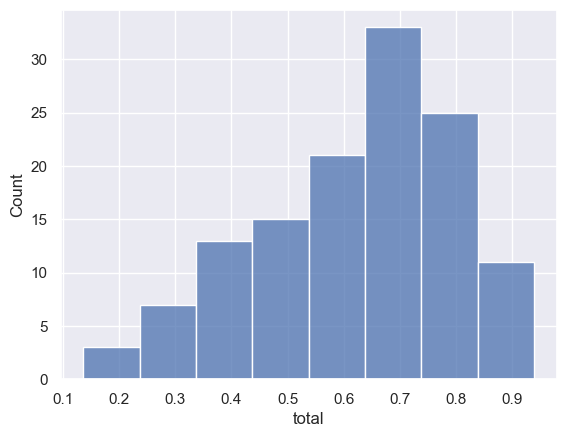

In [692]:
sns.histplot(cos2['total'])

In [693]:
cos2.sort_values('cos2_1', ascending=False)

cos2_1  cos2_2  cos2_3  \
Italie                                                0.86    0.02    0.00   
Espagne                                               0.85    0.01    0.00   
Canada                                                0.85    0.01    0.00   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...    0.81    0.05    0.01   
France                                                0.79    0.02    0.00   
Australie                                             0.79    0.07    0.08   
Libéria                                               0.75    0.04    0.06   
Allemagne                                             0.74    0.02    0.01   
Sierra Leone                                          0.74    0.06    0.01   
Togo                                                  0.74    0.11    0.02   
Japon                                                 0.73    0.04    0.03   
Sénégal                                               0.66    0.06    0.00   
Belize                                                0.61    0.00    0.04   
Ghana                                                 0.59    0.06    0.04   
Côte d'Ivoire                                         0.58    0.17    0.01   
Bénin                                                 0.58    0.03    0.07   
Honduras                                              0.57    0.06    0.07   
Niger                                                 0.57    0.18    0.01   
Lesotho                                               0.57    0.00    0.03   
Suriname                                              0.55    0.05    0.13   
Congo                                                 0.54    0.01    0.19   
Cameroun                                              0.54    0.20    0.00   
Congo                                                 0.53    0.10    0.14   
Équateur                                              0.52    0.03    0.03   
Tchad                                                 0.52    0.13    0.06   
République de Corée                                   0.52    0.00    0.04   
Azerbaïdjan                                           0.51    0.08    0.22   
Zambie                                                0.51    0.02    0.01   
Paraguay                                              0.51    0.04    0.16   
Îles Salomon                                          0.51    0.03    0.14   
Angola                                                0.51    0.08    0.13   
Pays-Bas                                              0.49    0.04    0.13   
Rwanda                                                0.49    0.06    0.03   
Guyana                                                0.49    0.00    0.19   
Kenya                                                 0.44    0.26    0.00   
Jamaïque                                              0.43    0.04    0.00   
Ouganda                                               0.42    0.18    0.00   
Chili                                                 0.42    0.12    0.00   
Guatemala                                             0.41    0.05    0.00   
Malaisie                                              0.40    0.02    0.07   
Nicaragua                                             0.40    0.00    0.29   
Pologne                                               0.39    0.04    0.23   
Namibie                                               0.38    0.09    0.00   
Tunisie                                               0.37    0.10    0.11   
Monténégro                                            0.36    0.10    0.11   
Mexique                                               0.36    0.44    0.01   
Argentine                                             0.36    0.12    0.00   
Afrique du Sud                                        0.35    0.27    0.03   
Fidji                                                 0.34    0.01    0.07   
Yémen                                                 0.33    0.13    0.06   
Eswatini                                              0.33    0.00    0.35

### 1er Tri

Pour simplifier et dégrossir le problème, on souhaite sur les 3 plans factoriels :
- Puissance économique + --> F1 > 0
- Qualité de vie des individus + --> F2 < 0
- Condition de marché et demande en volaille + --> F3 > 0

In [694]:
df_projection2 = df_projection.copy()

In [695]:
df_projection2['clusters_cah'] = clusters_cah

In [696]:
df_projection2['clusters_kmeans'] = clusters_kmeans

In [697]:
df_projection2[(df_projection2['F1']>0)&(df_projection2['F2']<0)&(df_projection2['F3']>0)]

F1    F2   F3  clusters_cah  clusters_kmeans
Australie                3.51 -1.06 1.12             0                0
Canada                   3.69 -0.36 0.17             0                2
Chine - RAS de Hong-Kong 3.68 -3.08 2.29             3                0
Chine - RAS de Macao     1.56 -4.10 2.84             1                0
Irlande                  1.00 -2.48 0.42             1                0
Islande                  0.77 -3.78 2.15             1                0
Israël                   1.33 -0.76 0.38             1                0
Luxembourg               0.63 -4.49 4.16             1                0
Norvège                  1.47 -2.84 0.34             1                0
Nouvelle-Zélande         1.55 -2.66 0.25             1                0
Suisse                   1.61 -2.94 0.60             1                0
Suède                    1.71 -2.55 0.19             1                0
Émirats arabes unis      1.57 -1.29 3.13             0                0

In [866]:
df_projection2[df_projection2['clusters_kmeans']==0]

F1    F2    F3  clusters_cah  clusters_kmeans
Australie                 3.51 -1.06  1.12             0                0
Autriche                  0.99 -2.20 -0.10             1                0
Belgique                  3.22 -1.40 -2.32             3                0
Chine - RAS de Hong-Kong  3.68 -3.08  2.29             3                0
Chine - RAS de Macao      1.56 -4.10  2.84             1                0
Danemark                  1.88 -2.36 -1.08             1                0
Finlande                  1.71 -2.35 -1.15             1                0
Irlande                   1.00 -2.48  0.42             1                0
Islande                   0.77 -3.78  2.15             1                0
Israël                    1.33 -0.76  0.38             1                0
Koweït                   -0.24 -1.16  1.40             0                0
Luxembourg                0.63 -4.49  4.16             1                0
Malte                     0.61 -2.21 -0.31             1                0
Norvège                   1.47 -2.84  0.34             1                0
Nouvelle-Zélande          1.55 -2.66  0.25             1                0
Oman                     -0.47 -1.13  1.39             0                0
Pays-Bas                  4.17 -1.17 -2.13             3                0
Suisse                    1.61 -2.94  0.60             1                0
Suède                     1.71 -2.55  0.19             1                0
Émirats arabes unis       1.57 -1.29  3.13             0                0

Ces pays pourrait être candidats pour acceuillir l'entreprise.

On voit que selon, le KMeans, ils appartiennent tous au même clusters.

#### Représentation 3D

In [698]:
title = "Représentation des pays en fonction des 3 composantes principales"

fig = px.scatter_3d(x=X_projected[:,0], y=X_projected[:,1], z=X_projected[:, 2], hover_name=pays,
              color=clusters_kmeans, title=title, labels={'x':'F1', 'y':'F2', 'z':'F3'})
fig.show()

#### On refait le KMeans après ACP pour comparer les résultats

In [699]:
# création de l'estimateur

kmeans2 = KMeans(n_clusters=4)

kmeans2 = kmeans.fit(df_projection)

In [700]:
# clusters de l'echantillon

clusters_kmeans2 = kmeans2.labels_

In [701]:
# centroides kmeans après pca

df_centroides2 = pd.DataFrame(kmeans2.cluster_centers_, columns=['F1', 'F2', 'F3'])
df_centroides2

F1    F2    F3
0 -1.90  0.69  0.44
1  3.17  1.57  0.33
2 -0.18 -0.64 -1.24
3  1.06 -2.41  0.98

In [702]:
# centroides kmeans avant pca

df_centroides = pd.DataFrame(pca.transform(centroides), columns=['F1', 'F2', 'F3'])
df_centroides

F1    F2    F3
0  1.61 -2.30  0.68
1 -0.47 -0.53 -0.92
2  2.84  2.00  0.39
3 -2.16  0.65  0.59

On retrouve les mêmes résultats pour 3 clusters sur 4.

In [703]:
title = "Représentation des pays en fonction des 3 composantes principales"

fig = px.scatter_3d(x=X_projected[:,0], y=X_projected[:,1], z=X_projected[:, 2], hover_name=pays,
              color=clusters_kmeans, title=title, labels={'x':'F1', 'y':'F2', 'z':'F3'})
fig.show()

# 1ère itération simplifiée

In [867]:
def preparation_df(df):
    
    # on garde uniquement les données numériques pour l'analyse 
    X = df.drop(columns='pays')
    
    # pays dans une variable array
    pays = df['pays'].values
    
    # variables utilisées dans une variable array
    variables = X.columns.values
    
    # On centre et on réduit l'échantillon pour s'assurer que chaque variable aura la même incidence sur la classification
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # df standardisé
    df_X_scaled = pd.DataFrame(X_scaled, columns=variables, index=pays)
    
    return df_X_scaled, X_scaled, X, pays, variables

In [868]:
# pour cette itération df = df_knn
df = df_knn

In [869]:
# on enlève les outliers
outliers = df[df['pays'].isin(['Chine, continentale', 'Brésil', 'Inde', "États-Unis d'Amérique"])]
df = df.drop(outliers.index).reset_index(drop=True)

In [870]:
# la fonction créé 3 objets à partir d'un df de base
df_X_scaled, X_scaled, X, pays, variables = preparation_df(df)

In [871]:
def dendrogramme(df_X_scaled, figsize=(10,10)) :
    
    # faire random sample echantillon de 30 pays
    # faire plusieurs itération pour valider les clusters
    echantillon = df_X_scaled.sample(50)


    # mesure les liens entre les clusters avec la méthode de ward
    # chaque fois que 2 clusters sont regroupés, cherche à minimiser l'inertie intraclasse

    Z = linkage(echantillon, 'ward')


    # création du dendogramme
    plt.figure(figsize=figsize)
    dendrogram(Z, p=echantillon.shape[0], truncate_mode='lastp', distance_sort='ascending',
               orientation='right', labels=echantillon.index)
    plt.title("Dendrogramme, Classification ascendante hiérarchique des pays")
    plt.xlabel('Distance')
    plt.show()

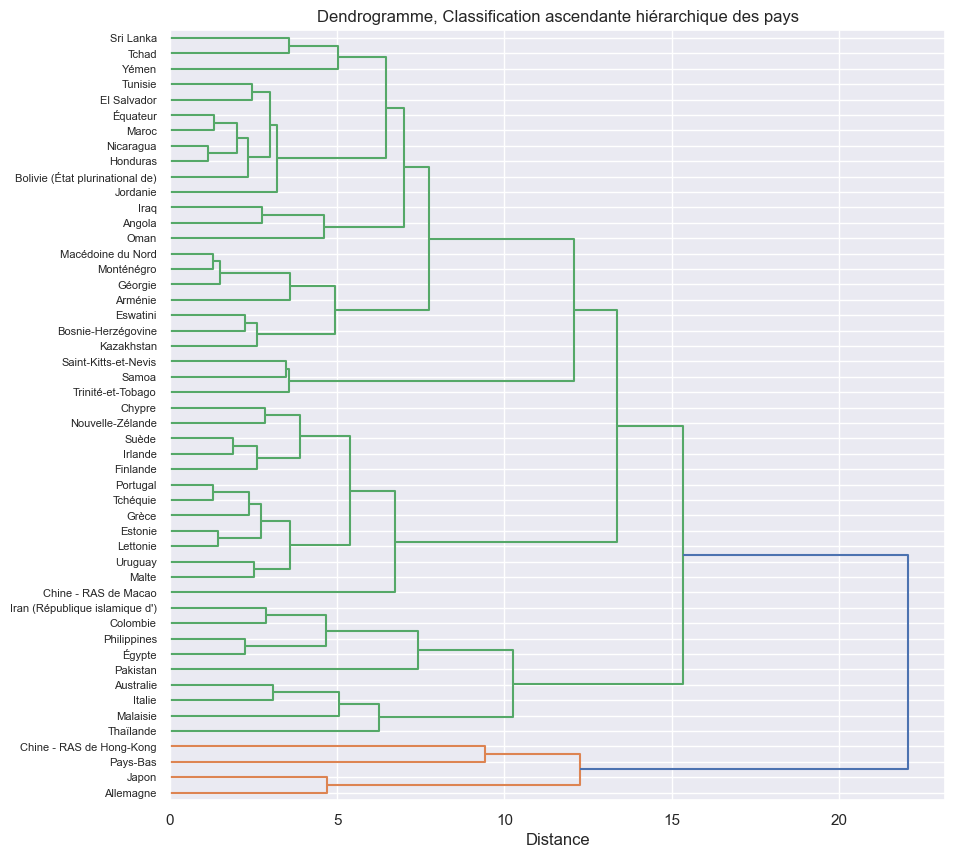

In [872]:
dendrogramme(df_X_scaled, figsize=(10,10))

In [873]:
def classification_hierarchique(X_scaled, n_clusters):
    # création de la classification
    cah = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

    cah = cah.fit(X_scaled)
    
    clusters_cah = cah.labels_
    
    return cah, clusters_cah

In [874]:
# renvoie l'estimateur de la classification hiérarchique et les clusters
cah, clusters_cah = classification_hierarchique(X_scaled, n_clusters=4)

In [875]:
def KMO(X):
    kmo = calculate_kmo(X)[1]
    bartlett_sphericity_p_value = calculate_bartlett_sphericity(X)[1]
    print(f"Le KMO est de {kmo}")
    print(f"La p-value du test de sphérité de bartlett est de {bartlett_sphericity_p_value}")
    return kmo

In [876]:
# renvoie la valeur du kmo et du test de sphérité de bartlett
KMO(X)

Le KMO est de 0.6339454032726262
La p-value du test de sphérité de bartlett est de 0.0


0.6339454032726262

In [877]:
def KMO_variable(X):
    kmo_variable = pd.DataFrame(data=calculate_kmo(X)[0], index=X.columns.values, columns=['KMO'])
    kmo_variable = kmo_variable.sort_values('KMO', ascending = False)
    return kmo_variable

In [878]:
kmo_variable = KMO_variable(X)
kmo_variable

KMO
stabilite_politique                      0.88
taux_population_urbaine                  0.81
quantite_conteneurs_par_annee            0.79
lpi                                      0.77
taux_droit_douane                        0.74
pib                                      0.66
cout_production_volaille                 0.65
population                               0.63
pib_par_habitant                         0.63
proportion_animaux_nourriture            0.62
taux_autosuffisance                      0.61
production                               0.59
volaille_consommée                       0.58
taux_accroissement_population_moyen      0.56
importation_volaille                     0.54
accroissement_population_moyen_par_annee 0.52
exportation_volaille                     0.52
proportion_volaille_nourriture           0.50
taux_dependance                          0.48

#### Amélioration KMO

In [879]:
def amelioration_KMO_avec_KMO_variables(kmo_variable, val_kmo=0.5):
    
    # conserve uniquement les variables dont le KMO > 0.5
    # colonnes qu'on utilisera par la suite si cette méthode est la meilleure
    kmo_col = kmo_variable[kmo_variable['KMO'] > val_kmo].index.values
    # kmo avec les variables de cette méthode
    kmo_ameliore_1 = calculate_kmo(X[kmo_col])[1]
    # df avec variables + KMO
    kmo_variable_ameliore_1 = pd.DataFrame(calculate_kmo(X[kmo_col])[0], columns=['KMO'], 
                                           index=kmo_col).sort_values('KMO', ascending=False)
    return kmo_col, kmo_ameliore_1, kmo_variable_ameliore_1

In [880]:
kmo_col, kmo_ameliore_1, kmo_variable_ameliore_1 = amelioration_KMO_avec_KMO_variables(kmo_variable)

In [881]:
def amelioration_KMO_communalities(X, val_com=0.3):
    
    from factor_analyzer import FactorAnalyzer
    # Les communalities désignent la proportion de variance que chaque élément a en commun avec les autres. 
    # déclaration FactorAnalyser
    fa = FactorAnalyzer(rotation=None, n_factors=3)
    fa.fit(X)
    
    df_communalities = pd.DataFrame(fa.get_communalities(), index=X.columns, columns=['communalities'])
    
    # on garde les variables dont les communalities sont supérieurs à 0,3
    # colonnes qu'on utilisera par la suite si cette méthode est la meilleure
    variables_communalities = df_communalities[df_communalities['communalities']>val_com].index.values
    
    fa = FactorAnalyzer(rotation=None, n_factors=3)
    fa.fit(X[variables_communalities])
    
    # df avec variables + KMO
    df_communalities = pd.DataFrame(fa.get_communalities(), index=variables_communalities, columns=['communalities'])
    
     # kmo avec les variables de cette méthode
    kmo_communalities = calculate_kmo(X[variables_communalities])[1]
    
    return variables_communalities, kmo_communalities, df_communalities

In [882]:
variables_communalities, kmo_communalities, df_communalities = amelioration_KMO_communalities(X)

In [883]:
def amelioration_KMO_var_peu_correlees(X):
    
    # j'identifie les variables qui sont peu corrélées avec les autres
    cor = X.corr()
    # variable considérés peu corrélées si elles a moins de 3 variables très corrélées
    cor_count = (cor[(cor > 0.5)|(cor < -0.5)].count())
    cor_count_cond = cor_count > 2
    
    # colonne
    col_gardees = cor[cor_count_cond].index.values
    
    nb_col_gardees = len(col_gardees)
    
    # kmo 
    kmo_var_corr = calculate_kmo(X[col_gardees])[1]
    
    return col_gardees, kmo_var_corr, nb_col_gardees

In [884]:
col_gardees, kmo_var_corr, nb_col_garder = amelioration_KMO_var_peu_correlees(X)

#### ACP

In [885]:
# realise l'ACP en fonction des colonnes gardées grâce au KMO
def acp(df_X_scaled, col_gardees):
    
    X_scaled = df_X_scaled[col_gardees].values

    # création de l'estimateur
    pca = PCA(n_components=3)

    return pca.fit(X_scaled), X_scaled

In [886]:
pca, X_scaled = acp(df_X_scaled, kmo_col)

#### Eboulis des valeurs propres

In [887]:
def eboulis_valeurs_propres(pca):
    # explication de la variance dans chacune des composantes, éboulis des valeurs propres

    cumsum_variance = pca.explained_variance_ratio_.cumsum()

    plt.figure(figsize = (10,6))

    sns.barplot(x=[n for n in range(pca.components_.shape[0])],
                y=pca.explained_variance_ratio_)

    plt.plot([n for n in range(pca.components_.shape[0])], cumsum_variance, c='r', marker='o')


    listF = []
    for x in range(pca.components_.shape[0]):
        a = f"F{x+1} ({round(100*pca.explained_variance_ratio_[x],2)}%)"
        listF.append(a)

    plt.text(max([n for n in range(pca.components_.shape[0])]), cumsum_variance.max(), '{:.2%}'.format(round(cumsum_variance.max(),4)))  
    plt.title("Variance expliquée par chacune des composantes, éboulis des valeurs propres")
    plt.ylabel("Pourcentage de la variance expliquée")
    plt.xticks([n for n in range(pca.components_.shape[0])], listF);

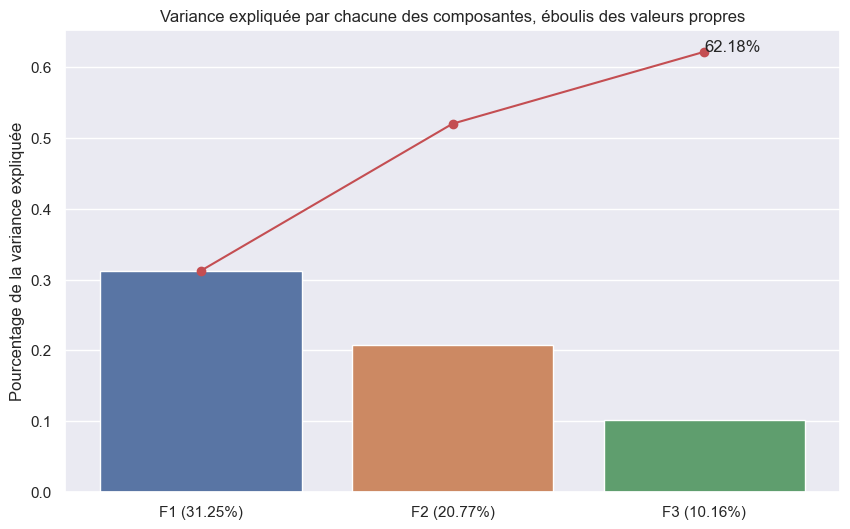

In [888]:
eboulis_valeurs_propres(pca)

#### Représentation des composantes principales

In [889]:
def df_composantes(pca, col_gardees):
    df_composante = pd.DataFrame(data=pca.components_, index=['F1', 'F2', 'F3'], columns=col_gardees).T
    return df_composante

In [890]:
df_composante = df_composantes(pca, kmo_col)
df_composante

F1    F2    F3
stabilite_politique                       0.12 -0.41  0.07
taux_population_urbaine                   0.25 -0.20  0.09
quantite_conteneurs_par_annee             0.32  0.07  0.15
lpi                                       0.34 -0.22  0.06
taux_droit_douane                        -0.23  0.20  0.19
pib                                       0.35  0.09  0.11
cout_production_volaille                 -0.16 -0.05  0.39
population                                0.19  0.42  0.07
pib_par_habitant                          0.22 -0.31  0.26
proportion_animaux_nourriture             0.15 -0.21  0.34
taux_autosuffisance                       0.18  0.02 -0.52
production                                0.31  0.27 -0.06
volaille_consommée                        0.30  0.29  0.06
taux_accroissement_population_moyen      -0.13  0.19  0.42
importation_volaille                      0.30  0.07  0.19
accroissement_population_moyen_par_annee  0.03  0.41  0.12
exportation_volaille                      0.26 -0.04 -0.27

#### Composante principale par variable

In [891]:
def composante_principale_par_variable(df_composante):
    
    # on copie df_composante et on sort les variables
    df_composante2 = df_composante.reset_index()
    df_composante2.rename(columns={'index':'variable'}, inplace=True)

    # on pivote les 3 composantes sur une colonne
    melt = pd.melt(df_composante2, id_vars='variable', value_vars=['F1','F2','F3'], var_name = 'composantes',
            value_name='correlation')

    # valeur absolu correlation
    melt['correlation_abs'] = melt['correlation'].abs()

    # window function pour avoir le rang de chaque composante
    melt['rank'] = melt.groupby(['variable'])['correlation_abs'].rank(ascending=False)

    cp_var = melt[melt['rank']==1][['variable', 'composantes', 'correlation']].reset_index(drop=True)
    
    return cp_var

In [892]:
cp_var = composante_principale_par_variable(df_composante)
cp_var

variable composantes  correlation
0                    taux_population_urbaine          F1         0.25
1              quantite_conteneurs_par_annee          F1         0.32
2                                        lpi          F1         0.34
3                          taux_droit_douane          F1        -0.23
4                                        pib          F1         0.35
5                                 production          F1         0.31
6                         volaille_consommée          F1         0.30
7                       importation_volaille          F1         0.30
8                        stabilite_politique          F2        -0.41
9                                 population          F2         0.42
10                          pib_par_habitant          F2        -0.31
11  accroissement_population_moyen_par_annee          F2         0.41
12                  cout_production_volaille          F3         0.39
13             proportion_animaux_nourriture          F3         0.34
14                       taux_autosuffisance          F3        -0.52
15       taux_accroissement_population_moyen          F3         0.42
16                      exportation_volaille          F3        -0.27

#### Analyse du sens des composantes principales

F1 : 
- Associé à la taille du pays, à la richesse globale et au flux économique global.
- On l'associe globalement à la **Puissance économique**.


F2 : 
- Associé à la pauvreté, au non développement urbain et logistique du pays et à la non stabilité politique.
- On l'associe globalement à la **Qualité de vie des individus**.


F3 : 
- Associé à la présence viande dans la nourriture, à la non auto-suffisance et cout de production assez élevé de la volaille
- On l'associe globalement à **Condition de marché et demande en volaille**.


### KMeans

#### Projection des individus sur le plan factoriel

In [893]:
def projection_individus(pca, X_scaled, pays):
    
    # représenation des individus sur le plan factoriel
    X_projected = pca.transform(X_scaled)

    df_projection = pd.DataFrame(data=X_projected, columns=['F1', 'F2', 'F3'], index=pays)
    
    return df_projection, X_projected

In [894]:
df_projection, X_projected = projection_individus(pca, X_scaled, pays)

#### Méthode du coude avec standardisation

In [895]:
def nombre_clusters_kmeans(X_scaled):
    
    # méthode du coude pour déterminer le nombre de clusters le plus pertinents
    warnings.simplefilter('ignore')
    from sklearn.cluster import KMeans

    liste_clusters = []

    for n in range(1,30):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X_scaled)
        liste_clusters.append(kmeans.inertia_)

    plt.plot(range(1,30), liste_clusters)
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Inertie')

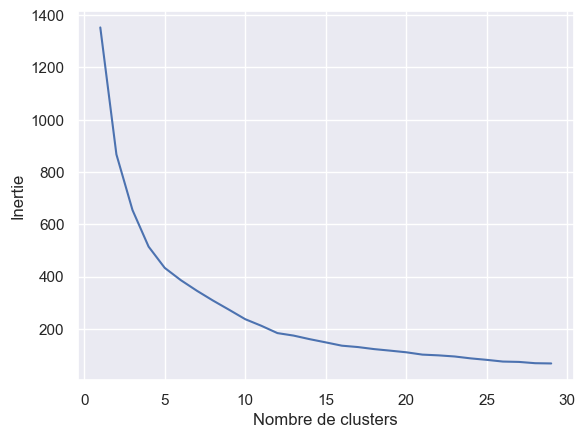

In [896]:
nombre_clusters_kmeans(X_projected)

In [897]:
def KMeans(X_scaled, n_clusters=4):
    
    # création de l'estimateur
    from sklearn.cluster import KMeans
    
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_scaled)

    # coordonnées des centroides

    centroides = kmeans.cluster_centers_

    # clusters de l'echantillon

    clusters_kmeans = kmeans.labels_
    
    # ajout clusters au df de base de l'itération
    
    df['clusters_kmeans']=clusters_kmeans
    
    return kmeans, centroides, clusters_kmeans

In [898]:
kmeans, centroides, clusters_kmeans = KMeans(X_projected, n_clusters=4)

### Cercle des corrélation

In [899]:
def correlation_graph(pca, x_y, features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(20, 18))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # # Affichage du titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

### Représentation des individus sur le plan factoriel

In [900]:
def display_factorial_planes(X_projected, x_y, pca=None, labels=None, clusters=None,
                                centroides=None, alpha=1, figsize=[10,8], marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')
    
    # On vérifie s'il y a des centroides ou non
    if centroides is None : 
        centroides = []
    if len(centroides) :   
    # visualisation des centroides sous forme de croix rouge
        plt.scatter(centroides[:,x], centroides[:,y], c='r', marker='x', s=100)

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

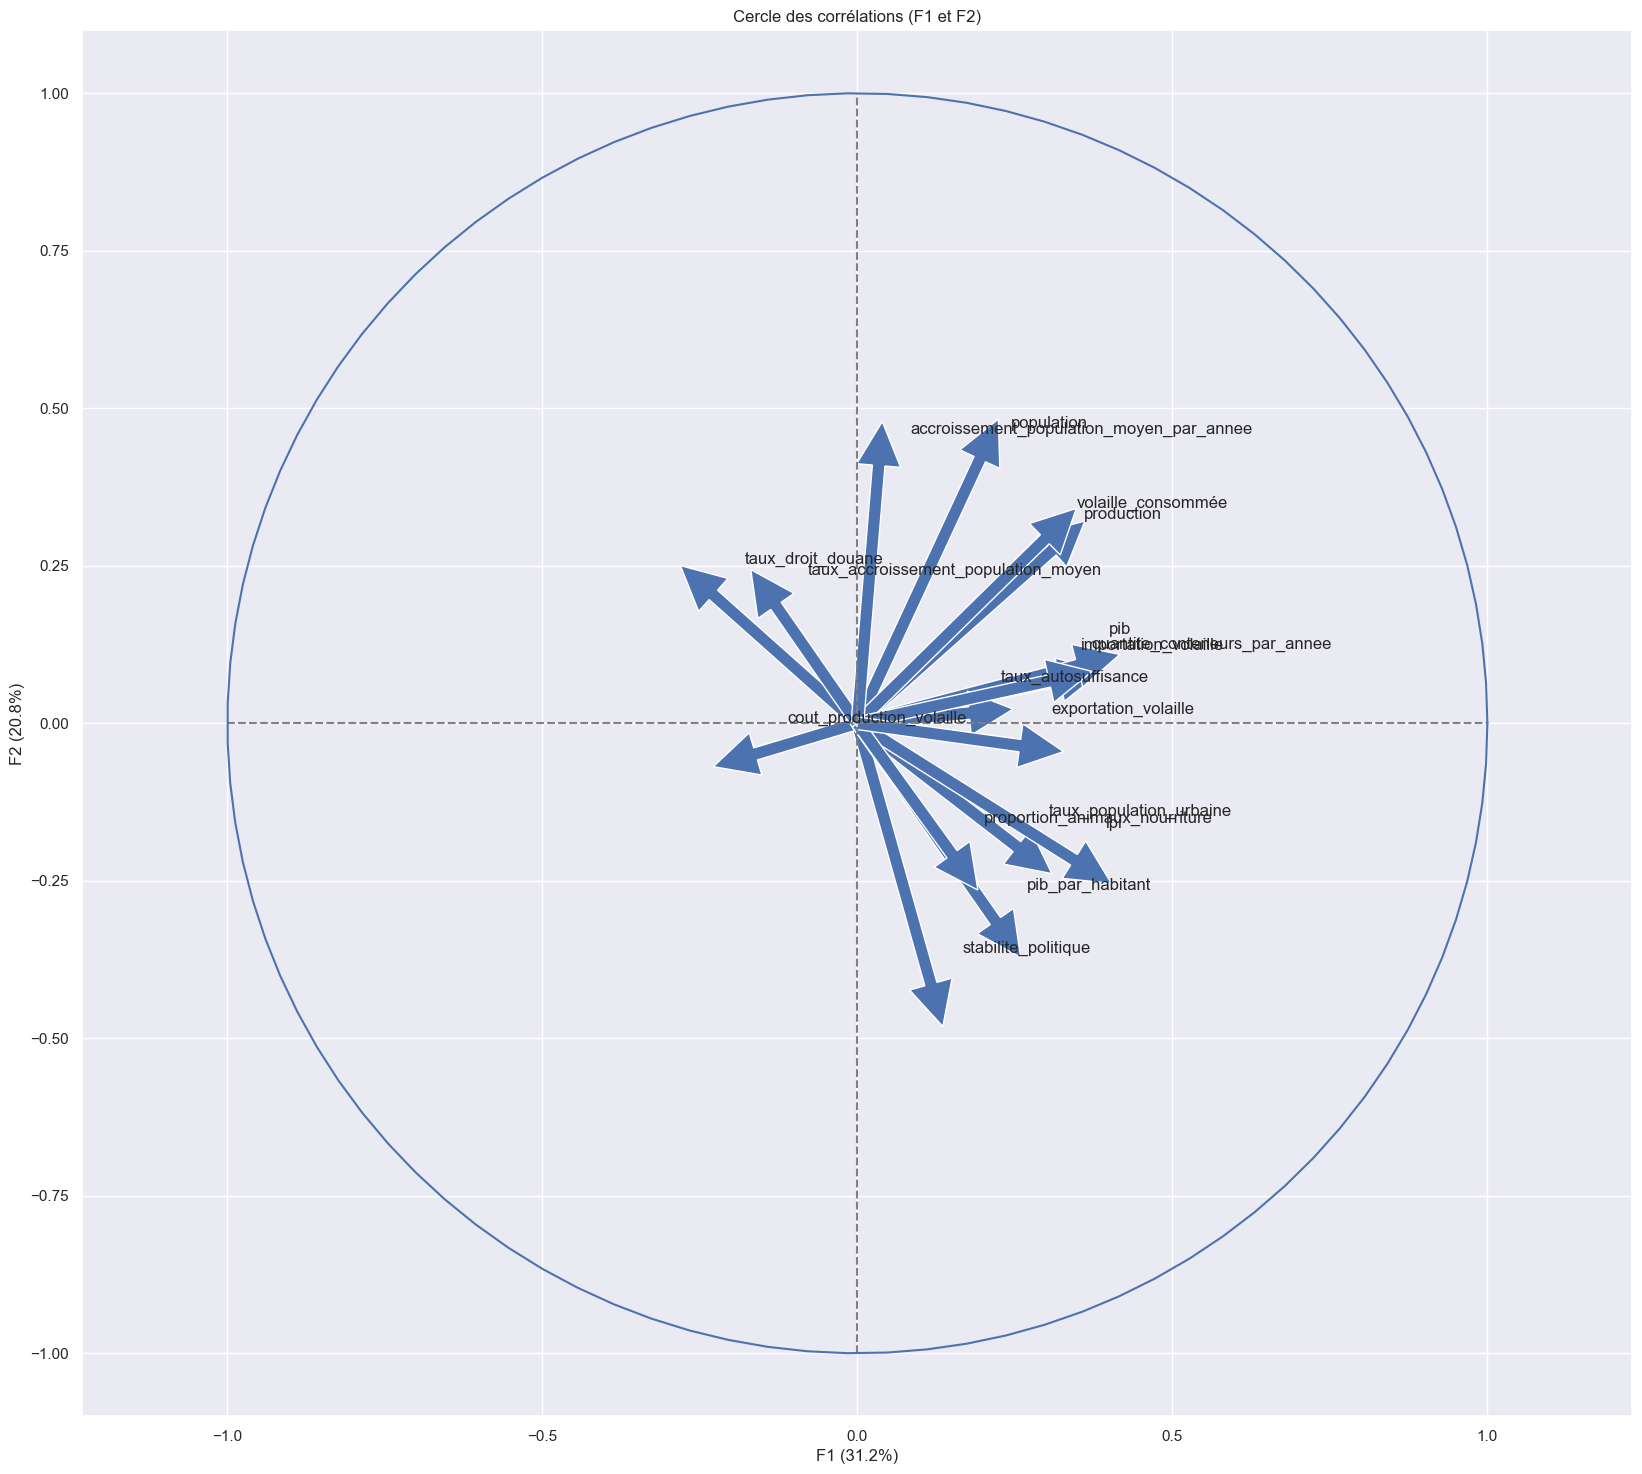

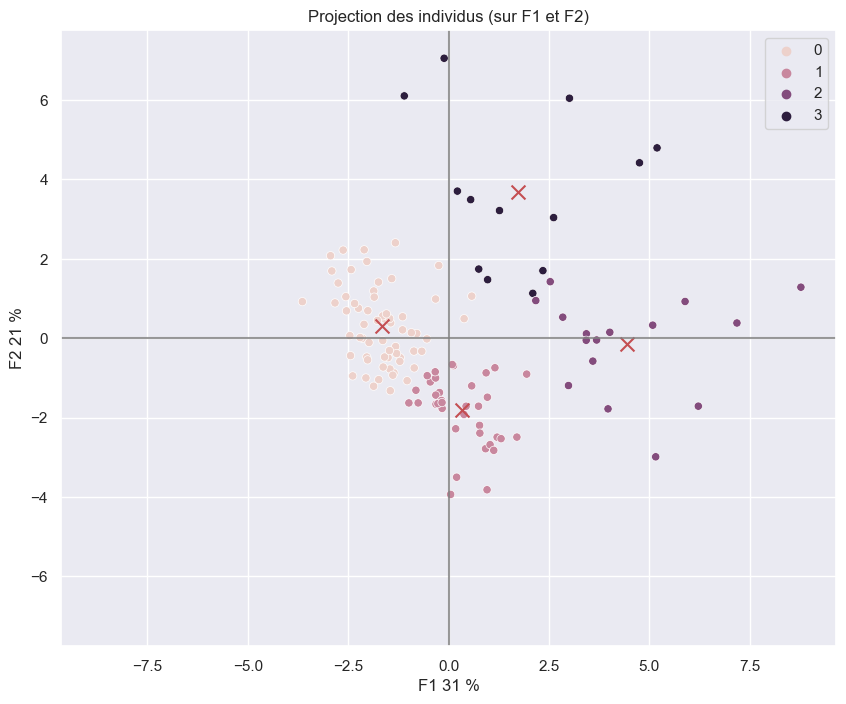

In [901]:
correlation_graph(pca, x_y=(0,1), features=kmo_col)

display_factorial_planes(X_projected, x_y=(0,1), pca=pca, labels=None, clusters=clusters_kmeans,
                                centroides=centroides, alpha=1, figsize=[10,8], marker="." )

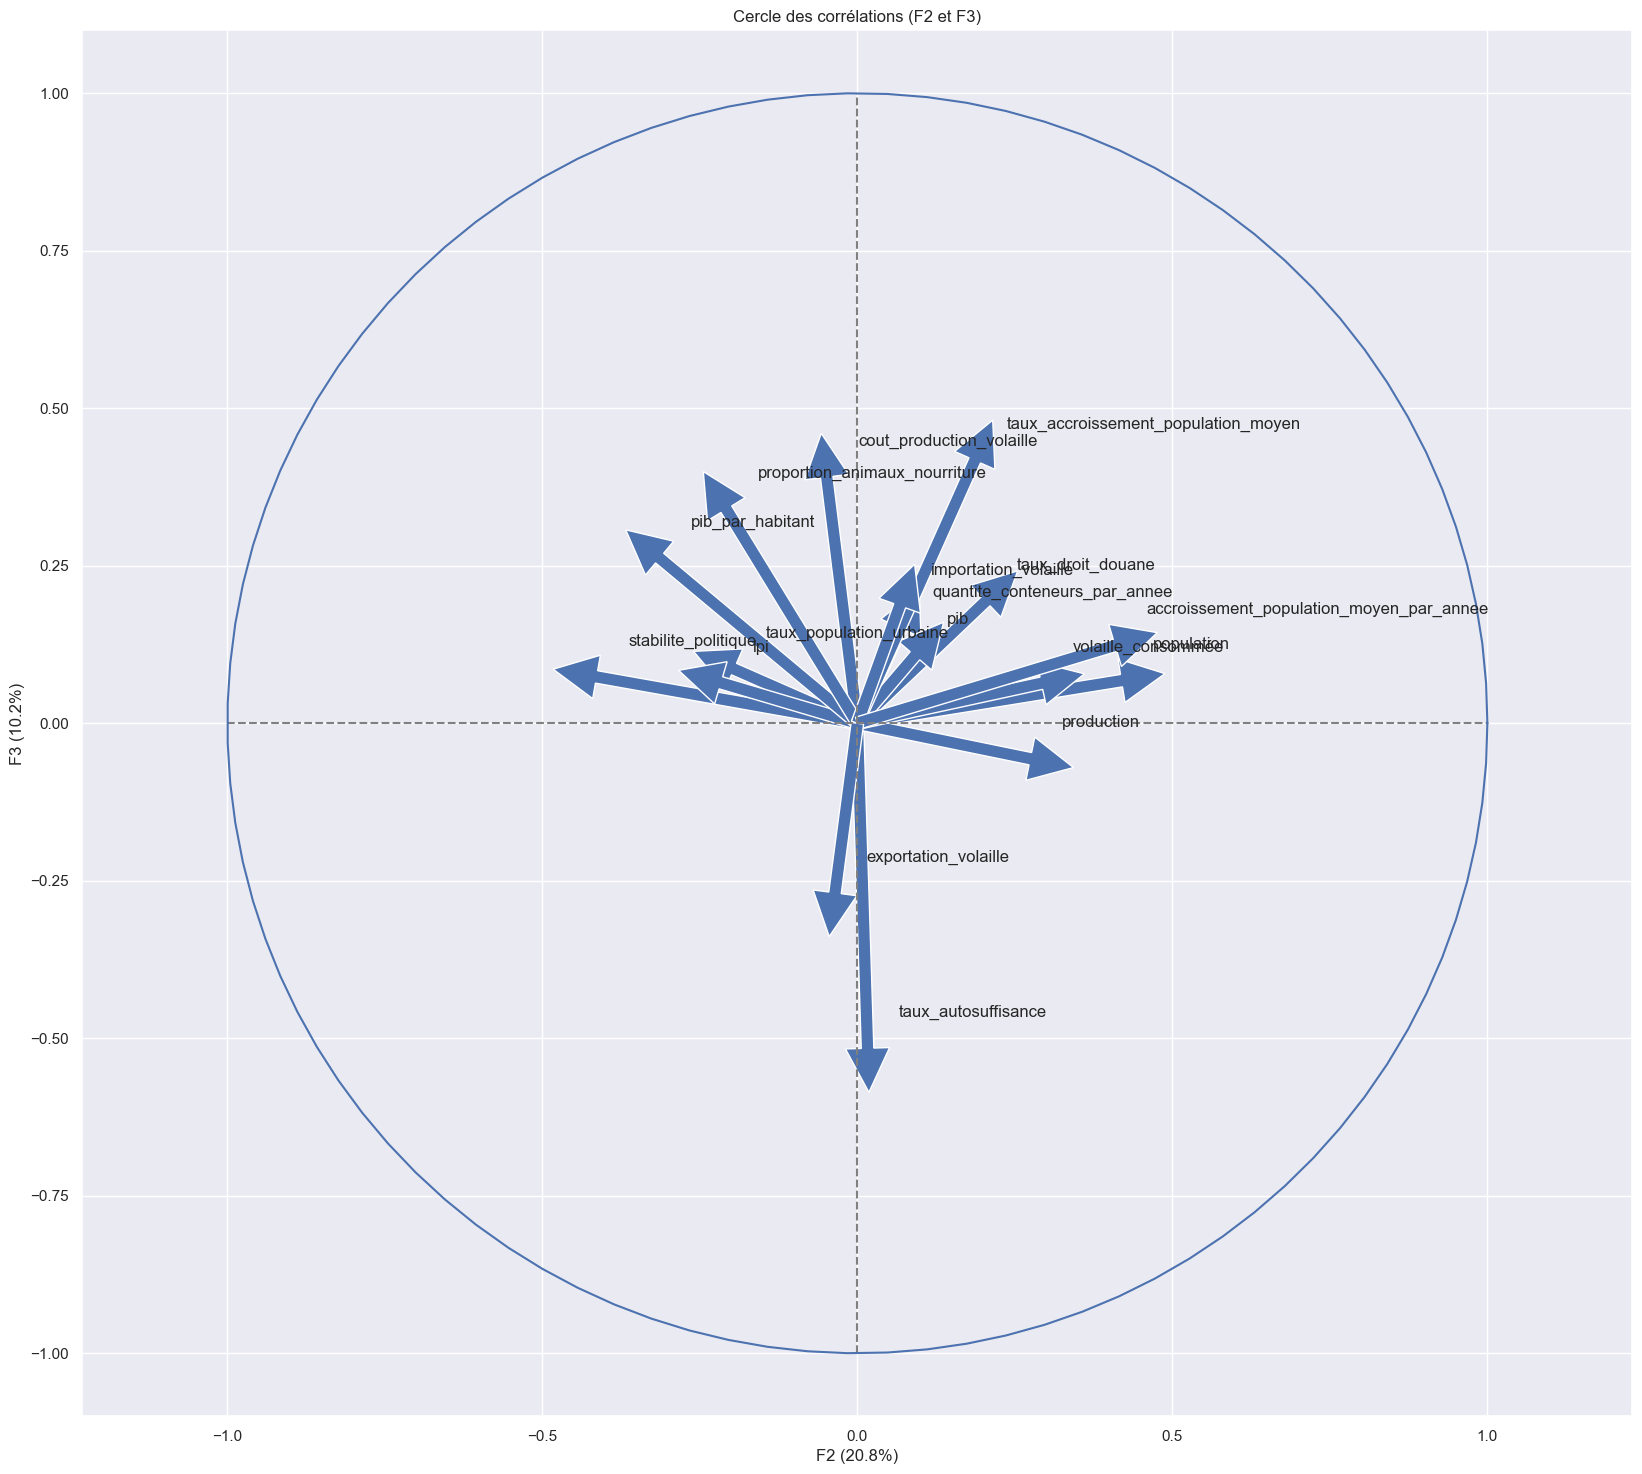

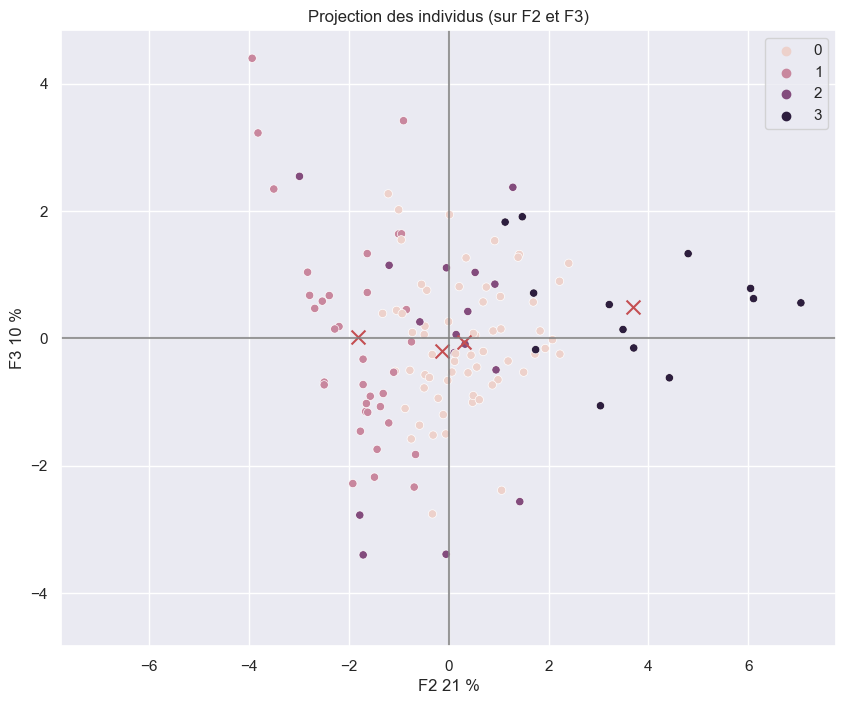

In [902]:
correlation_graph(pca, x_y=(1,2), features=kmo_col)

display_factorial_planes(X_projected, x_y=(1,2), pca=pca, labels=None, clusters=clusters_kmeans,
                                centroides=centroides, alpha=1, figsize=[10,8], marker="." )

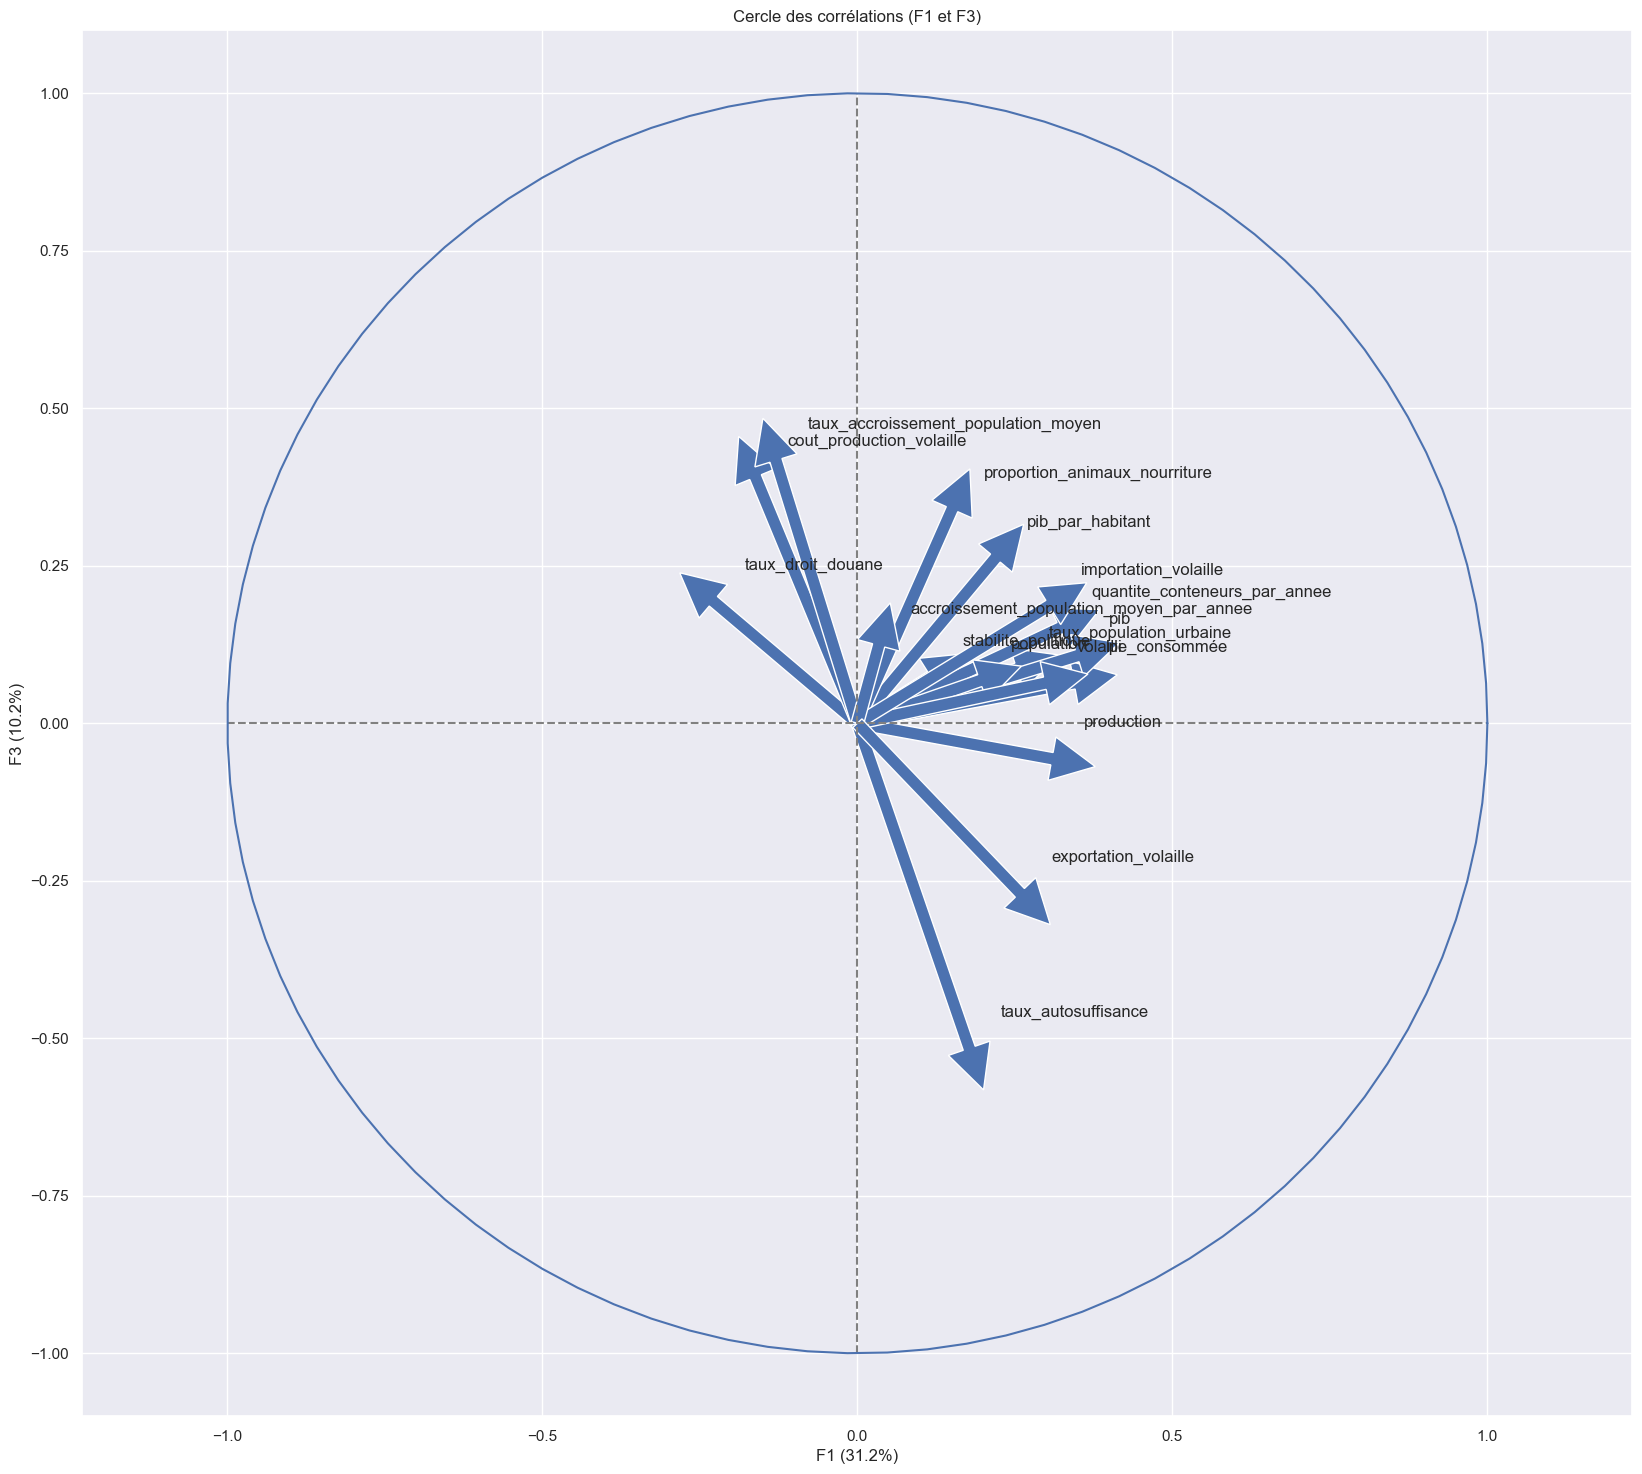

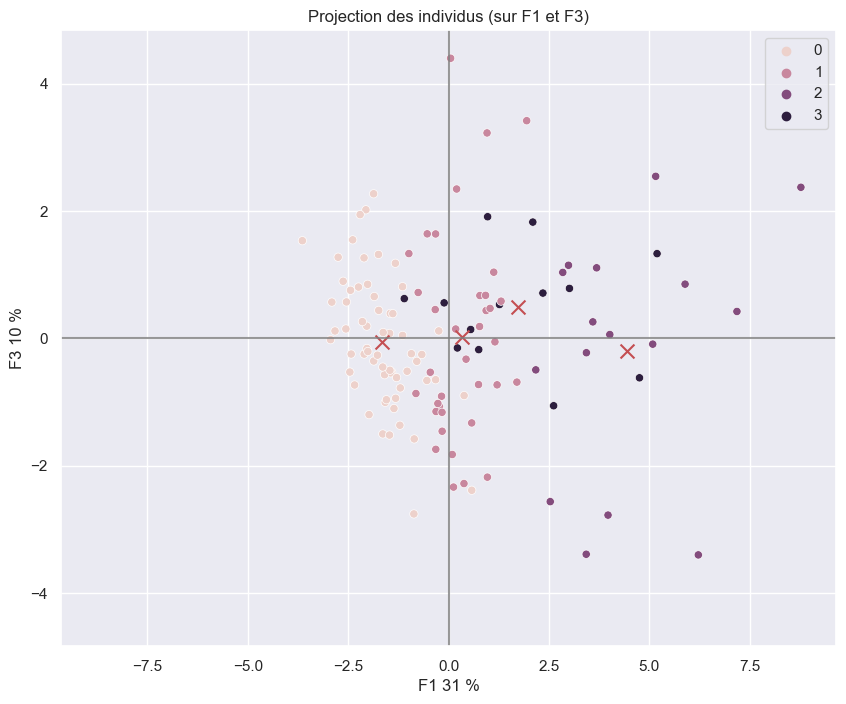

In [903]:
correlation_graph(pca, x_y=(0,2), features=kmo_col)

display_factorial_planes(X_projected, x_y=(0,2), pca=pca, labels=None, clusters=clusters_kmeans,
                                centroides=centroides, alpha=1, figsize=[10,8], marker="." )

### Visualisation 3D

In [904]:
def representation_3d(X_projected, pays, clusters_kmeans):
    
    title = "Représentation des pays en fonction des 3 composantes principales avec clusters"

    fig = px.scatter_3d(x=X_projected[:,0], y=X_projected[:,1], z=X_projected[:, 2], hover_name=pays,
                  color=clusters_kmeans, title=title, labels={'x':'F1', 'y':'F2', 'z':'F3'})
    fig.show()

In [905]:
representation_3d(X_projected, pays, clusters_kmeans)

In [906]:
def representation_3d_centroide(X_projected, clusters_kmeans):
    
    title = "Représentation des centroides des clusters des pays"

    fig = px.scatter_3d(x=centroides[:,0], y=centroides[:,1], z=centroides[:, 2],
                  color=np.unique(clusters_kmeans), title=title, labels={'x':'F1', 'y':'F2', 'z':'F3'})
    fig.show()

In [907]:
representation_3d_centroide(X_projected, clusters_kmeans)

# 2ème itération

Pour cette 2e itération, je vais supprimer les points abberants et j'améliorerai le KMO en supprimant les variables peu corrélées.

### Suppression des valeurs abberantes

In [908]:
df = df_knn

In [909]:
# on enlève les outliers
outliers = df[df['pays'].isin(['Chine, continentale', 'Brésil', 'Inde', "États-Unis d'Amérique"])]
df = df.drop(outliers.index).reset_index(drop=True)
df.head()

pays  exportation_volaille  importation_volaille  production  \
0  Afrique du Sud                 63.00            514,000.00    1,667.00   
1         Albanie                  0.00             38,000.00       13.00   
2         Algérie                  0.00              2,000.00      275.00   
3       Allemagne                646.00            842,000.00    1,514.00   
4          Angola                  0.00            277,000.00       42.00   

   volaille_consommée  taux_dependance  taux_autosuffisance  \
0        2,035,000.00             0.24                 0.79   
1           47,000.00             0.81                 0.28   
2          264,000.00             0.01                 0.99   
3        1,609,000.00             0.48                 0.87   
4          315,000.00             0.87                 0.13   

   proportion_volaille_nourriture  proportion_animaux_nourriture  \
0                            0.06                           0.12   
1                            0.01                           0.05   
2                            0.01                           0.03   
3                            0.02                           0.10   
4                            0.02                           0.07   

     population  accroissement_population_moyen_par_annee  \
0 57,009,756.00                                674,990.00   
1  2,884,169.00                                -12,973.84   
2 41,389,189.00                                588,745.95   
3 82,658,409.00                                 90,712.42   
4 29,816,766.00                                758,648.11   

   taux_accroissement_population_moyen  lpi                  pib  \
0                                 0.01 3.57   381,448,814,653.46   
1                                -0.00 2.56    13,019,689,336.69   
2                                 0.01 2.52   170,097,014,589.13   
3                                 0.00 4.13 3,690,849,152,517.65   
4                                 0.03 2.24    68,972,769,395.63   

   taux_droit_douane  quantite_conteneurs_par_annee  cout_production_volaille  \
0               4.44                   4,563,618.00                  2,016.60   
1               1.43                     118,270.00                  2,072.14   
2               9.28                   1,725,238.00                  2,180.70   
3               1.81                  15,169,595.00                  1,459.50   
4               8.52                     570,200.00                  2,176.24   

   taux_population_urbaine  stabilite_politique  pib_par_habitant  
0                     0.66                -0.28          6,690.94  
1                     0.60                 0.38          4,514.19  
2                     0.72                -0.92          4,109.70  
3                     0.77                 0.59         44,651.83  
4                     0.65                -0.33          2,313.22

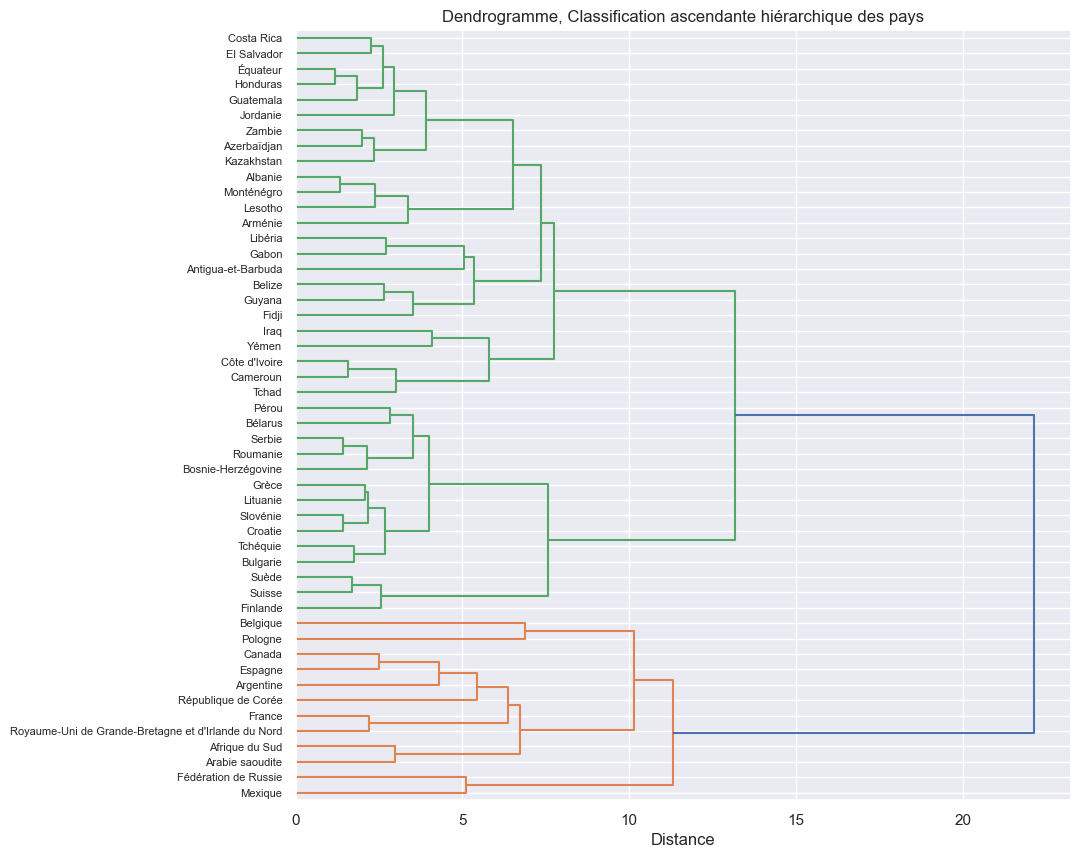

In [910]:
# la fonction créé 3 objets à partir d'un df de base
df_X_scaled, X_scaled, X, pays, variables = preparation_df(df)


dendrogramme(df_X_scaled, figsize=(10,10))

On dicerne 4 à 5 clusters.

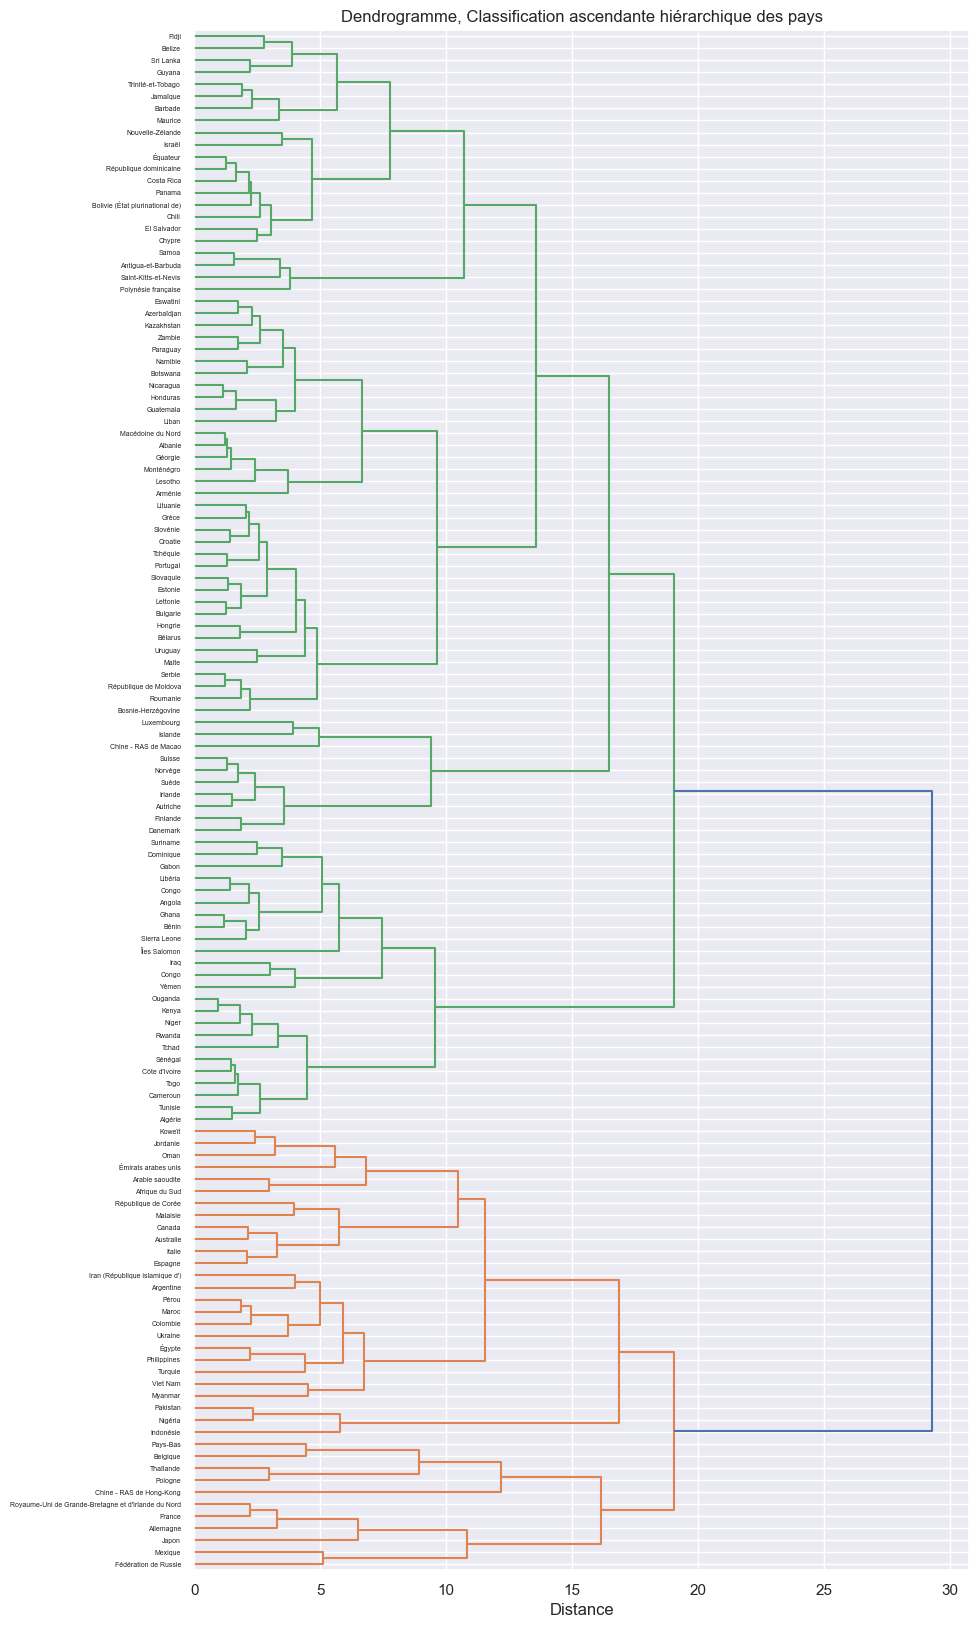

In [911]:
# Dendogramme global

Z = linkage(X_scaled, 'ward')


# création du dendogramme
plt.figure(figsize=(10,20))
dendrogram(Z, p=X_scaled.shape[0], truncate_mode='lastp', distance_sort='ascending',
           orientation='right', labels=pays)
plt.title("Dendrogramme, Classification ascendante hiérarchique des pays")
plt.xlabel('Distance')
plt.show();

In [912]:
# renvoie l'estimateur de la classification hiérarchique et les clusters
cah, clusters_cah = classification_hierarchique(X_scaled, n_clusters=4)

In [913]:
# renvoie la valeur du kmo et du test de sphérité de bartlett
KMO(X)

Le KMO est de 0.6339454032726262
La p-value du test de sphérité de bartlett est de 0.0


0.6339454032726262

On a de base un bien meilleur KMO en retirant les outliers.

Nous allons essayer de l'améliorer.

In [914]:
# variable avec leur kmo
kmo_variable = KMO_variable(X)
kmo_variable

KMO
stabilite_politique                      0.88
taux_population_urbaine                  0.81
quantite_conteneurs_par_annee            0.79
lpi                                      0.77
taux_droit_douane                        0.74
pib                                      0.66
cout_production_volaille                 0.65
population                               0.63
pib_par_habitant                         0.63
proportion_animaux_nourriture            0.62
taux_autosuffisance                      0.61
production                               0.59
volaille_consommée                       0.58
taux_accroissement_population_moyen      0.56
importation_volaille                     0.54
accroissement_population_moyen_par_annee 0.52
exportation_volaille                     0.52
proportion_volaille_nourriture           0.50
taux_dependance                          0.48

In [915]:
kmo_col, kmo_ameliore_1, kmo_variable_ameliore_1 = amelioration_KMO_avec_KMO_variables(kmo_variable, val_kmo=0.55)
kmo_col, kmo_ameliore_1, kmo_variable_ameliore_1

(array(['stabilite_politique', 'taux_population_urbaine',
        'quantite_conteneurs_par_annee', 'lpi', 'taux_droit_douane', 'pib',
        'cout_production_volaille', 'population', 'pib_par_habitant',
        'proportion_animaux_nourriture', 'taux_autosuffisance',
        'production', 'volaille_consommée',
        'taux_accroissement_population_moyen'], dtype=object),
 0.7181206516108409,
                                      KMO
 population                          0.88
 pib                                 0.84
 taux_population_urbaine             0.83
 stabilite_politique                 0.81
 taux_droit_douane                   0.81
 lpi                                 0.74
 quantite_conteneurs_par_annee       0.69
 production                          0.68
 volaille_consommée                  0.68
 pib_par_habitant                    0.63
 proportion_animaux_nourriture       0.62
 cout_production_volaille            0.62
 taux_accroissement_population_moyen 0.60
 taux_autosuffis

In [916]:
len(kmo_col)

14

KMO pas amélioré de cette manière.

In [917]:
variables_communalities, kmo_communalities, df_communalities = amelioration_KMO_communalities(X, val_com=0.3)
variables_communalities, kmo_communalities, df_communalities

(array(['exportation_volaille', 'importation_volaille', 'production',
        'volaille_consommée', 'taux_autosuffisance',
        'proportion_volaille_nourriture', 'proportion_animaux_nourriture',
        'population', 'accroissement_population_moyen_par_annee', 'lpi',
        'pib', 'taux_droit_douane', 'quantite_conteneurs_par_annee',
        'taux_population_urbaine', 'stabilite_politique',
        'pib_par_habitant'], dtype=object),
 0.6316439596813906,
                                           communalities
 exportation_volaille                               0.32
 importation_volaille                               0.46
 production                                         0.76
 volaille_consommée                                 0.82
 taux_autosuffisance                                0.27
 proportion_volaille_nourriture                     0.67
 proportion_animaux_nourriture                      0.78
 population                                         0.84
 accroissement_populatio

KMO pas amélioré de cette manière.

In [918]:
col_gardees, kmo_var_corr, nb_col_garder = amelioration_KMO_var_peu_correlees(X)
col_gardees, kmo_var_corr, nb_col_garder

(array(['importation_volaille', 'production', 'volaille_consommée',
        'population', 'accroissement_population_moyen_par_annee', 'lpi',
        'pib', 'quantite_conteneurs_par_annee', 'taux_population_urbaine',
        'stabilite_politique', 'pib_par_habitant'], dtype=object),
 0.6934016626510552,
 11)

In [919]:
    # j'identifie les variables qui sont peu corrélées avec les autres
    cor = X.corr()
    # variable considérés peu corrélées si elles a moins de 3 variables très corrélées
    cor_count = (cor[(cor > 0.5)|(cor < -0.5)].count())
    cor_count_cond = cor_count > 2
    
    # colonne
    col_gardees = cor[cor_count_cond].index.values
    
    nb_col_gardees = len(col_gardees)
    
    # kmo 
    kmo_var_corr = calculate_kmo(X[col_gardees])[1]
    
    col_gardees, kmo_var_corr

(array(['importation_volaille', 'production', 'volaille_consommée',
        'population', 'accroissement_population_moyen_par_annee', 'lpi',
        'pib', 'quantite_conteneurs_par_annee', 'taux_population_urbaine',
        'stabilite_politique', 'pib_par_habitant'], dtype=object),
 0.6934016626510552)

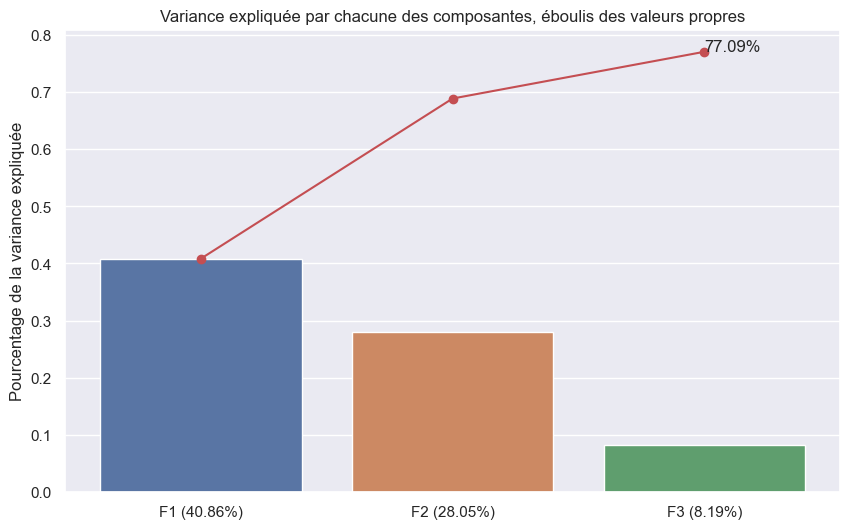

In [920]:
# acp
pca, X_scaled = acp(df_X_scaled, col_gardees)

eboulis_valeurs_propres(pca)

In [921]:
df_composante = df_composantes(pca, col_gardees)
df_composante

F1    F2    F3
importation_volaille                     0.35 -0.05 -0.34
production                               0.38  0.20 -0.19
volaille_consommée                       0.39  0.21 -0.23
population                               0.31  0.37  0.33
accroissement_population_moyen_par_annee 0.14  0.40  0.63
lpi                                      0.31 -0.35  0.28
pib                                      0.40 -0.05 -0.19
quantite_conteneurs_par_annee            0.36 -0.05 -0.06
taux_population_urbaine                  0.23 -0.31  0.08
stabilite_politique                      0.03 -0.47  0.04
pib_par_habitant                         0.18 -0.42  0.41

In [922]:
cp_var = composante_principale_par_variable(df_composante)
cp_var

variable composantes  correlation
0                       importation_volaille          F1         0.35
1                                 production          F1         0.38
2                         volaille_consommée          F1         0.39
3                                        pib          F1         0.40
4              quantite_conteneurs_par_annee          F1         0.36
5                                 population          F2         0.37
6                                        lpi          F2        -0.35
7                    taux_population_urbaine          F2        -0.31
8                        stabilite_politique          F2        -0.47
9                           pib_par_habitant          F2        -0.42
10  accroissement_population_moyen_par_annee          F3         0.63

In [923]:
df_projection, X_projected = projection_individus(pca, X_scaled, pays)

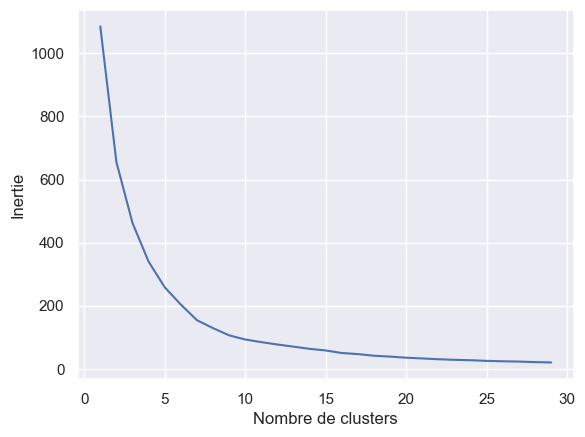

In [924]:
nombre_clusters_kmeans(X_projected)

In [925]:
# kmeans

kmeans, centroides, clusters_kmeans = KMeans(X_projected, n_clusters=7)

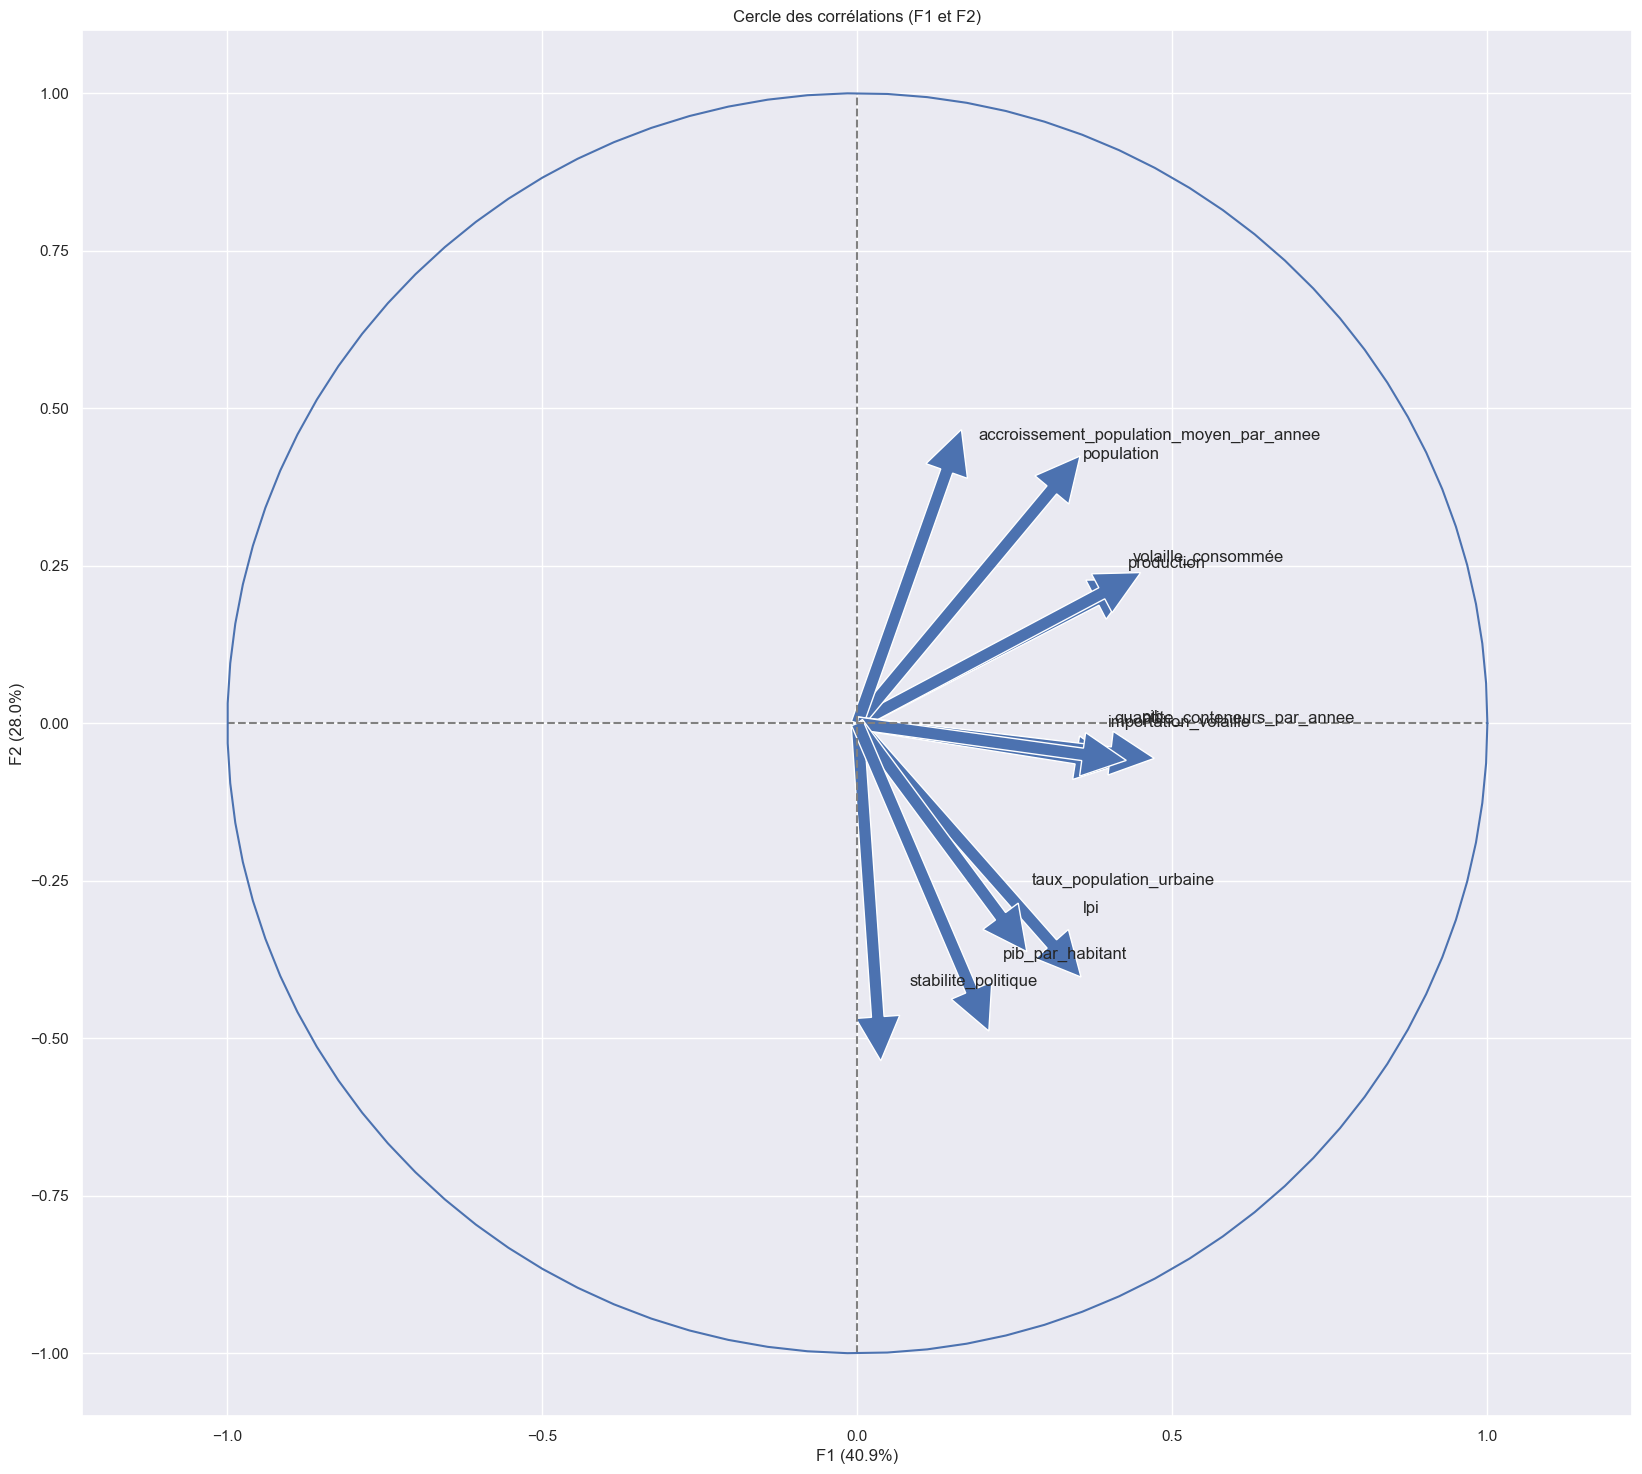

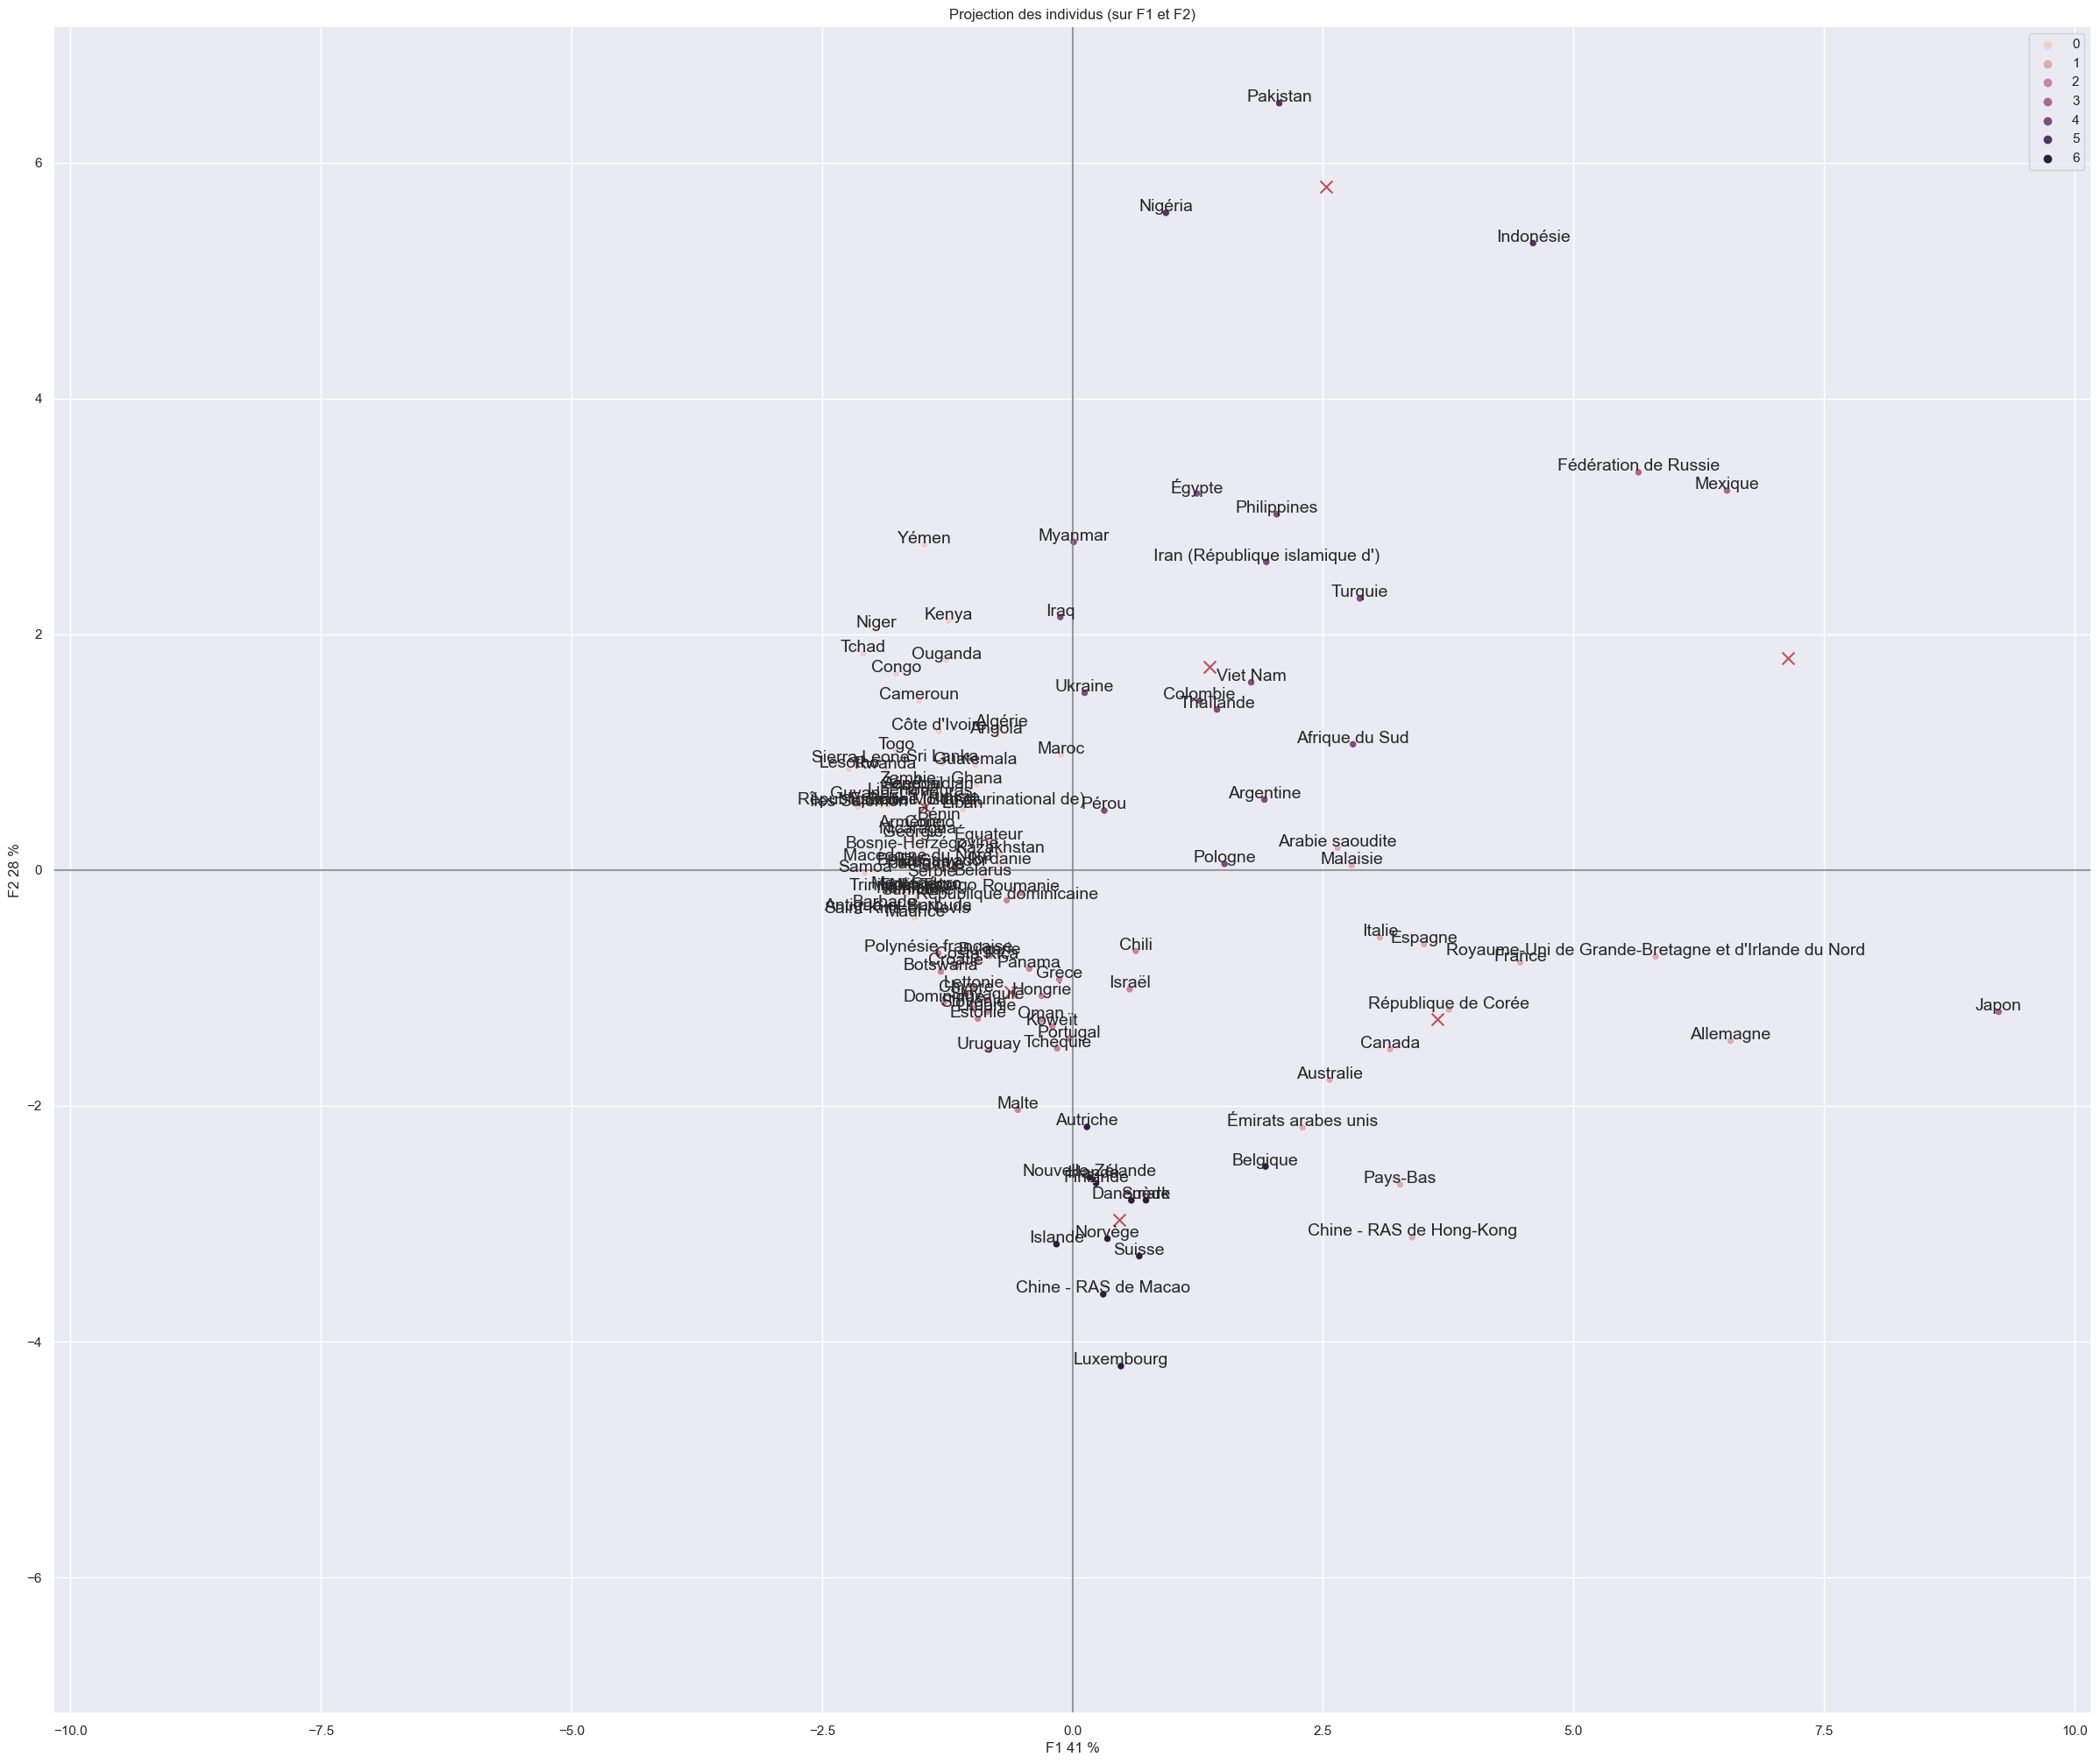

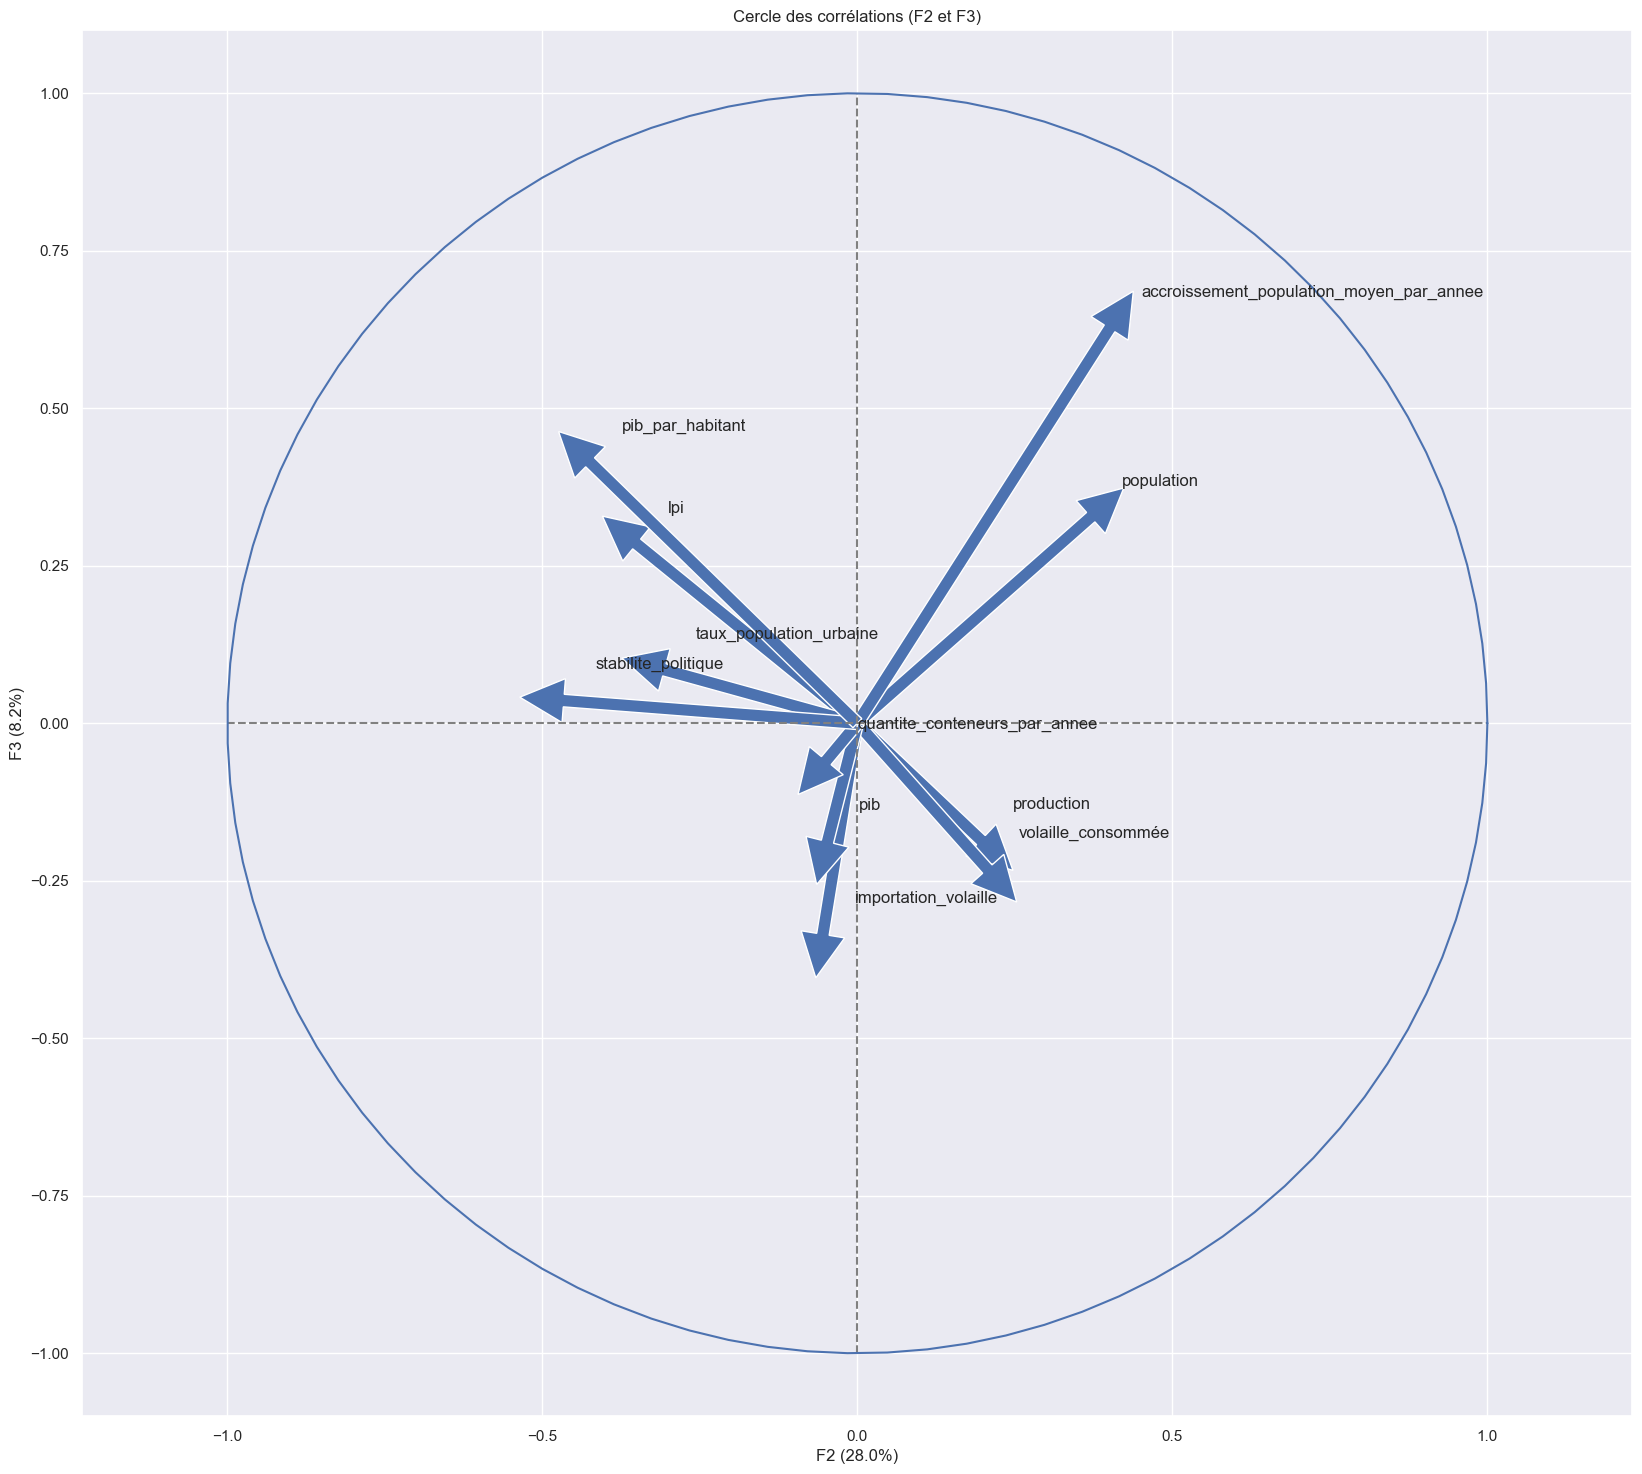

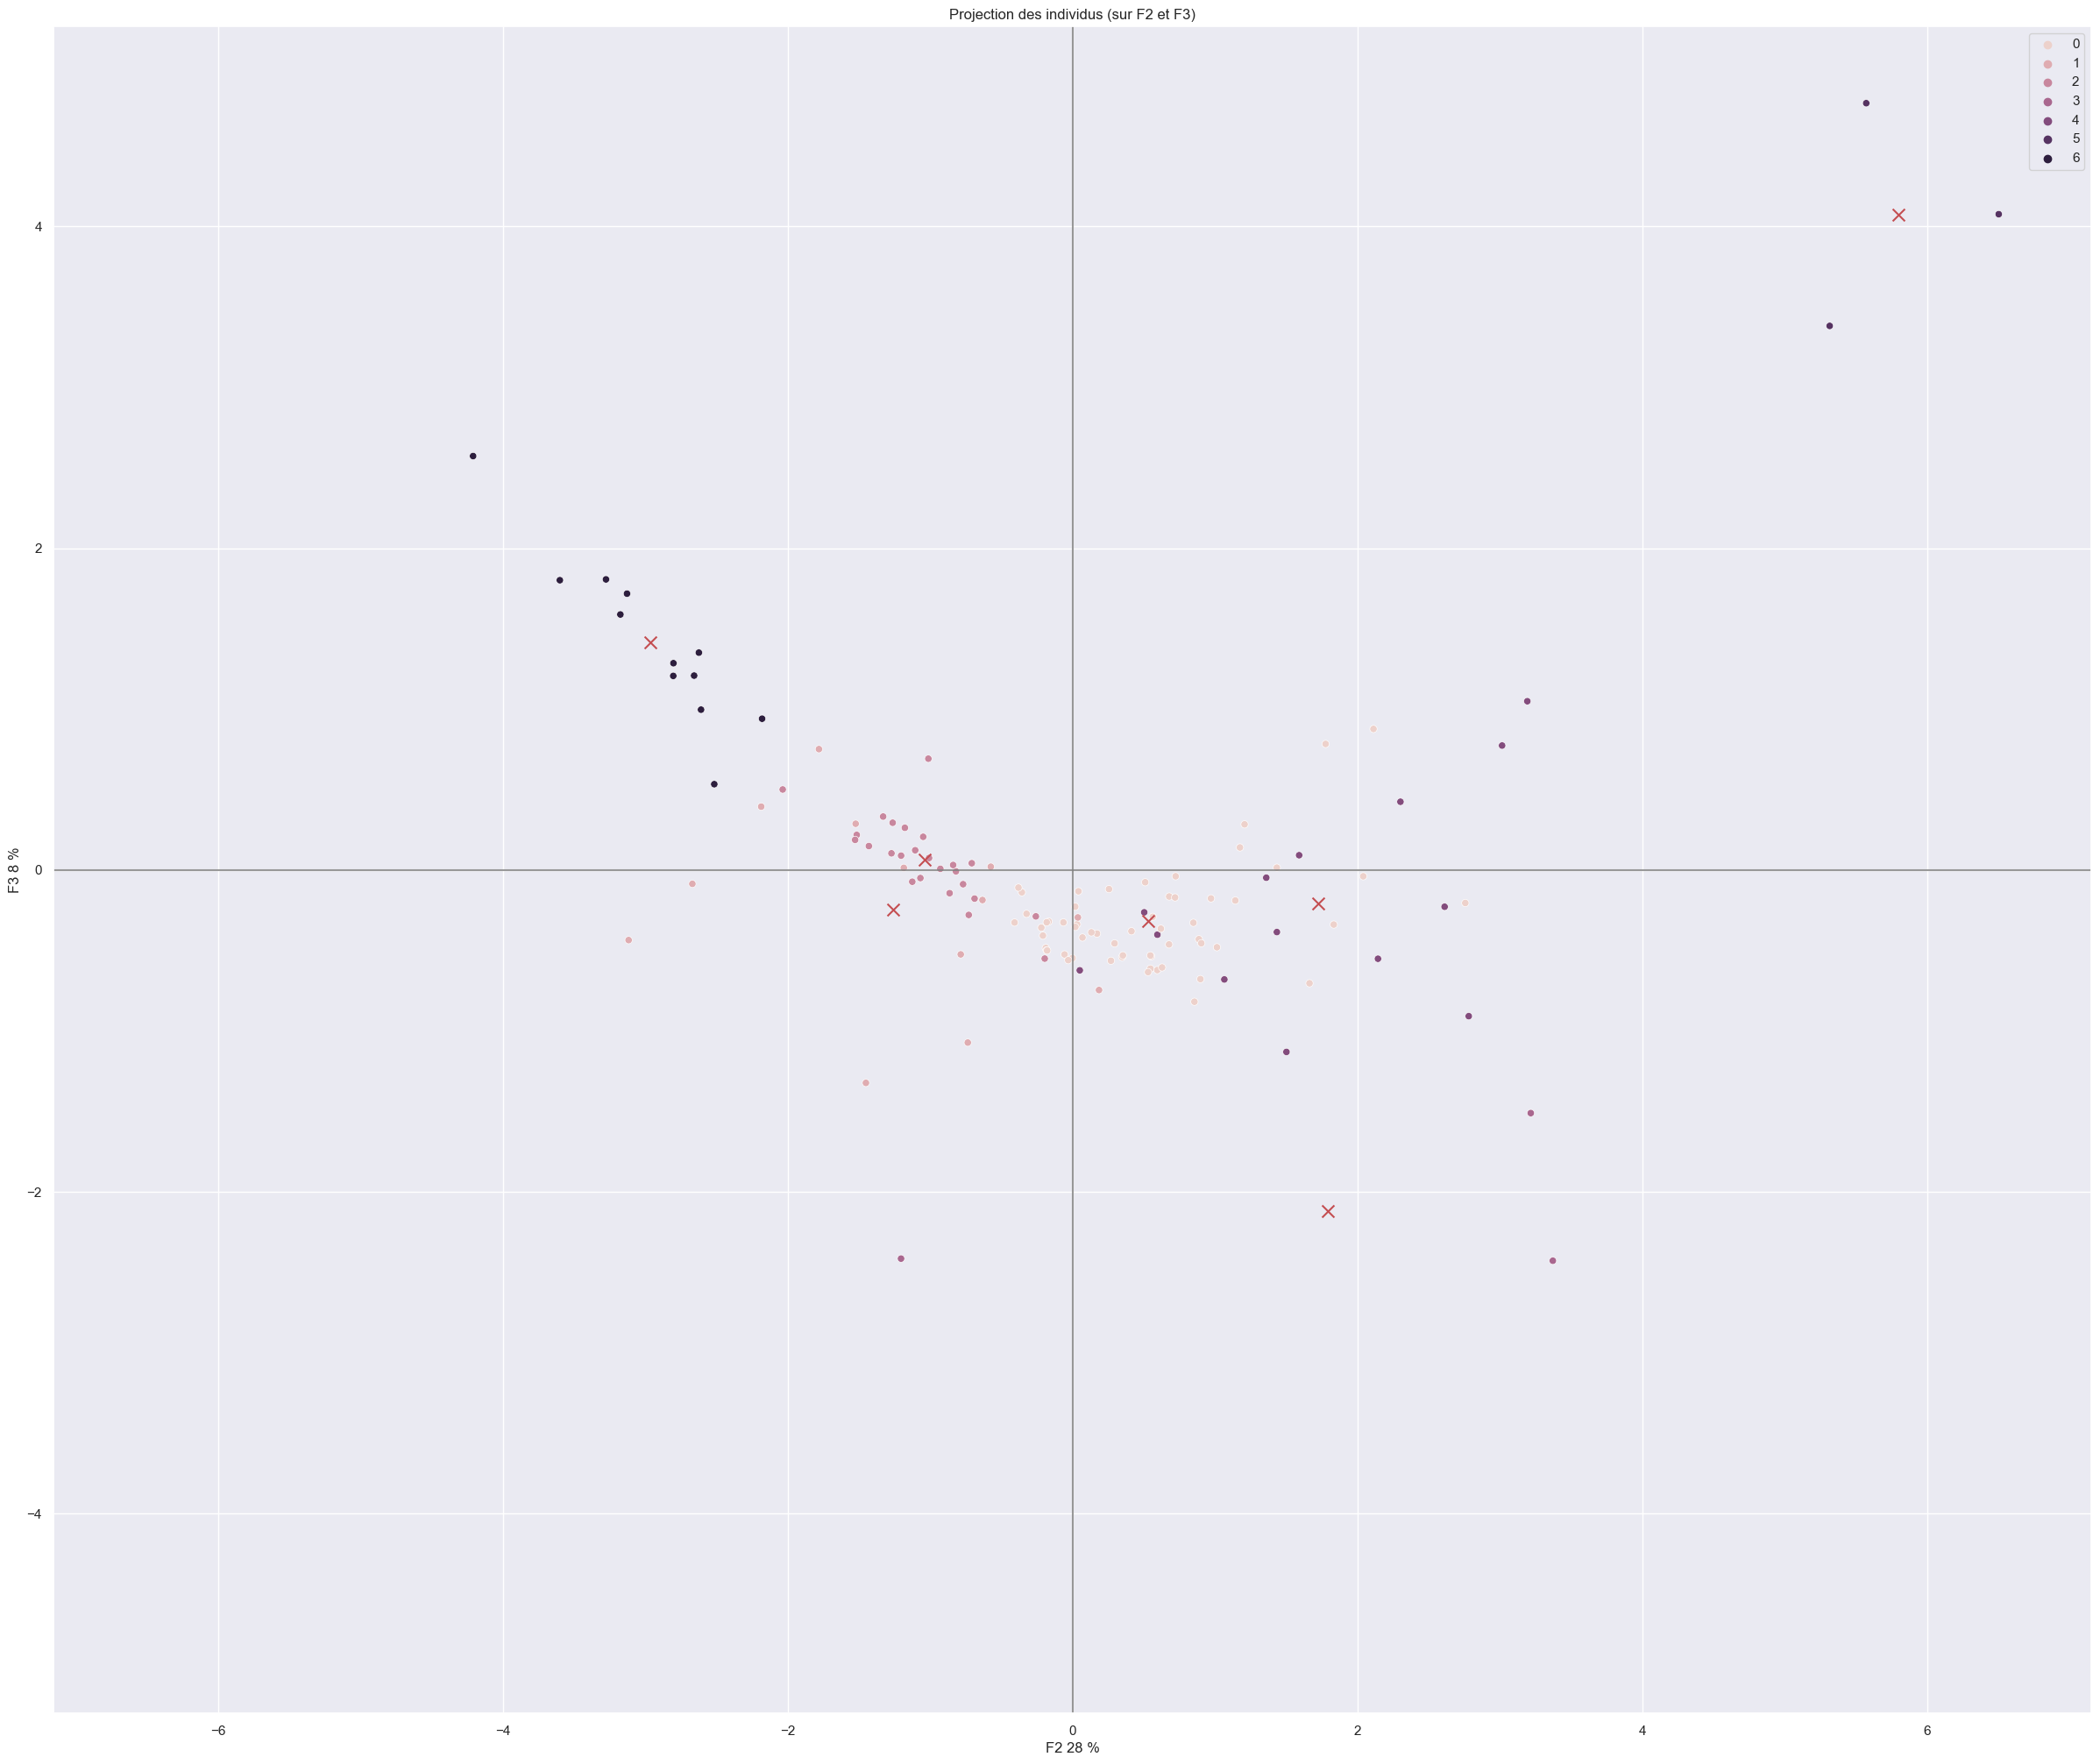

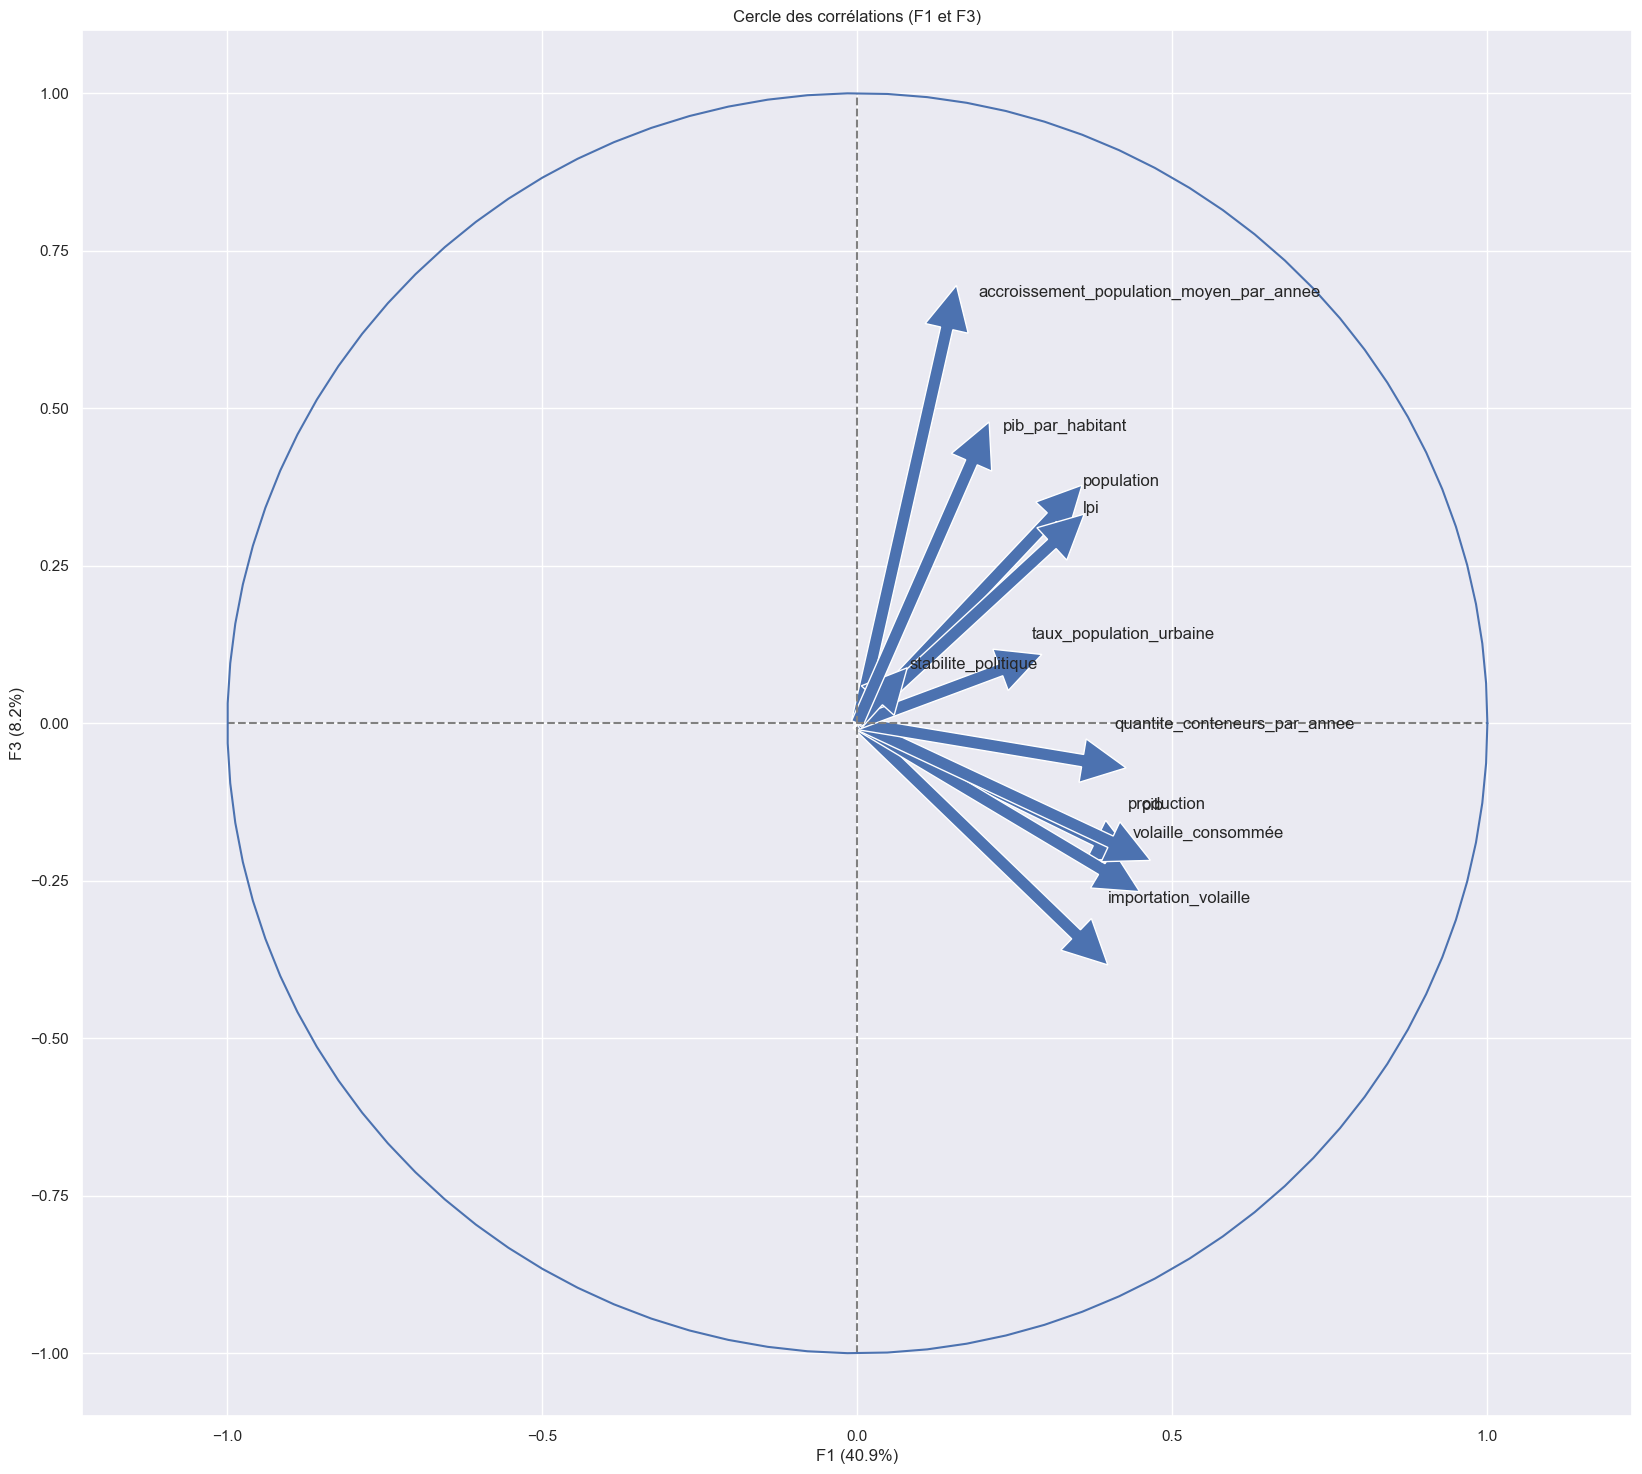

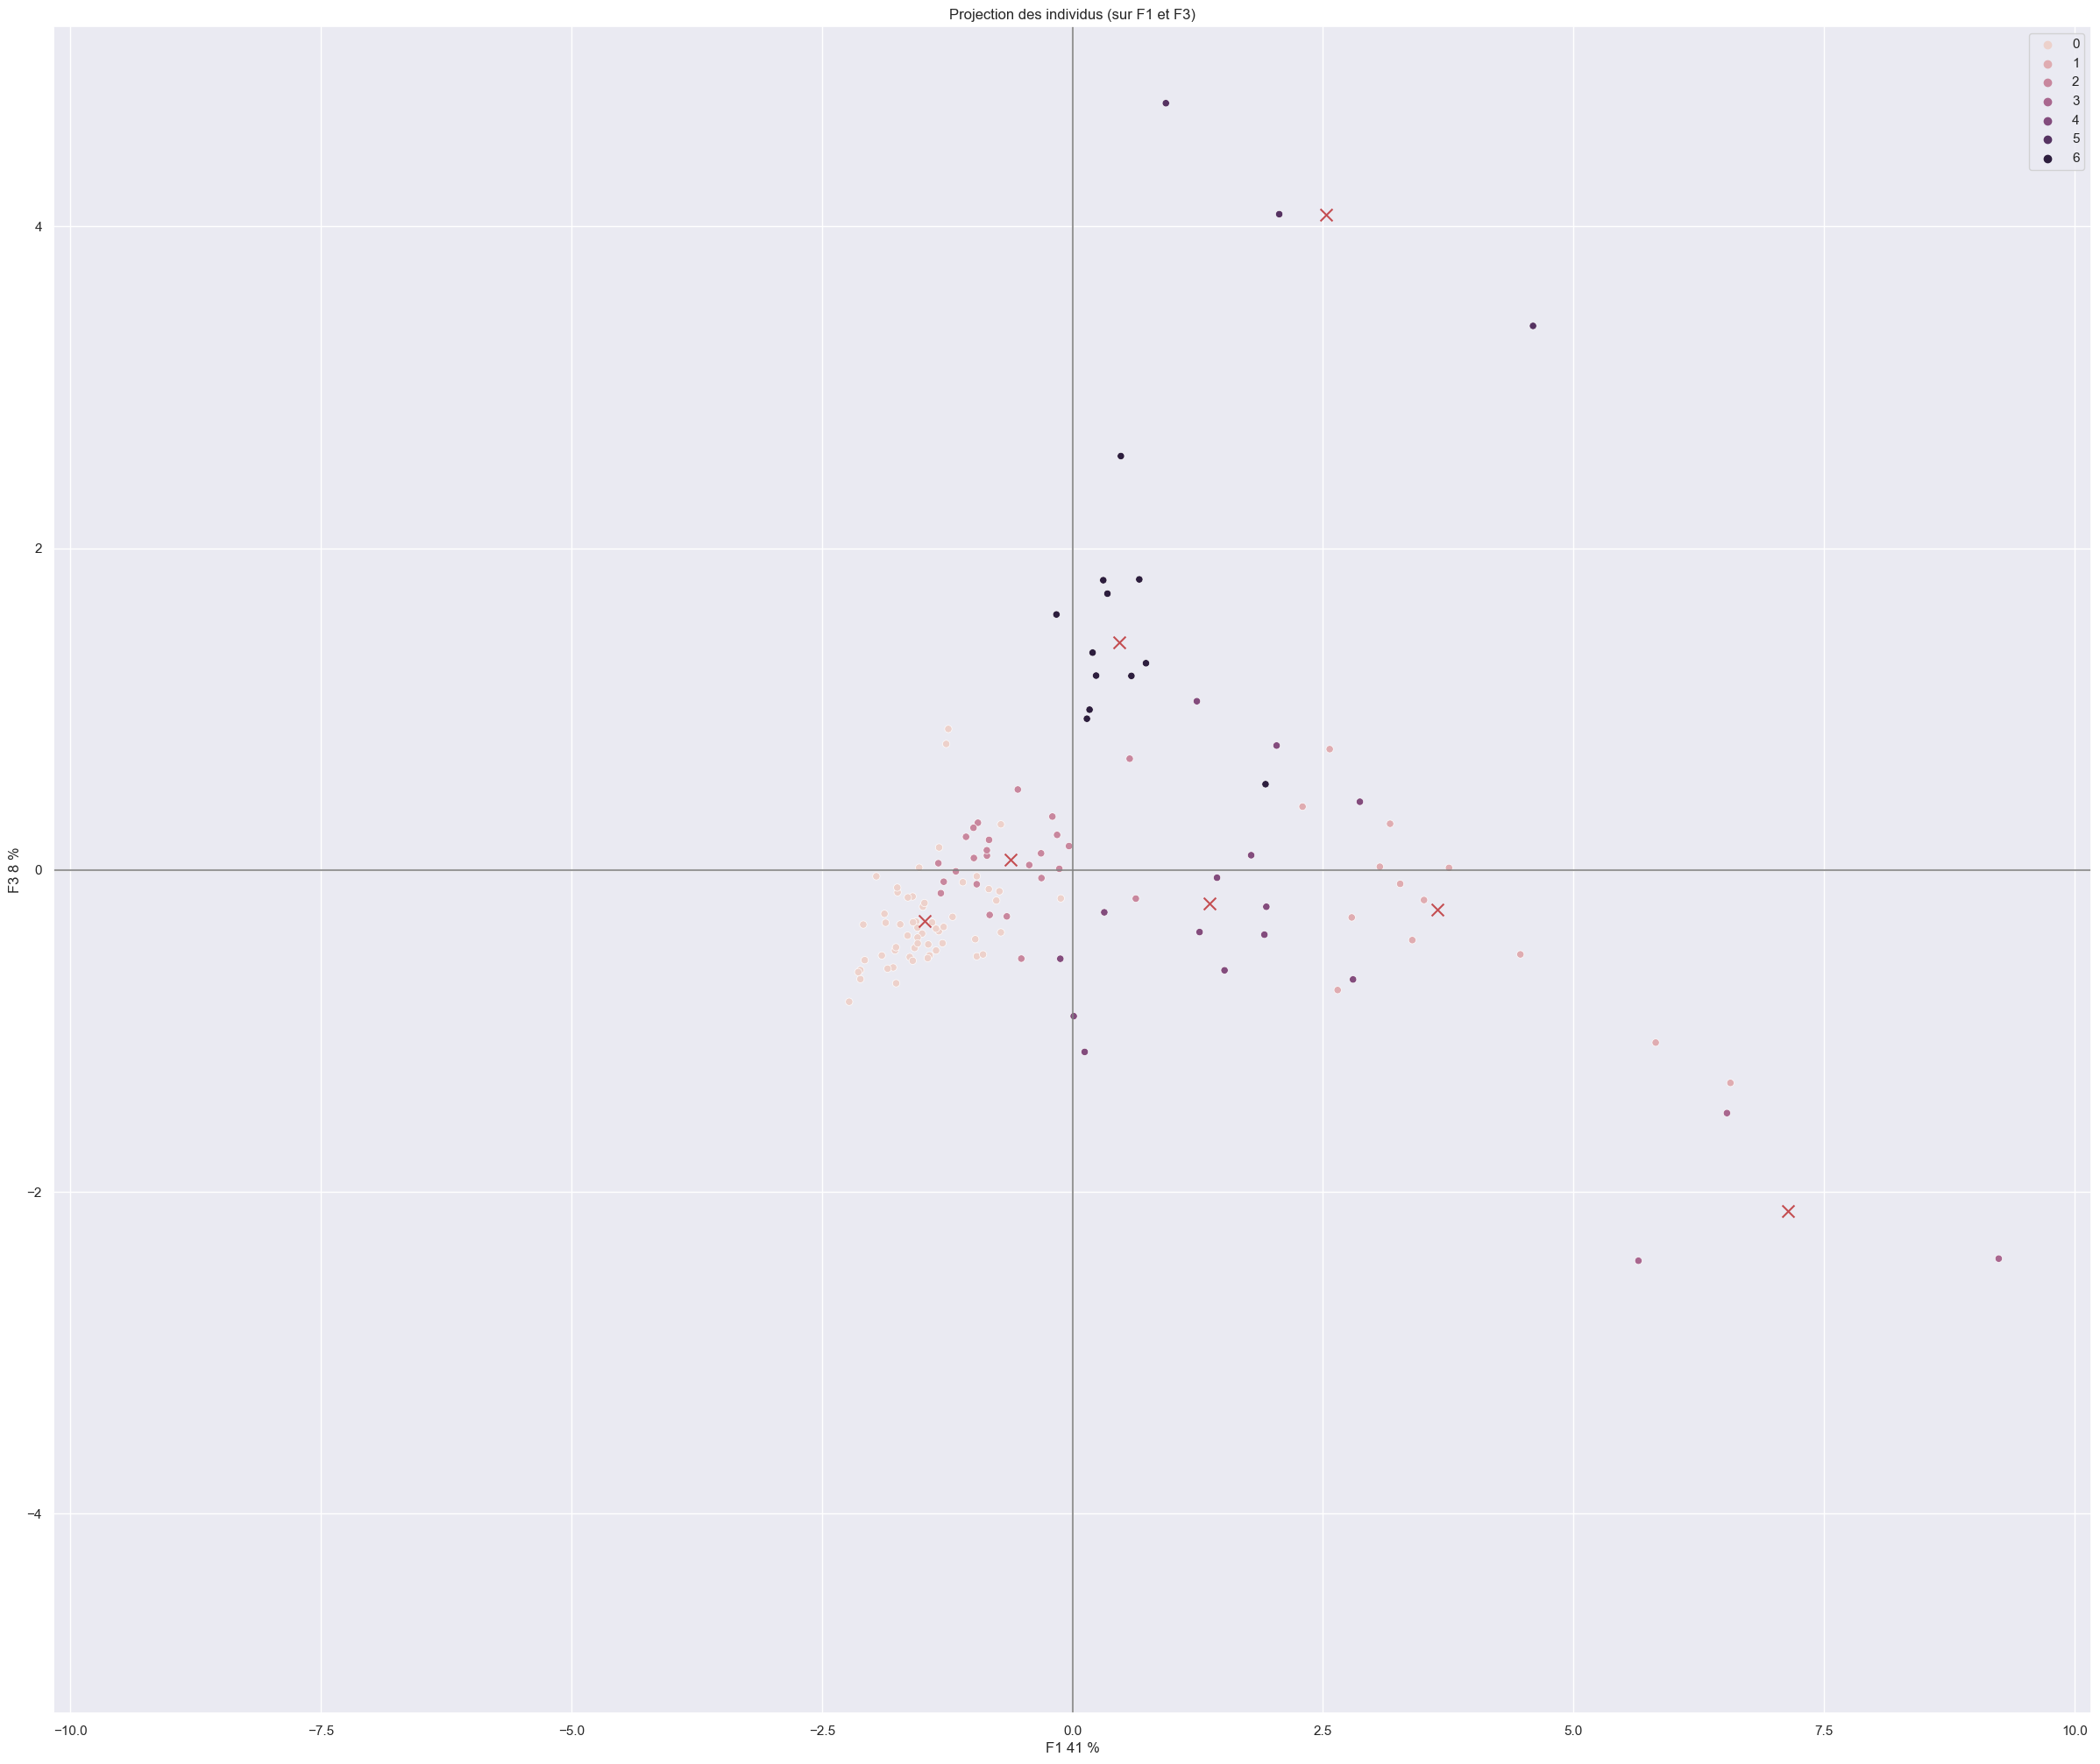

In [926]:
# visualisation

correlation_graph(pca, x_y=(0,1), features=col_gardees)

display_factorial_planes(X_projected, x_y=(0,1), pca=pca, labels=pays, clusters=clusters_kmeans,
                                centroides=centroides, alpha=1, figsize=[30,25], marker="." )

correlation_graph(pca, x_y=(1,2), features=col_gardees)

display_factorial_planes(X_projected, x_y=(1,2), pca=pca, labels=None, clusters=clusters_kmeans,
                                centroides=centroides, alpha=1, figsize=[30,25], marker="." )

correlation_graph(pca, x_y=(0,2), features=col_gardees)

display_factorial_planes(X_projected, x_y=(0,2), pca=pca, labels=None, clusters=clusters_kmeans,
                                centroides=centroides, alpha=1, figsize=[30,25], marker="." )	

In [927]:
representation_3d(X_projected, pays, clusters_kmeans)

In [928]:
representation_3d_centroide(X_projected, clusters_kmeans)

### Distribution des variables par clusters

In [929]:
col_test_clusters = ['pays','production', 'volaille_consommée', 'taux_autosuffisance',
       'proportion_volaille_nourriture', 'proportion_animaux_nourriture',
       'population', 'lpi', 'pib', 'taux_droit_douane',
       'quantite_conteneurs_par_annee', 'cout_production_volaille',
       'taux_population_urbaine', 'stabilite_politique',
       'pib_par_habitant']

df_test_clusters = df[col_test_clusters]

df_test_clusters['clusters'] = clusters_kmeans
df_test_clusters['clusters'] = df_test_clusters['clusters'].astype('str')

df_test_clusters = df_test_clusters.sort_values('clusters')

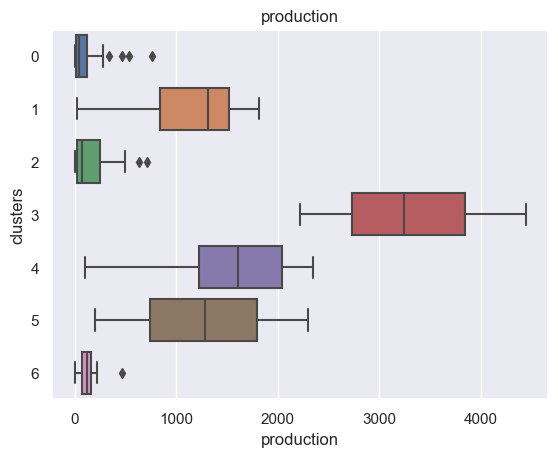

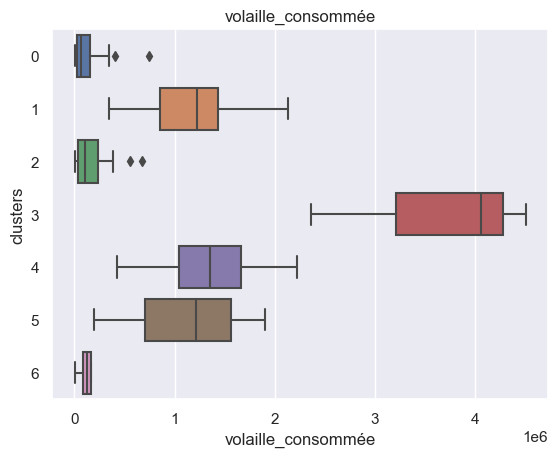

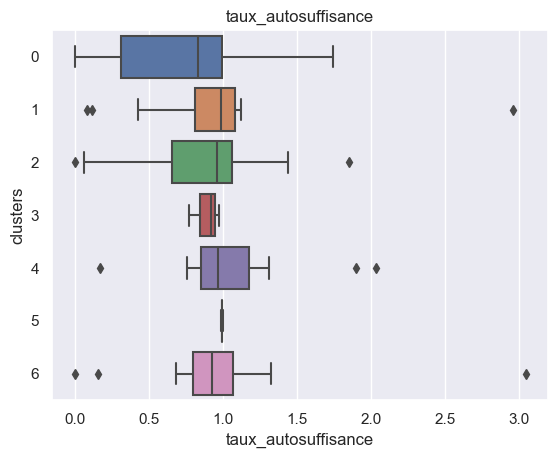

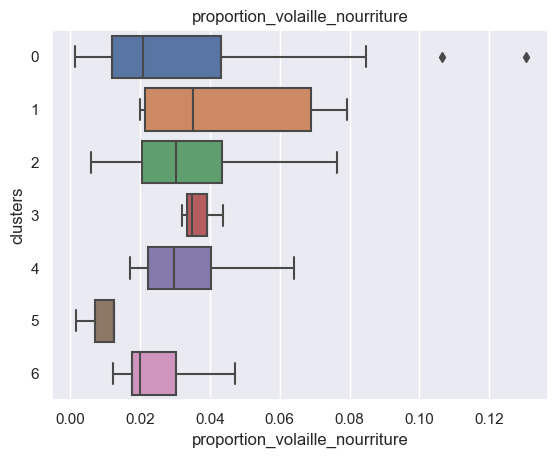

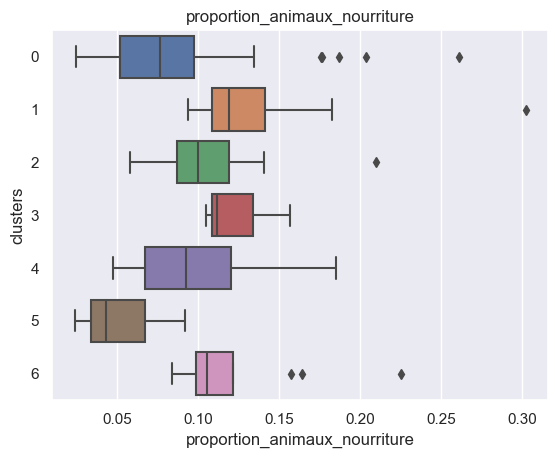

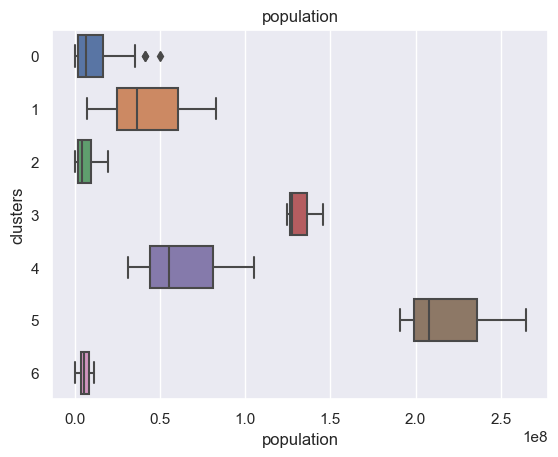

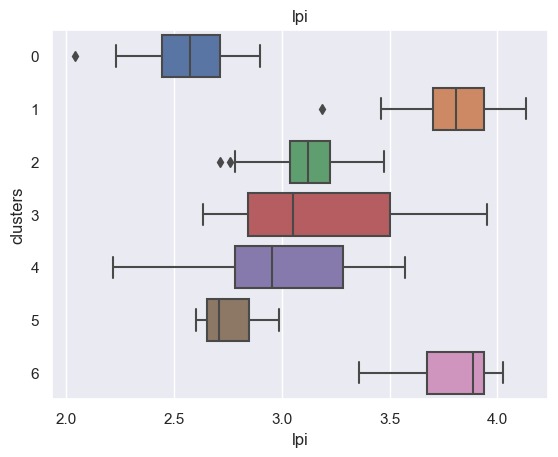

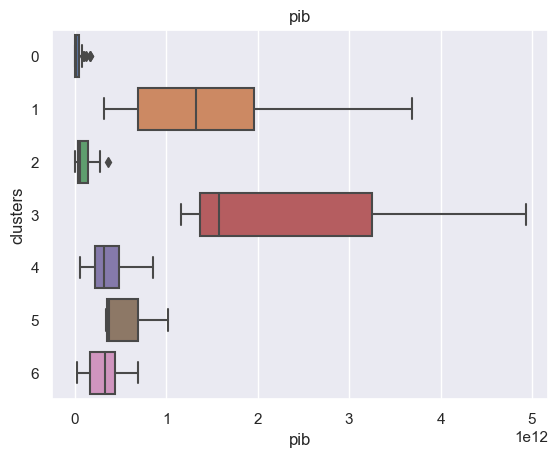

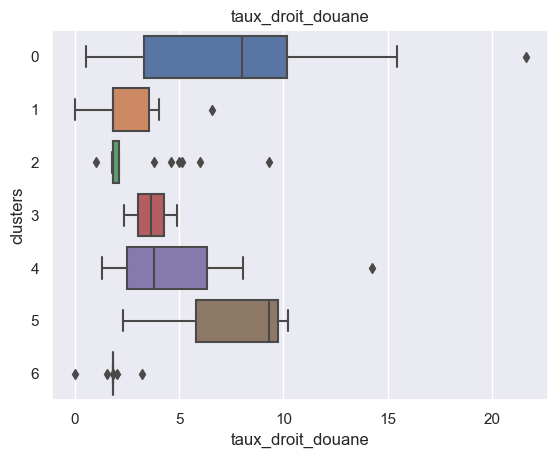

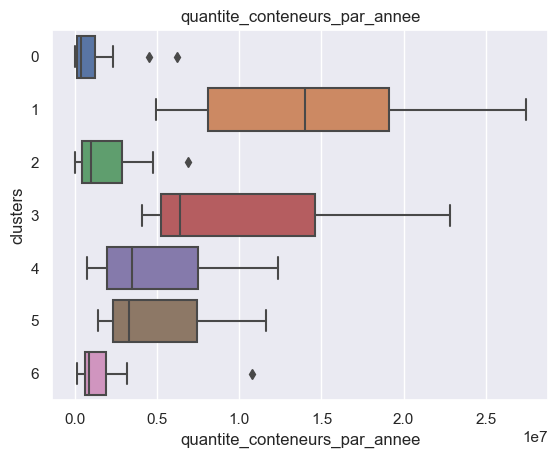

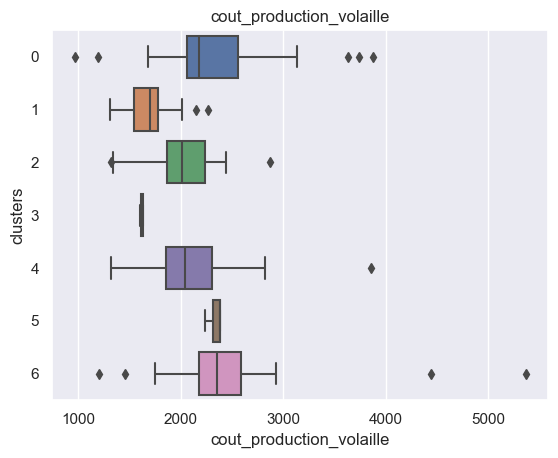

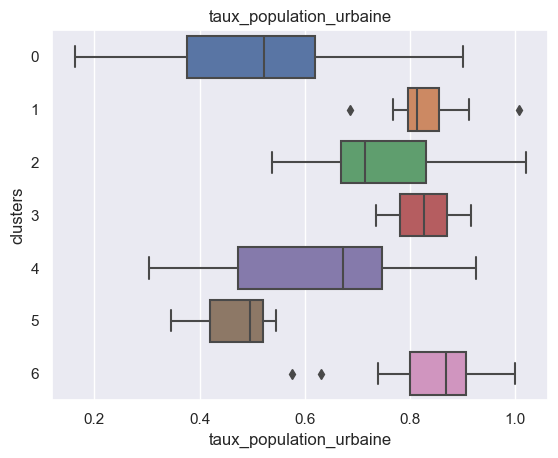

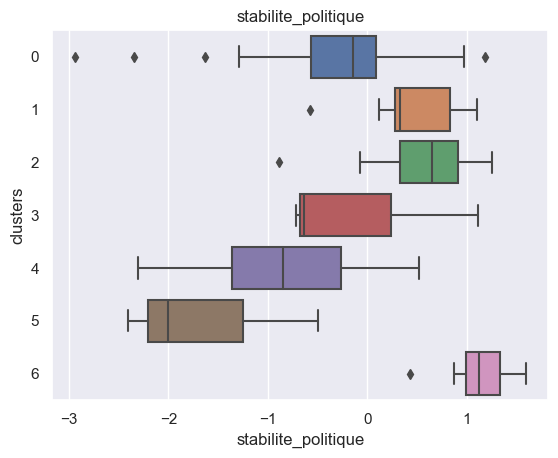

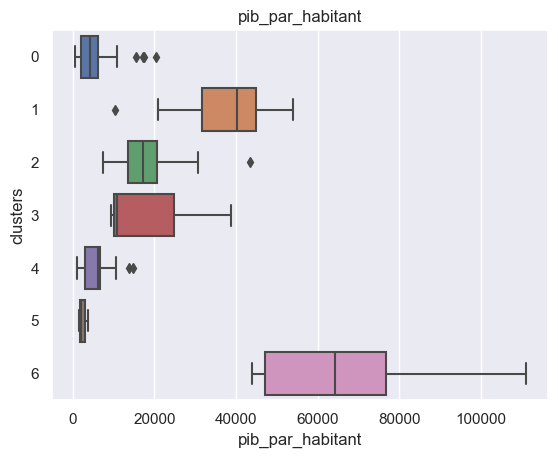

In [930]:
for col in df_test_clusters.drop(columns=['pays', 'clusters']).columns:
    plt.title(col)
    sns.boxplot(data=df_test_clusters, x=col, y='clusters')
    plt.show()

### ANOVA pour vérifier si les clusters différent bien

### Visualisation des clusters sur une carte du monde

In [931]:
df_test_clusters.to_csv(folder+'export_tableau.csv', index=False)

In [932]:
df_test_clusters

pays  production  \
127                                       Îles Salomon        0.00   
38                                            Eswatini        6.00   
39                                               Fidji       23.00   
79                                           Nicaragua      143.00   
103                                             Serbie       85.00   
43                                               Gabon        4.00   
44                                               Ghana       60.00   
102                                              Samoa        0.00   
46                                           Guatemala      235.00   
47                                              Guyana       31.00   
48                                             Géorgie       22.00   
49                                            Honduras      193.00   
101                               Saint-Kitts-et-Nevis        0.00   
99                               République de Moldova       54.00   
97                                              Rwanda       19.00   
58                                            Jamaïque      128.00   
60                                            Jordanie      210.00   
61                                          Kazakhstan      171.00   
62                                               Kenya       35.00   
126                                           Équateur      340.00   
64                                             Lesotho        2.00   
66                                               Liban       64.00   
67                                             Libéria       15.00   
88                                            Paraguay       45.00   
70                                   Macédoine du Nord        2.00   
73                                               Maroc      762.00   
74                                             Maurice       48.00   
85                                             Ouganda       65.00   
76                                          Monténégro        4.00   
78                                             Namibie       11.00   
35                                         El Salvador      136.00   
107                                          Sri Lanka      192.00   
104                                       Sierra Leone       17.00   
109                                           Suriname       10.00   
1                                              Albanie       13.00   
2                                              Algérie      275.00   
4                                               Angola       42.00   
5                                   Antigua-et-Barbuda        0.00   
8                                              Arménie       11.00   
123                                             Zambie       49.00   
11                                         Azerbaïdjan      104.00   
12                                             Barbade       15.00   
122                                              Yémen      168.00   
14                                              Belize       20.00   
15                     Bolivie (État plurinational de)      533.00   
32                                       Côte d'Ivoire       58.00   
16                                  Bosnie-Herzégovine       61.00   
117                                            Tunisie      213.00   
19                                             Bélarus      463.00   
80                                               Niger       19.00   
21                                            Cameroun       81.00   
29                                               Congo        7.00   
116                                  Trinité-et-Tobago       61.00   
20                                               Bénin       18.00   
28                                               Congo        7.00   
111                                            Sénégal       77.00   
115                                               Togo      